In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) #50 for truncated view, -1 for full view

# Load Data

In [10]:
df = pd.read_pickle('dataset/clean_dataset.pkl')

attacks_list_df = pd.read_csv('attacks_df.csv')

In [11]:
attacks_list_df

num_attack           start_time             end_time  \
0            1  2015-12-28 10:29:14  2015-12-28 10:44:53   
1            2  2015-12-28 10:51:08  2015-12-28 10:58:30   
2            3  2015-12-28 11:22:00  2015-12-28 11:28:22   
3            4  2015-12-28 11:47:39  2015-12-28 11:54:08   
4            6  2015-12-28 12:00:55  2015-12-28 12:04:10   
5            7  2015-12-28 12:08:25  2015-12-28 12:15:33   
6            8  2015-12-28 13:10:10  2015-12-28 13:26:13   
7           10  2015-12-28 14:16:20  2015-12-28 14:19:00   
8           11  2015-12-28 14:19:00  2015-12-28 14:28:20   
9           13  2015-12-29 11:11:25  2015-12-29 11:15:17   
10          14  2015-12-29 11:35:40  2015-12-29 11:42:50   
11          16  2015-12-29 11:57:25  2015-12-29 12:02:00   
12          17  2015-12-29 14:38:12  2015-12-29 14:50:08   
13          19  2015-12-29 18:10:43  2015-12-29 18:15:01   
14          20  2015-12-29 18:15:43  2015-12-29 18:22:17   
15          21  2015-12-29 18:30:00  2015-12-29 18:42:00   
16          22  2015-12-29 22:55:18  2015-12-29 23:03:00   
17          23  2015-12-30 01:42:34  2015-12-30 01:54:10   
18          24  2015-12-30 09:51:08  2015-12-30 09:56:28   
19          25  2015-12-30 10:01:50  2015-12-30 10:12:01   
20          26  2015-12-30 17:04:56  2015-12-30 17:29:00   
21          27  2015-12-31 01:17:08  2015-12-31 01:45:18   
22          28  2015-12-31 01:45:19  2015-12-31 11:15:27   
23          29  2015-12-31 15:32:00  2015-12-31 15:34:00   
24          30  2015-12-31 15:47:40  2015-12-31 16:07:10   
25          31  2015-12-31 22:05:34  2015-12-31 22:11:40   
26          32  2016-01-01 10:36:00  2016-01-01 10:46:00   
27          33  2016-01-01 14:21:12  2016-01-01 14:28:35   
28          34  2016-01-01 17:12:40  2016-01-01 17:14:20   
29          35  2016-01-01 17:18:56  2016-01-01 17:26:56   
30          36  2016-01-01 22:16:01  2016-01-01 22:25:00   
31          37  2016-01-02 11:17:02  2016-01-02 11:24:50   
32          38  2016-01-02 11:31:38  2016-01-02 11:36:18   
33          39  2016-01-02 11:43:48  2016-01-02 11:50:28   
34          40  2016-01-02 11:51:42  2016-01-02 11:56:38   
35          41  2016-01-02 13:13:02  2016-01-02 13:40:56   

                          attack_type                            attack_point  \
0   Single Stage Single Point Attacks                         MV-101, LIT-101   
1   Single Stage Single Point Attacks                            P-102, P-101   
2   Single Stage Single Point Attacks                          LIT-101, P-101   
3   Single Stage Single Point Attacks                                  MV-504   
4   Single Stage Single Point Attacks                 AIT-202, P-203, AIT-504   
5   Single Stage Single Point Attacks                          LIT-301, P-301   
6   Single Stage Single Point Attacks              DPIT-301, LIT-301, LIT-401   
7   Single Stage Single Point Attacks                                 FIT-401   
8   Single Stage Single Point Attacks                          FIT-401, P-501   
9   Single Stage Single Point Attacks                                  MV-304   
10  Single Stage Single Point Attacks                         MV-303, LIT-301   
11  Single Stage Single Point Attacks                        LIT-301, FIT-301   
12  Single Stage Single Point Attacks                MV-303, LIT-301, FIT-301   
13  Single Stage Single Point Attacks                                 AIT-504   
14  Single Stage Single Point Attacks                                 AIT-504   
15   Single Stage Multi Point Attacks                         MV-101, LIT-101   
16    Multi Stage Multi Point Attacks         UV-401, AIT-502, P-501, FIT-502   
17    Multi Stage Multi Point Attacks                 P-602, DPIT-301, MV-302   
18   Single Stage Multi Point Attacks            P-203, P-205, P-101, LIT-101   
19   Single Stage Multi Point Attacks                          LIT-401, P-402   
20   Multi Stage Single Point Attacks          P-101, LIT-101, P-102, LIT-301   
2

In [3]:
cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('Normal/Attack')
cols_numeric.remove('index')

## Set Normalization

mean normalization

In [4]:
data = df[cols_numeric]
mean_normalized_df = (data-data.mean())/data.std()

min-max normalization

In [5]:
data = df[cols_numeric]
min_max_normalized_df = (data-data.min())/(data.max()-data.min())

# Data Analysis

In [6]:
start_time = attacks_list_df.iloc[0]['start_time']
end_time = attacks_list_df.iloc[0]['end_time']

start_time = pd.to_datetime(start_time)
end_time = pd.to_datetime(end_time)

start_time = start_time - pd.Timedelta(minutes=10)
end_time = end_time + pd.Timedelta(minutes=10)
s = df['Timestamp'].between(start_time, end_time)
df.loc[s]

Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
497954 2015-12-28 10:19:14  2.553566  731.2396      2     1     1  262.5288   
497955 2015-12-28 10:19:15  2.556129  731.3967      2     1     1  262.5288   
497956 2015-12-28 10:19:16  2.556129  731.9462      2     1     1  262.5288   
497957 2015-12-28 10:19:17  2.556129  732.5350      2     1     1  262.5288   
497958 2015-12-28 10:19:18  2.556129  732.8098      2     1     1  262.5288   
...                    ...       ...       ...    ...   ...   ...       ...   
500089 2015-12-28 10:54:49  0.000000  567.6342      1     2     2  262.3045   
500090 2015-12-28 10:54:50  0.000000  567.4771      1     2     2  262.3045   
500091 2015-12-28 10:54:51  0.000000  567.0846      1     2     2  262.3045   
500092 2015-12-28 10:54:52  0.000000  567.0061      1     2     2  262.3045   
500093 2015-12-28 10:54:53  0.000000  566.3781      1     2     2  262.3045   

          AIT202   AIT203    FIT201  MV201  P201  P202  P203  P204  P205  \
497954  8.467573  316.970  0.000000      1     1     1     1     1     1   
497955  8.467573  316.970  0.000000      1     1     1     1     1     1   
497956  8.467573  316.970  0.000000      1     1     1     1     1     1   
497957  8.467573  316.970  0.000000      1     1     1     1     1     1   
497958  8.467573  316.970  0.000000      1     1     1     1     1     1   
...          ...      ...       ...    ...   ...   ...   ...   ...   ...   
500089  8.389067  328.685  2.797552      2     1     1     2     1     2   
500090  8.389067  328.685  2.797552      2     1     1     2     1     2   
500091  8.389067  328.685  2.798193      2     1     1     2     1     2   
500092  8.387144  328.685  2.798193      2     1     1     2     1     2   
500093  8.385862  328.685  2.795630      2     1     1     2     1     2   

        P206    DPIT301    FIT301     LIT301  MV301  MV302  MV303  MV304  \
497954     1   2.010372  0.000256  1011.1590      1      1      1      1   
497955     1   2.010372  0.000256  1011.2790      1      1      1      1   
497956     1   2.010372  0.000256  1011.3590      1      1      1      1   
497957     1   2.010372  0.000256  1010.9590      1      1      1      1   
497958     1   2.010372  0.000256  1011.4790      1      1      1      1   
...      ...        ...       ...        ...    ...    ...    ...    ...   
500089     1  13.666050  2.343144   922.0793      1      2      1      0   
500090     1  13.771690  2.344810   922.1995      1      2      1      0   
500091     1  14.050200  2.345322   922.1193      1      2      1      0   
500092     1  14.495170  2.345322   922.3196      1      2      1      0   
500093     1  15.045780  2.345322   922.6000      1      2      1      1   

        P301  P302   AIT401    AIT402    FIT401    LIT401  P401  P402  P403  \
497954     1     1  148.808  154.3963  1.717746  857.5493     1     2     1   
497955     1     1  148.808  154.3963  1.718515  857.5493     1     2     1   
497956     1     1  148.808  154.3963  1.718515  857.2033     1     2     1   
497957     1     1  148.808  154.3963  1.719027  856.7803     1     2     1   
497958     1     1  148.808  154.3963  1.719027  856.0882     1     2     1   
...      ...   ...      ...       ...       ...       ...   ...   ...   ...   
500089     1     2  148.808  154.9603  1.716464  871.7380     1     2     1   
500090     1     2  148.808  154.9603  1.713389  871.3535     1     2     1   
500091     1     2  148.808  154.9603  1.712748  871.0844     1     2     1   
500092     1     2  148.808  154.9603  1.712748  870.7767     1     2     1   
500093     1     2  148.808  154.9603  1.712748  870.6998     1     2     1   

        P404  UV401    AIT501    AIT502    AIT503    AIT504    FIT501  \
497954     1      2  7.877980  143.6042  263.0095  12.07383  1.726609   
497955     1      2  7.877980  143.6042  263.0095  12.07383  1.726609   
497956     1      2  7.877980  143.6042  263.0095  12.07383  1.726609   
4

## Plot for each sensor/actuator on 11days

In [ ]:

for feature in cols_numeric:
    min_ = df[feature].min()
    max_ = df[feature].max()
    sns.jointplot(data=df,x='index', y=feature, hue='Normal/Attack', xlim=(0, len(df)), ylim=(min_, max_), alpha=0.5, marker="o", s=10, height=10)
    plt.show()
    #plt.savefig(f'plot/{feature}_plot.png')

## Plot for each Attack

['MV-101', 'LIT-101']
1 2
Start State: MV-101 is closed 
Attack: Open MV-101 
Expected Impact: Tank overflow


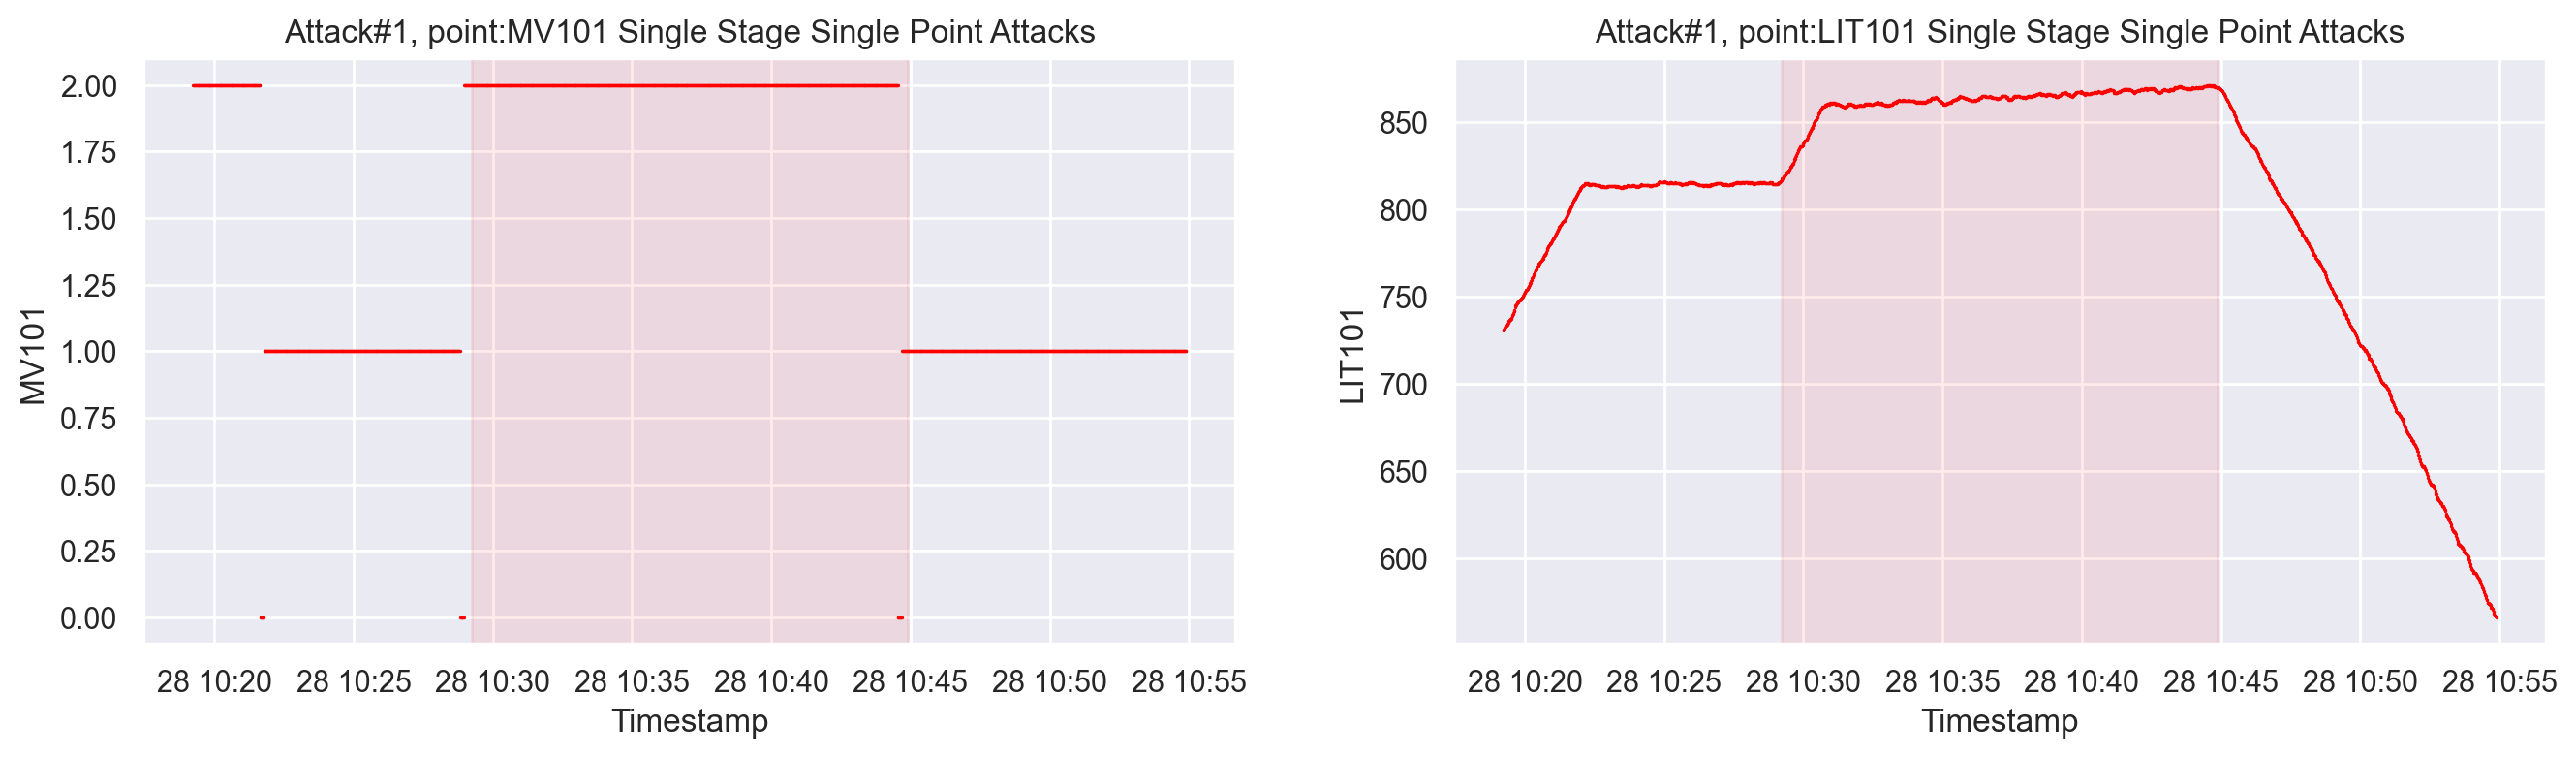

['P-102', 'P-101']
1 2
Start State: P-101 is on where as P-102 is off 
Attack: Turn on P-102 
Expected Impact: Pipe bursts


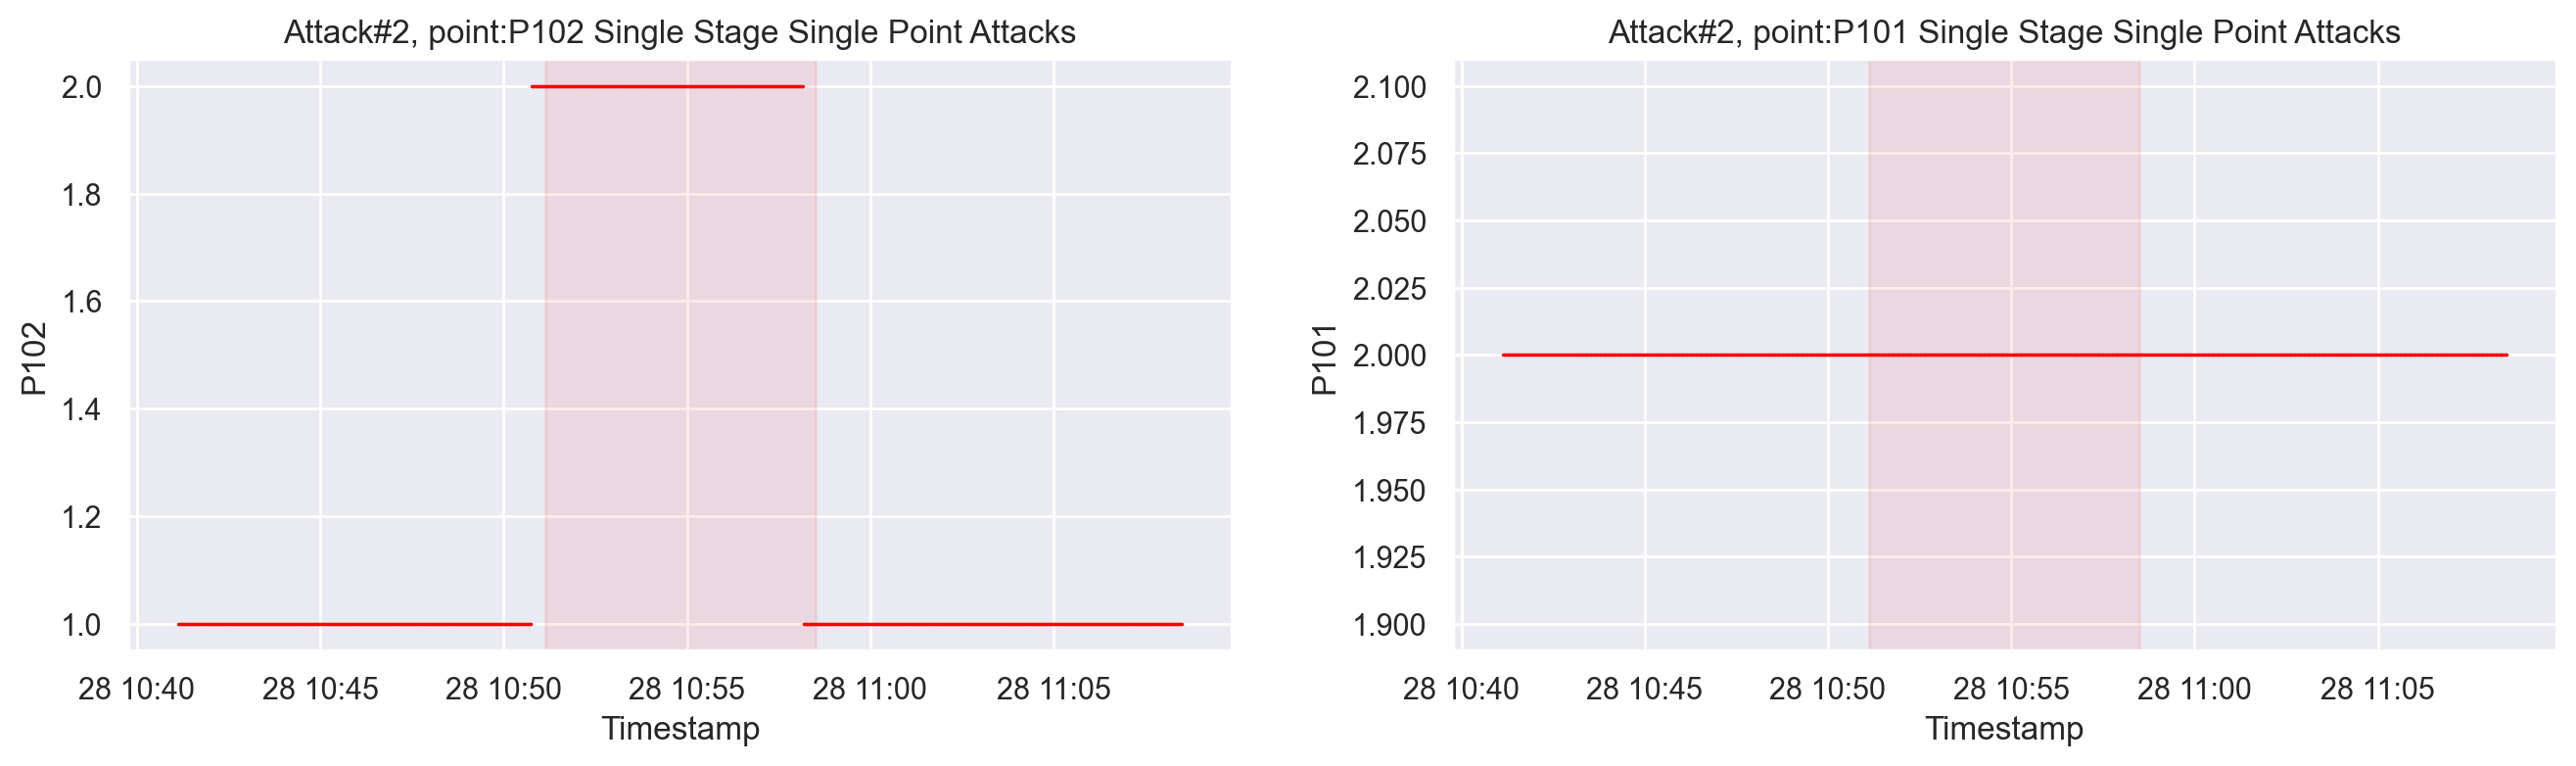

['LIT-101', 'P-101']
1 2
Start State: Water level between L and H 
Attack: Increase by 1 mm every second 
Expected Impact: Tank Underflow; Damage P-101


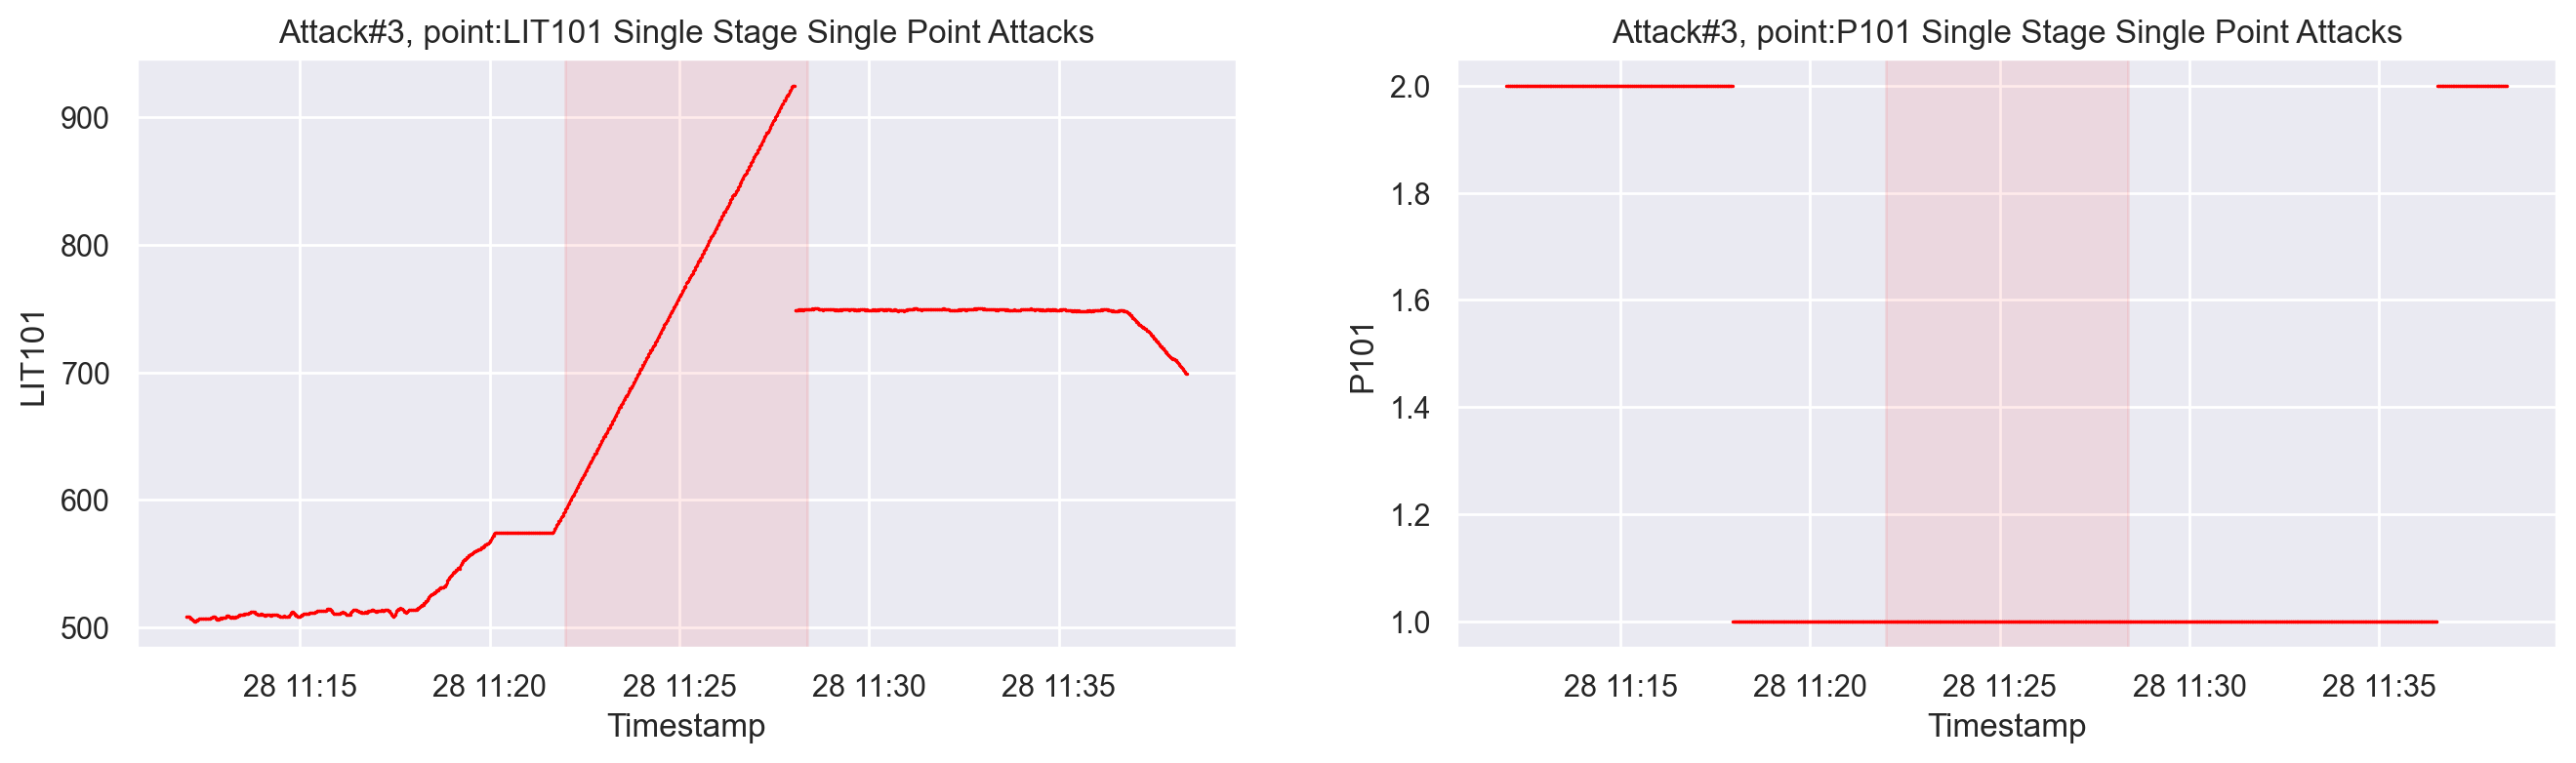

['MV-504']
1 1
Start State: MV-504 is closed 
Attack: Open MV-504 
Expected Impact: Halt RO shut down sequence; Reduce life of RO
Unexpected Outcome: No impact
MV504 not found in dataset


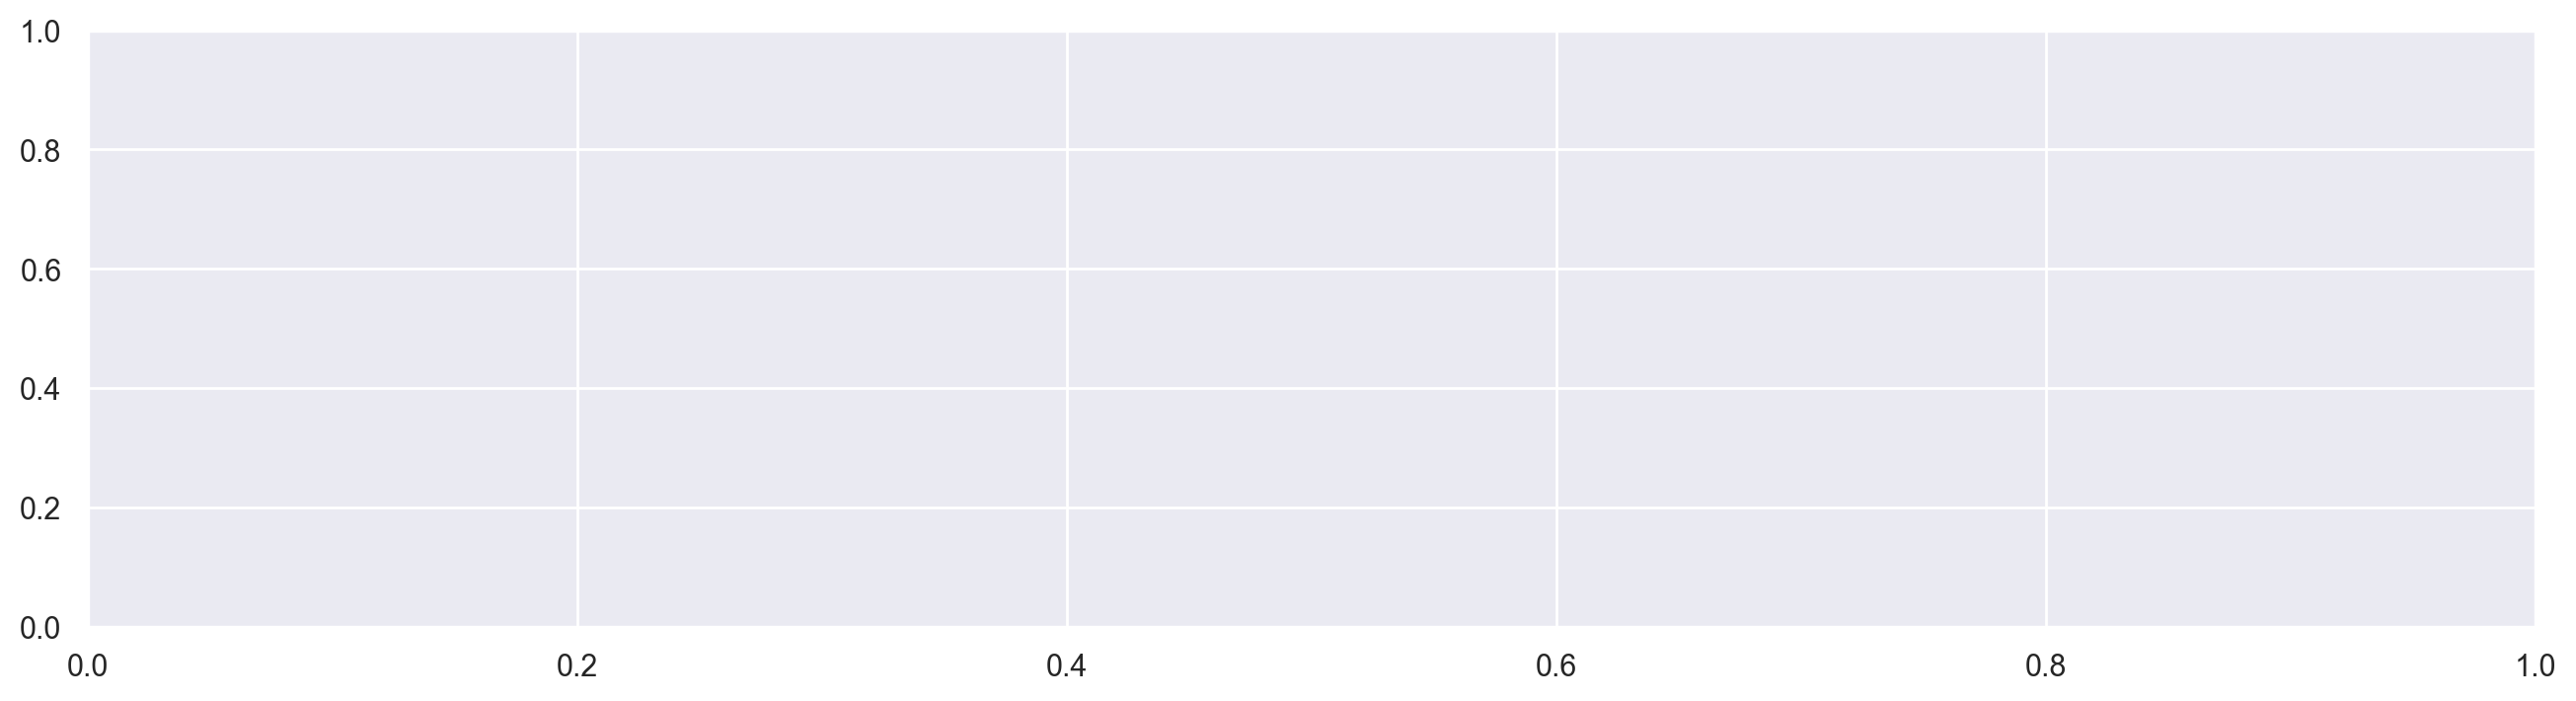

['AIT-202', 'P-203', 'AIT-504']
2 2
Start State: Value of AIT-202 is >7.05 
Attack: Set value of AIT-202  as 6 
Expected Impact: P-203 turns off; Change in water quality
Unexpected Outcome: Impact seen on AIT-504 after two hours at around 14:15. It increased above HH but Drainage did not start


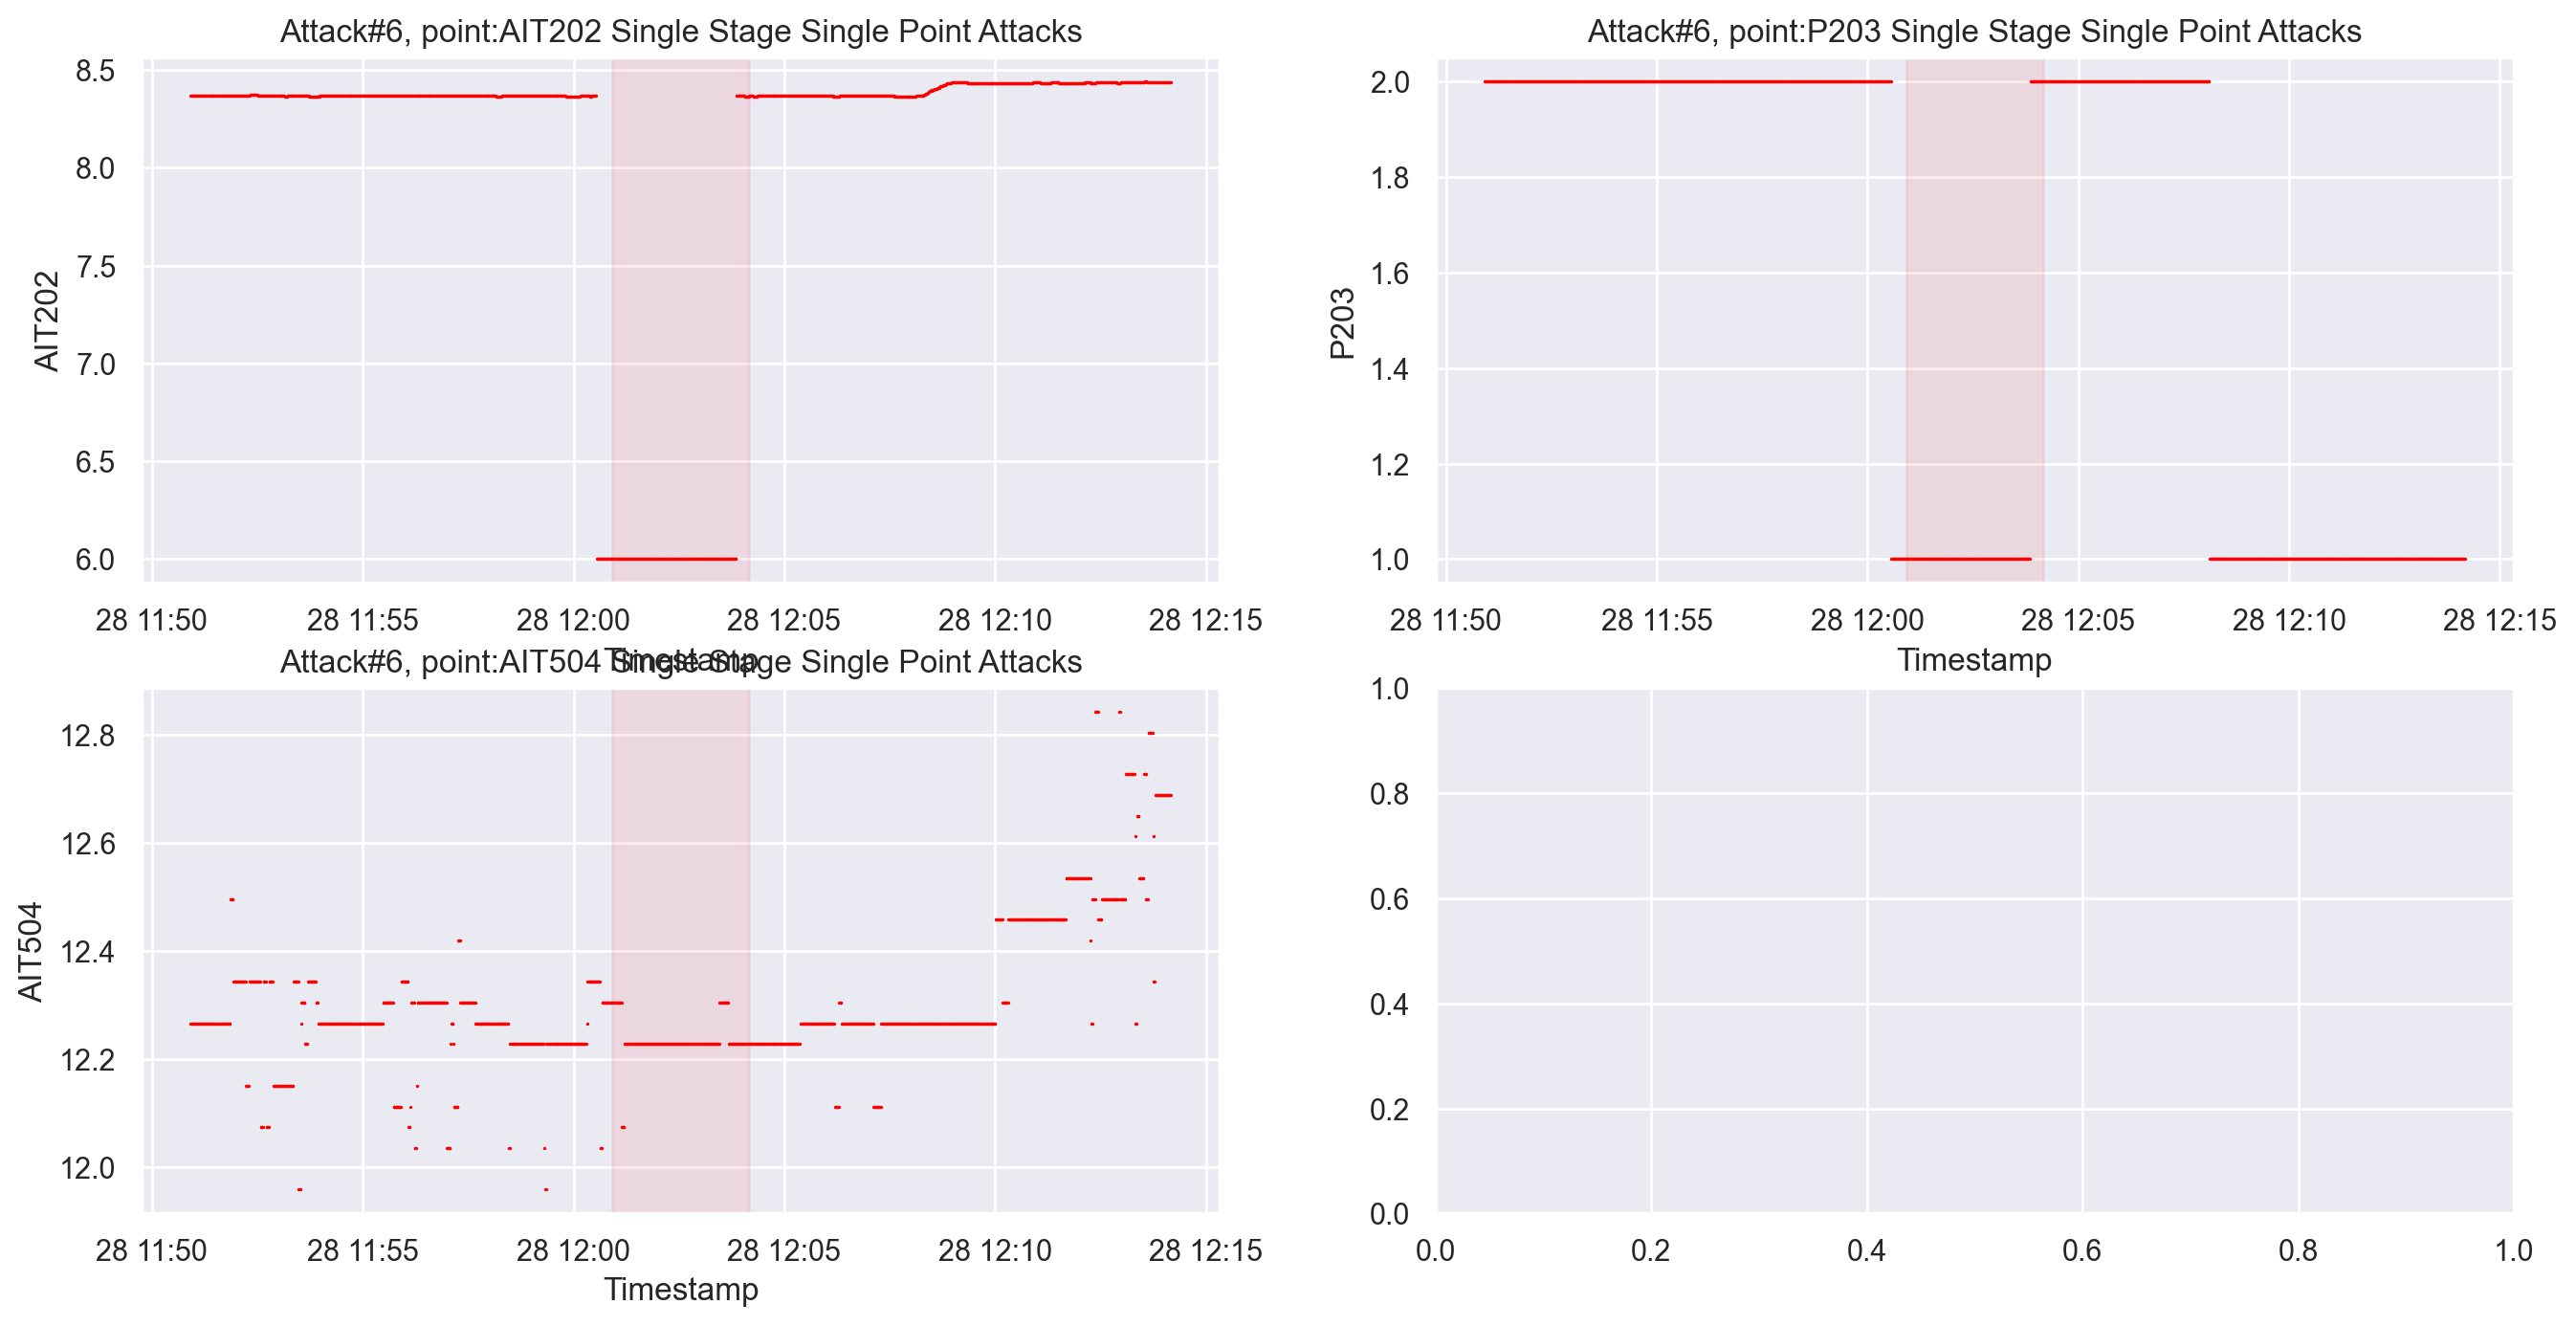

['LIT-301', 'P-301']
1 2
Start State: Water level between L and H 
Attack: Water level increased above HH 
Expected Impact: Stop of inflow; Tank underflow; Damage P-301


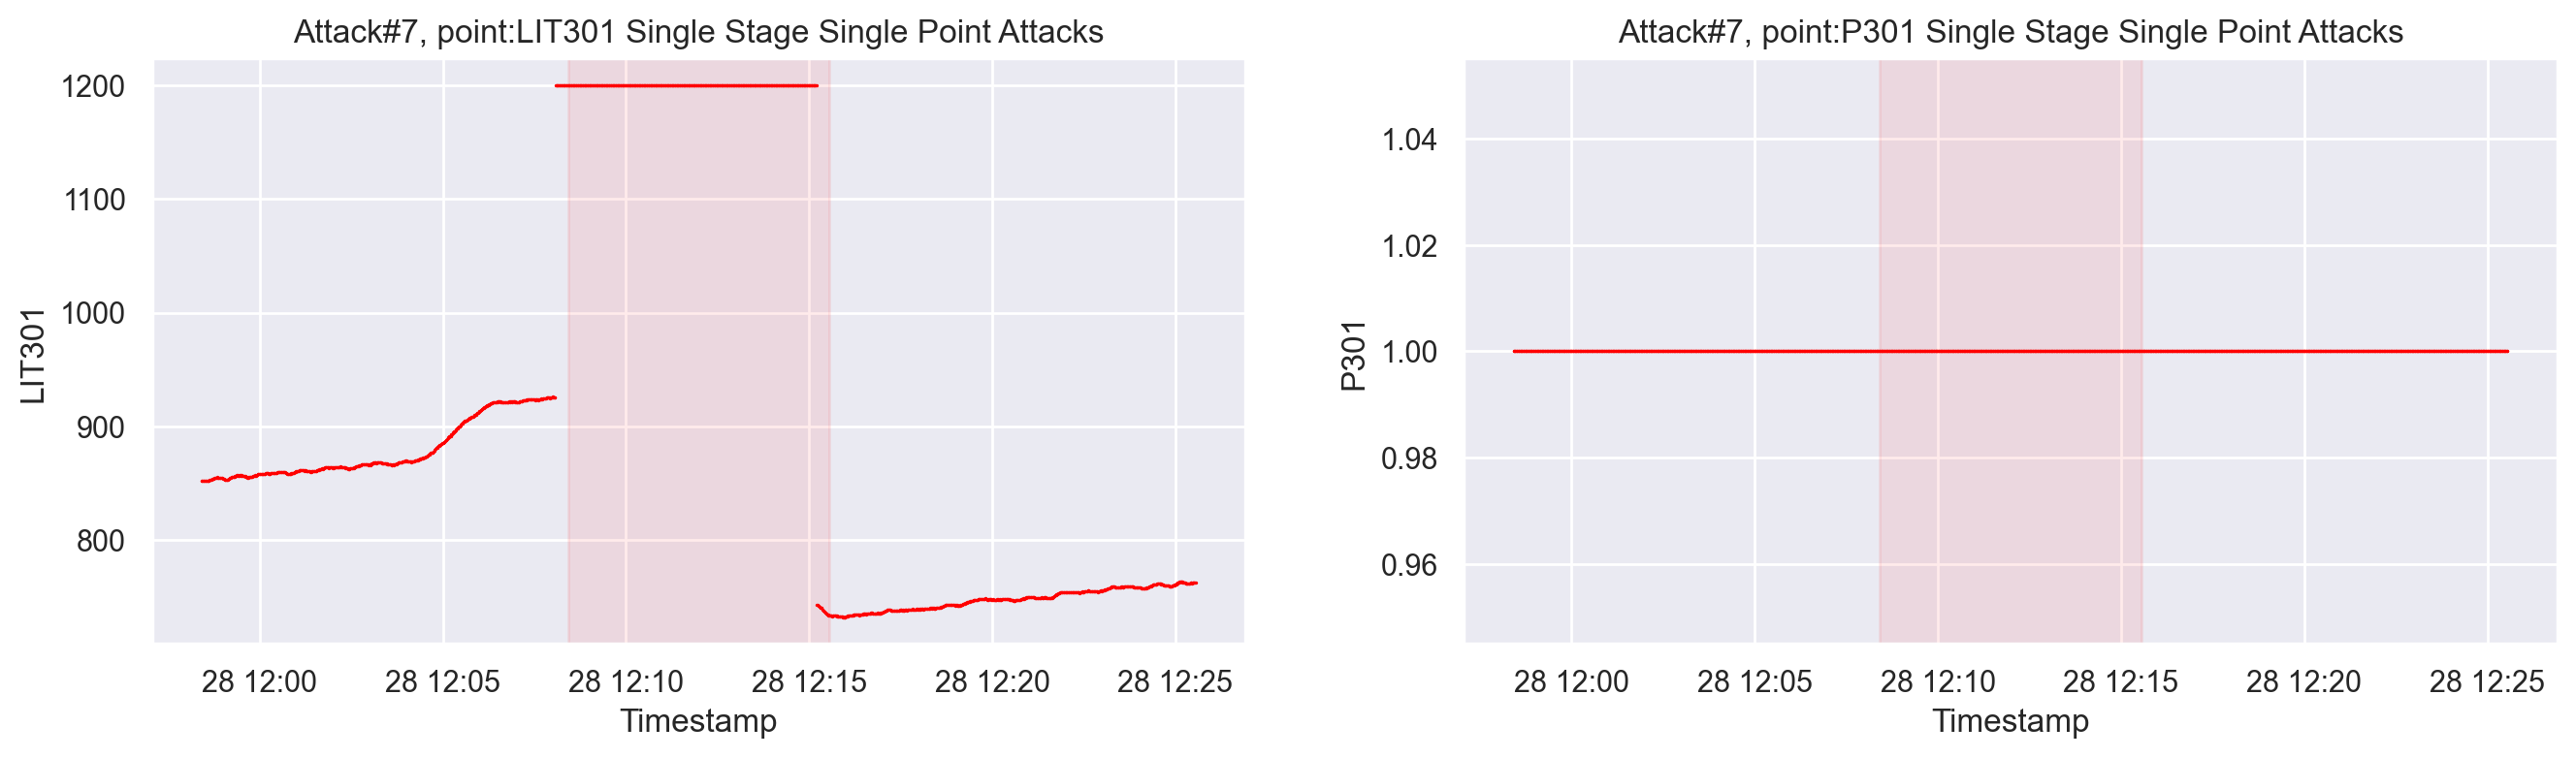

['DPIT-301', 'LIT-301', 'LIT-401']
2 2
Start State: Value of DPIT is <40kpa 
Attack: Set value of DPIT as >40kpa 
Expected Impact: Backwash process is started again and again; Normal operation stops; Decrease in water level of tank 401. Increase in water level of tank 301


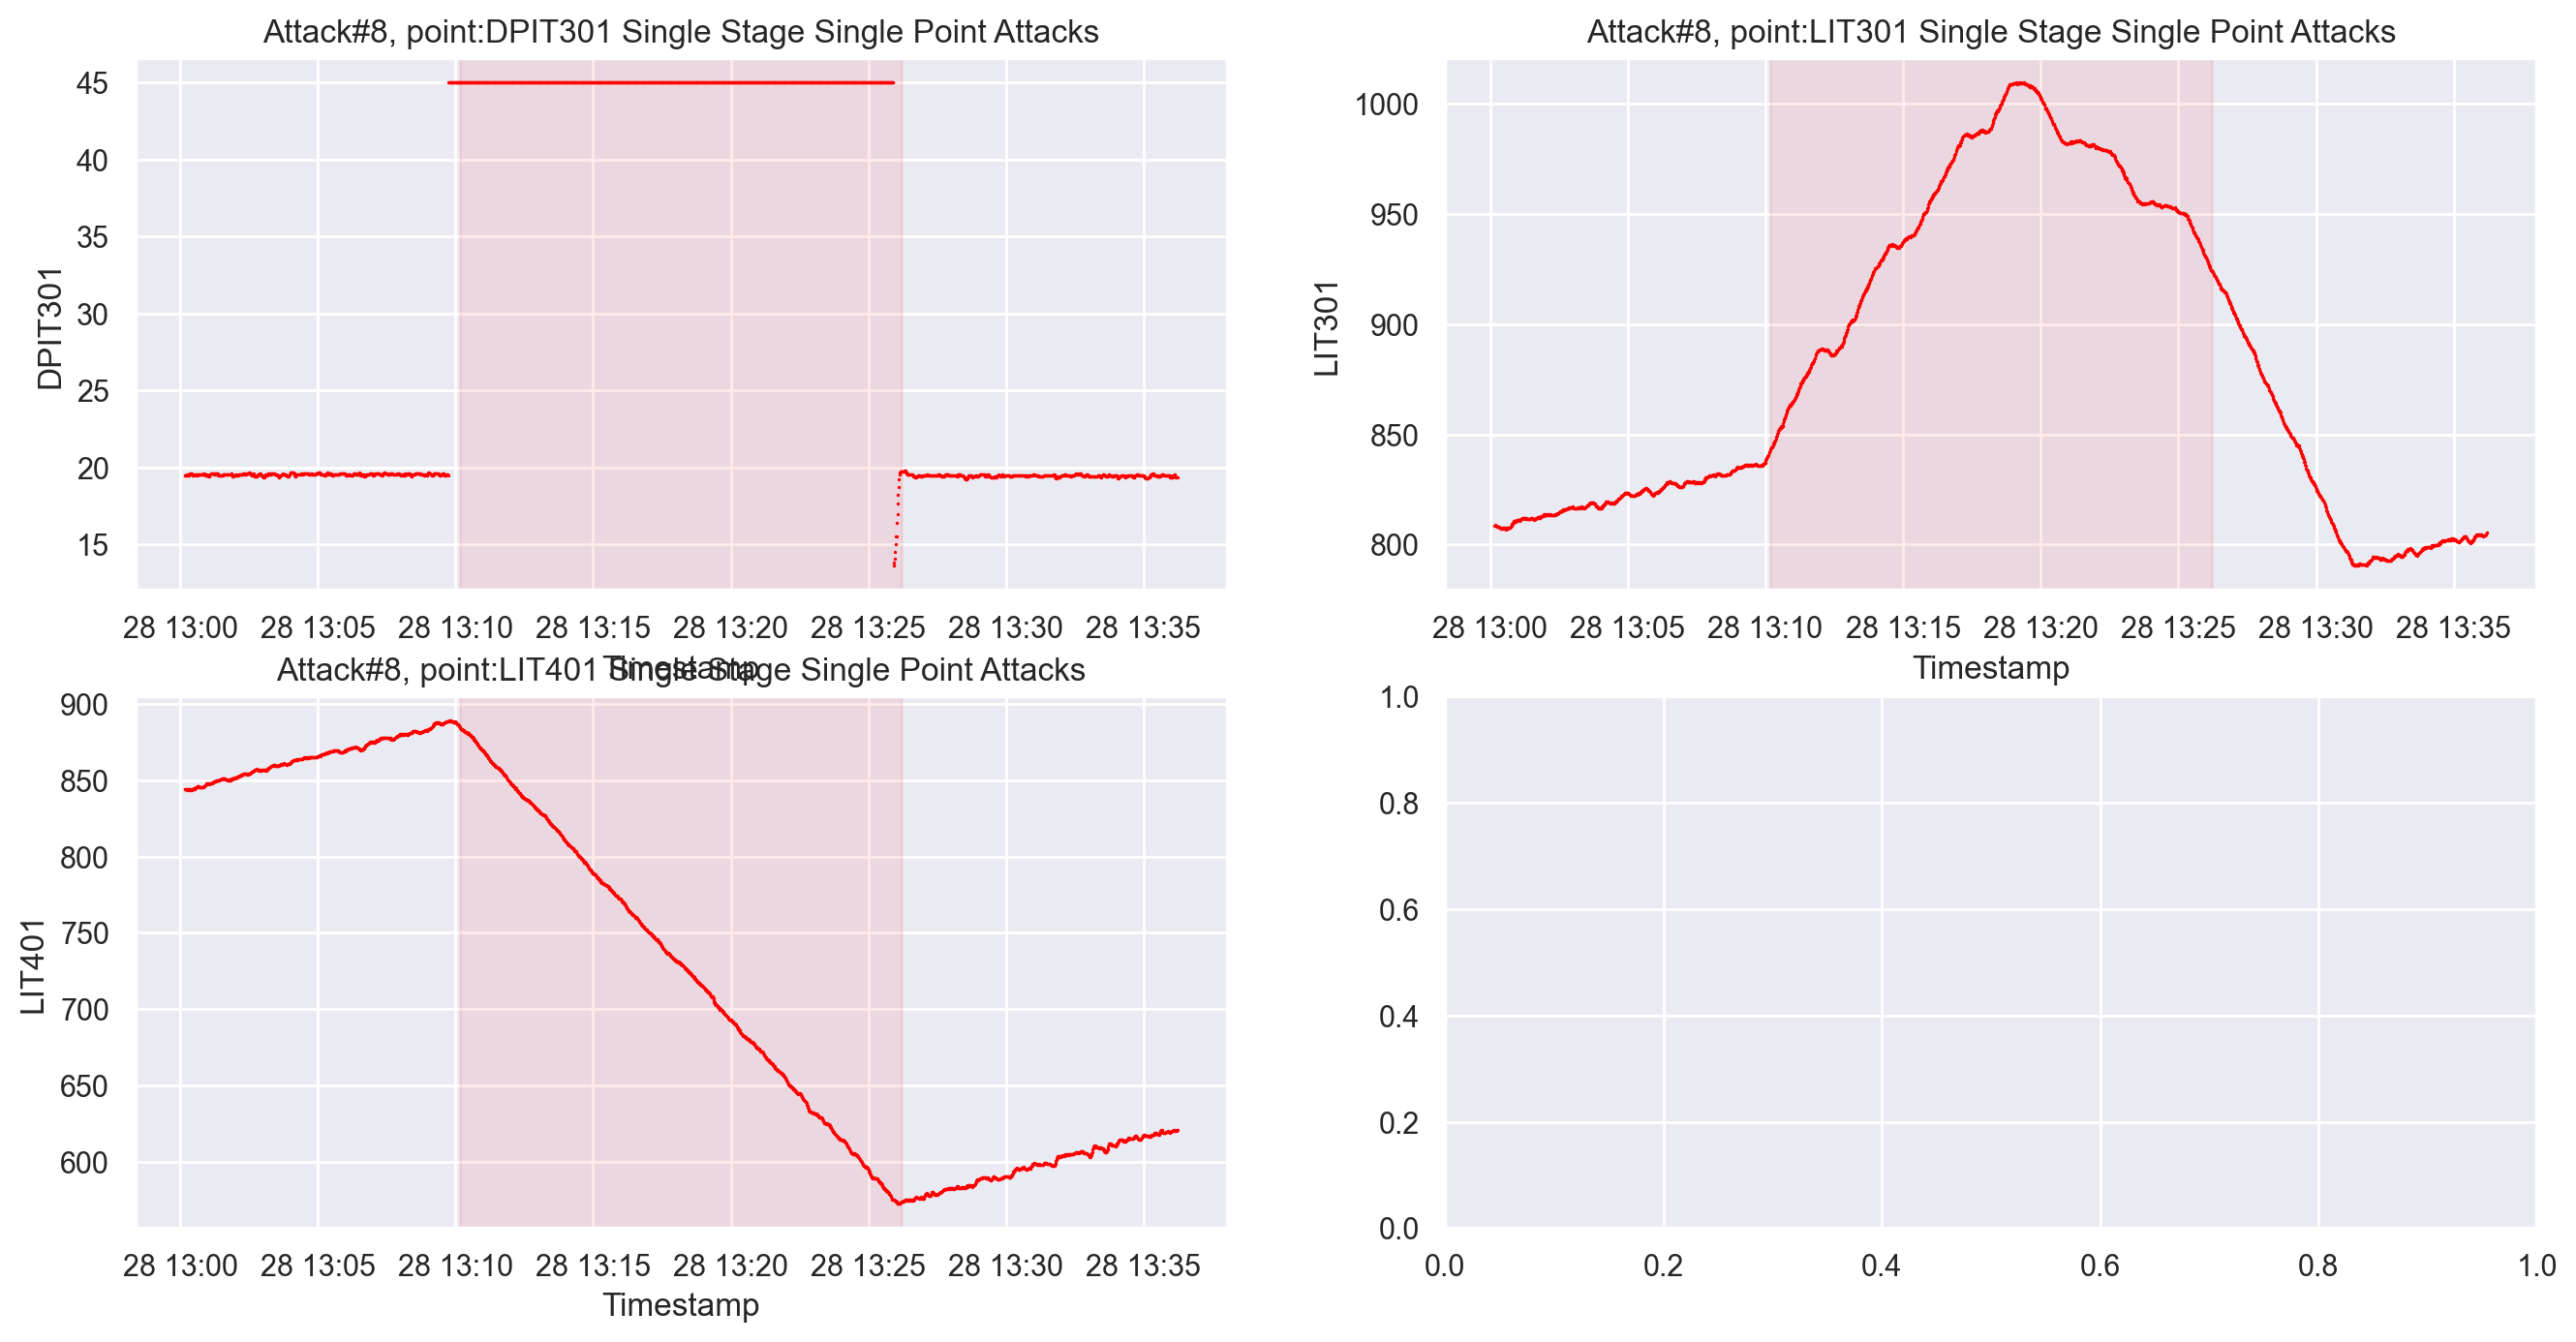

['FIT-401']
1 1
Start State: Value of FIT-401 above 1 
Attack: Set value of FIT-401 as <0.7 
Expected Impact: UV shutdown; P-501 turns off; 
Unexpected Outcome: UV did not shutdown; P-501 did not turn off


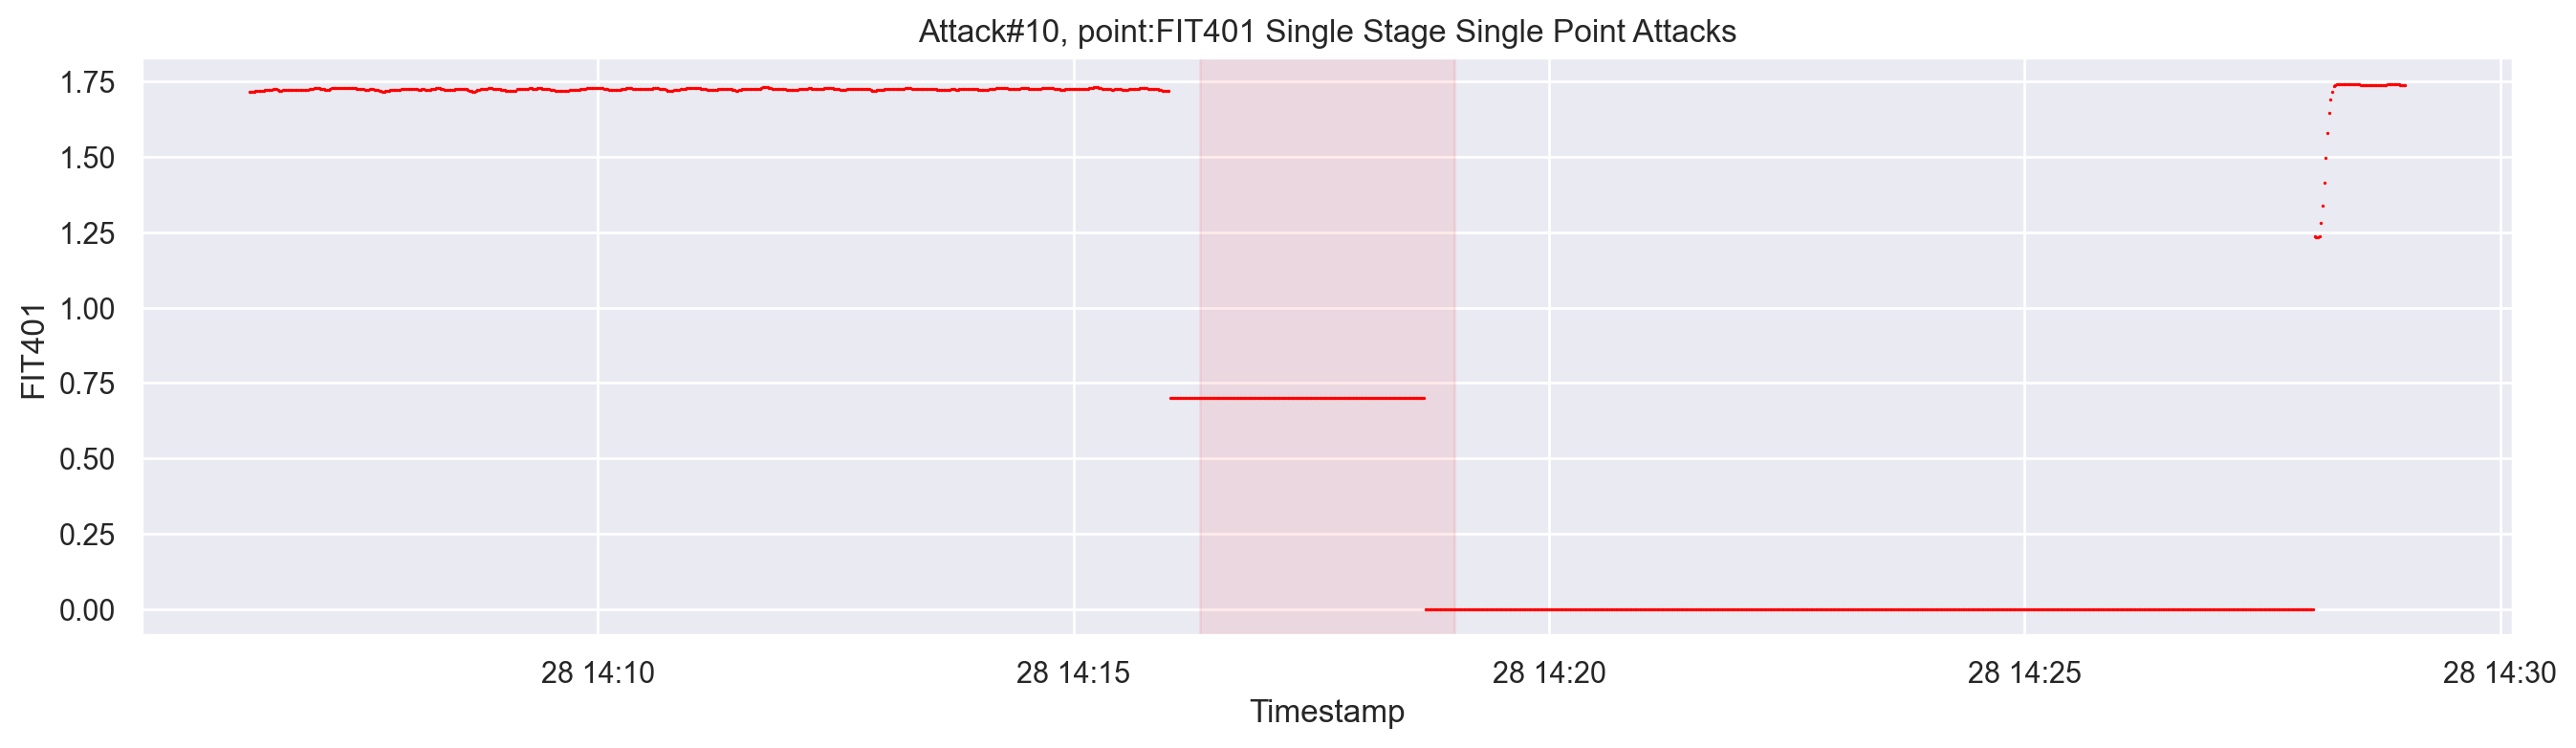

['FIT-401', 'P-501']
1 2
Start State: Value of FIT-401 above 1 
Attack: Set value of FIT-401 as 0 
Expected Impact: UV shutdown; P-501 turns off; 


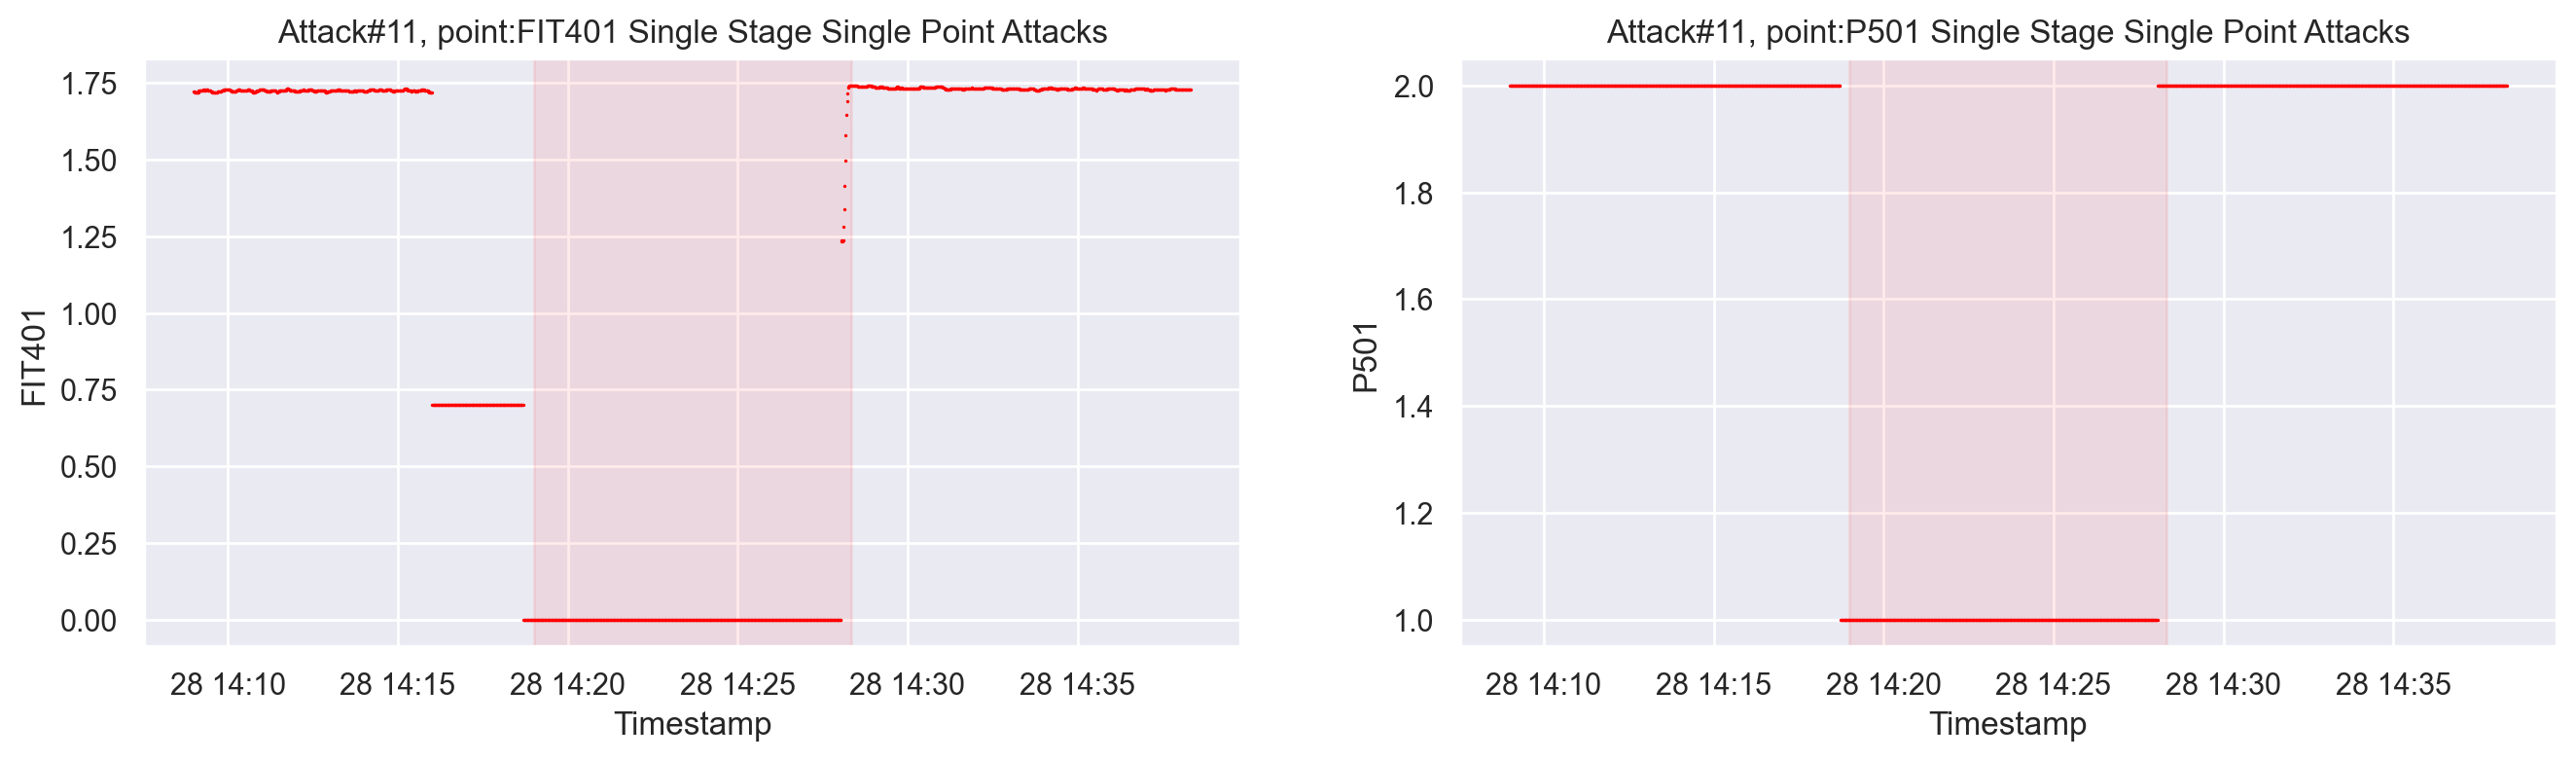

['MV-304']
1 1
Start State: MV-304 is open 
Attack: Close MV-304 
Expected Impact: Halt of stage 3 because change in the backwash process
Unexpected Outcome: UF Startup did not stop because MV-304 was closed late


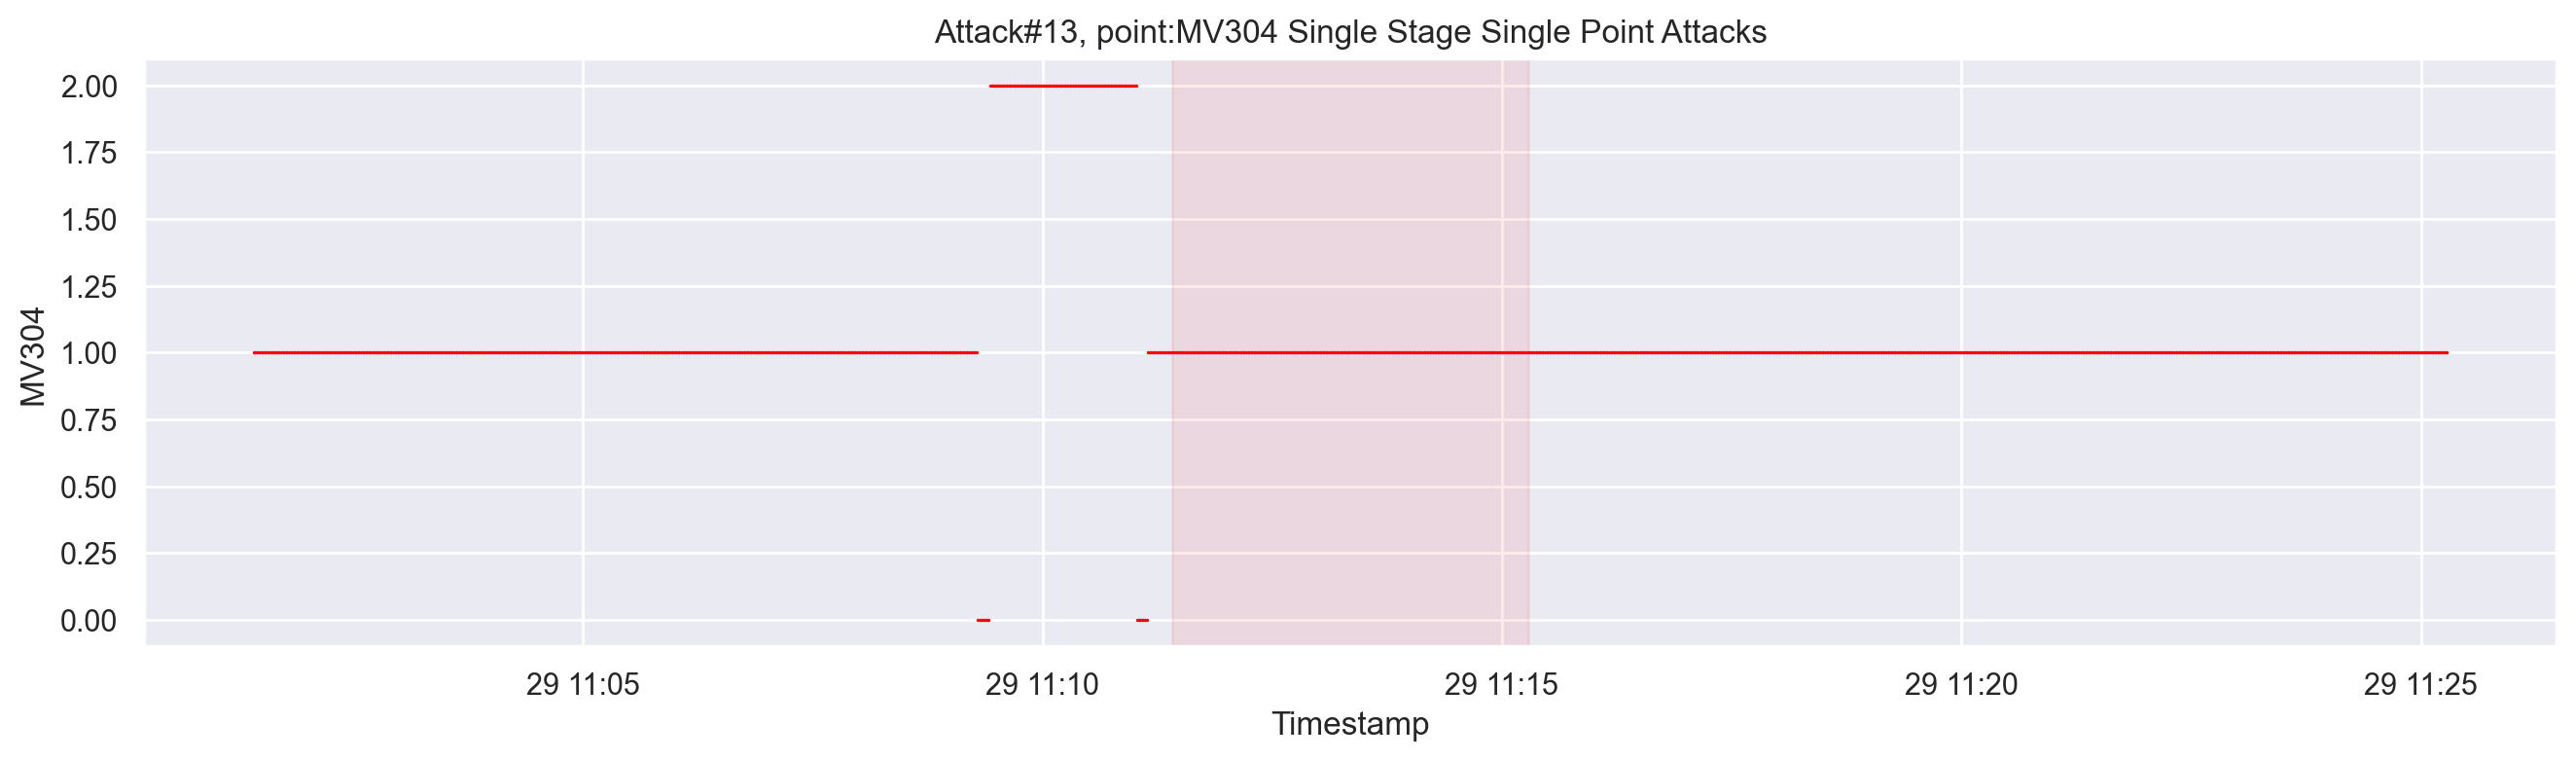

['MV-303', 'LIT-301']
1 2
Start State: MV-303 is closed 
Attack: Do not let MV-303 open 
Expected Impact: Halt of stage 3 because change in the backwash process
Unexpected Outcome: Attack Failed because Startup sequence did not start because Tank 301 was already full


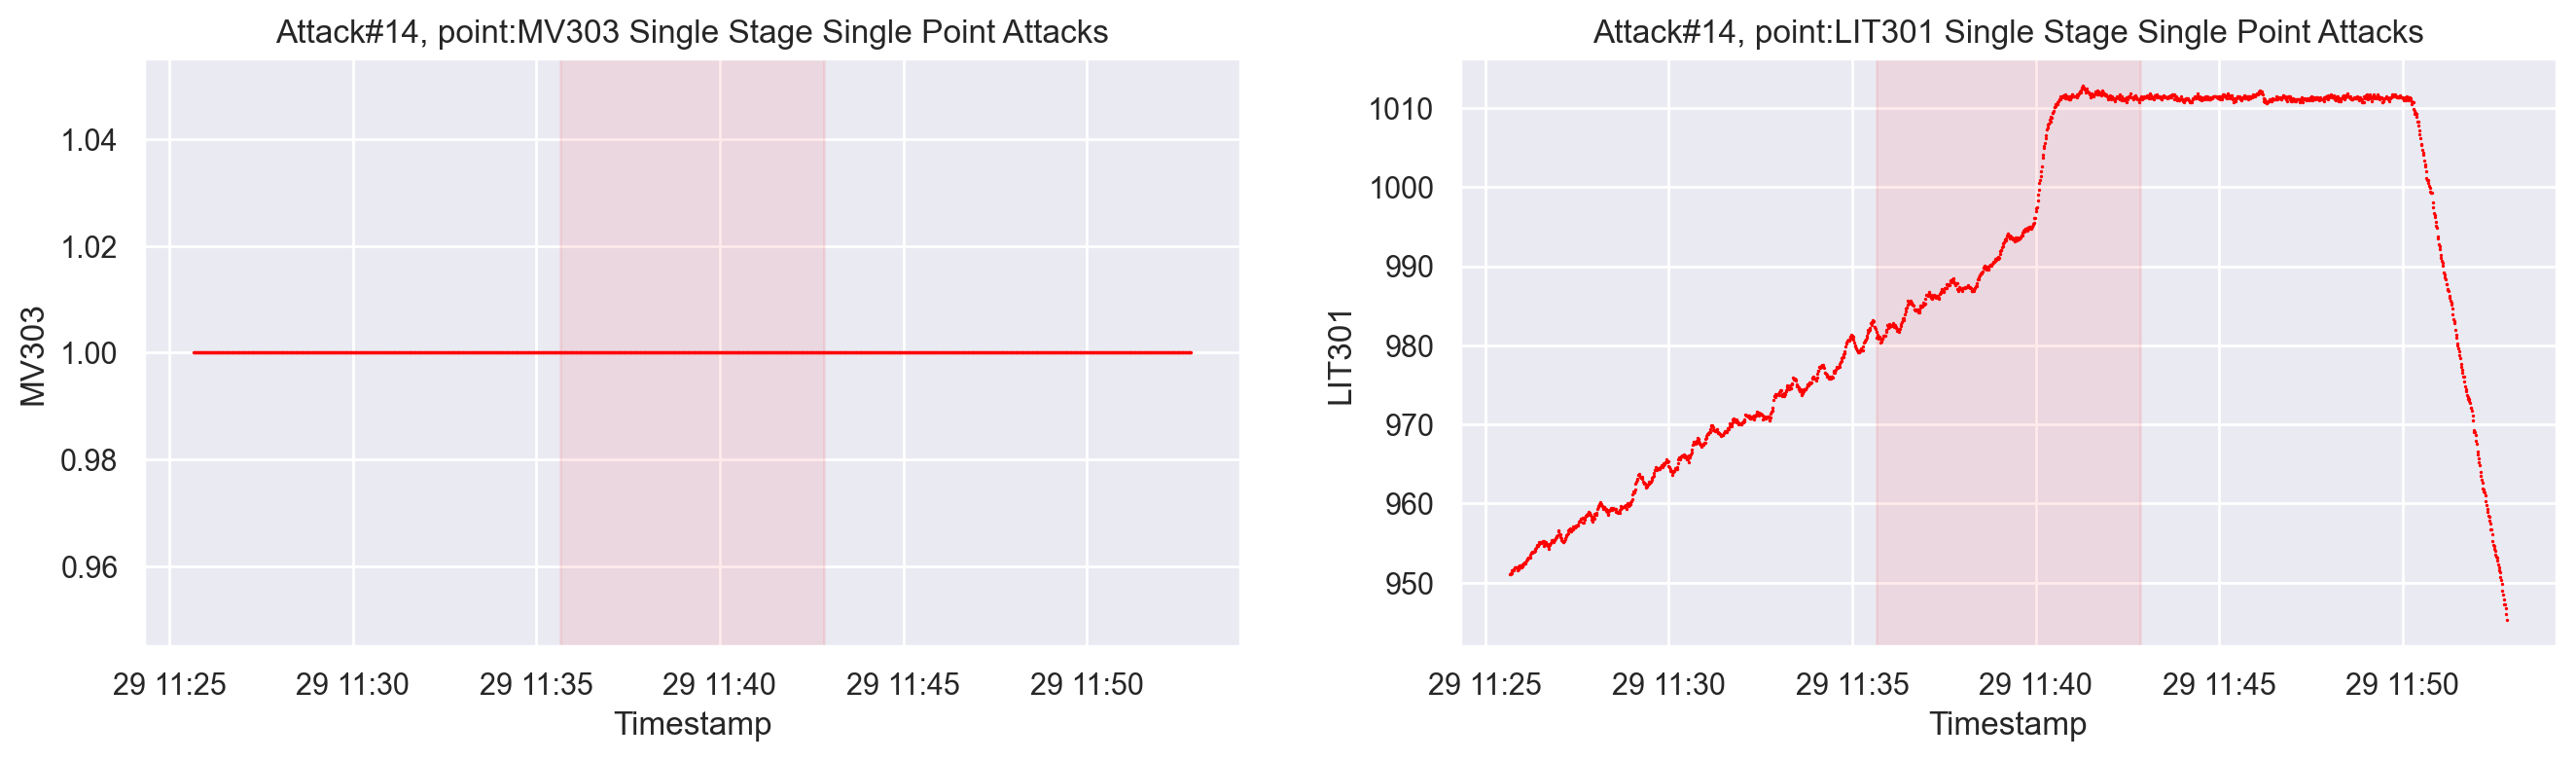

['LIT-301', 'FIT-301']
1 2
Start State: Water level between L and H 
Attack: Decrease water level by 1mm each second 
Expected Impact: Tank Overflow


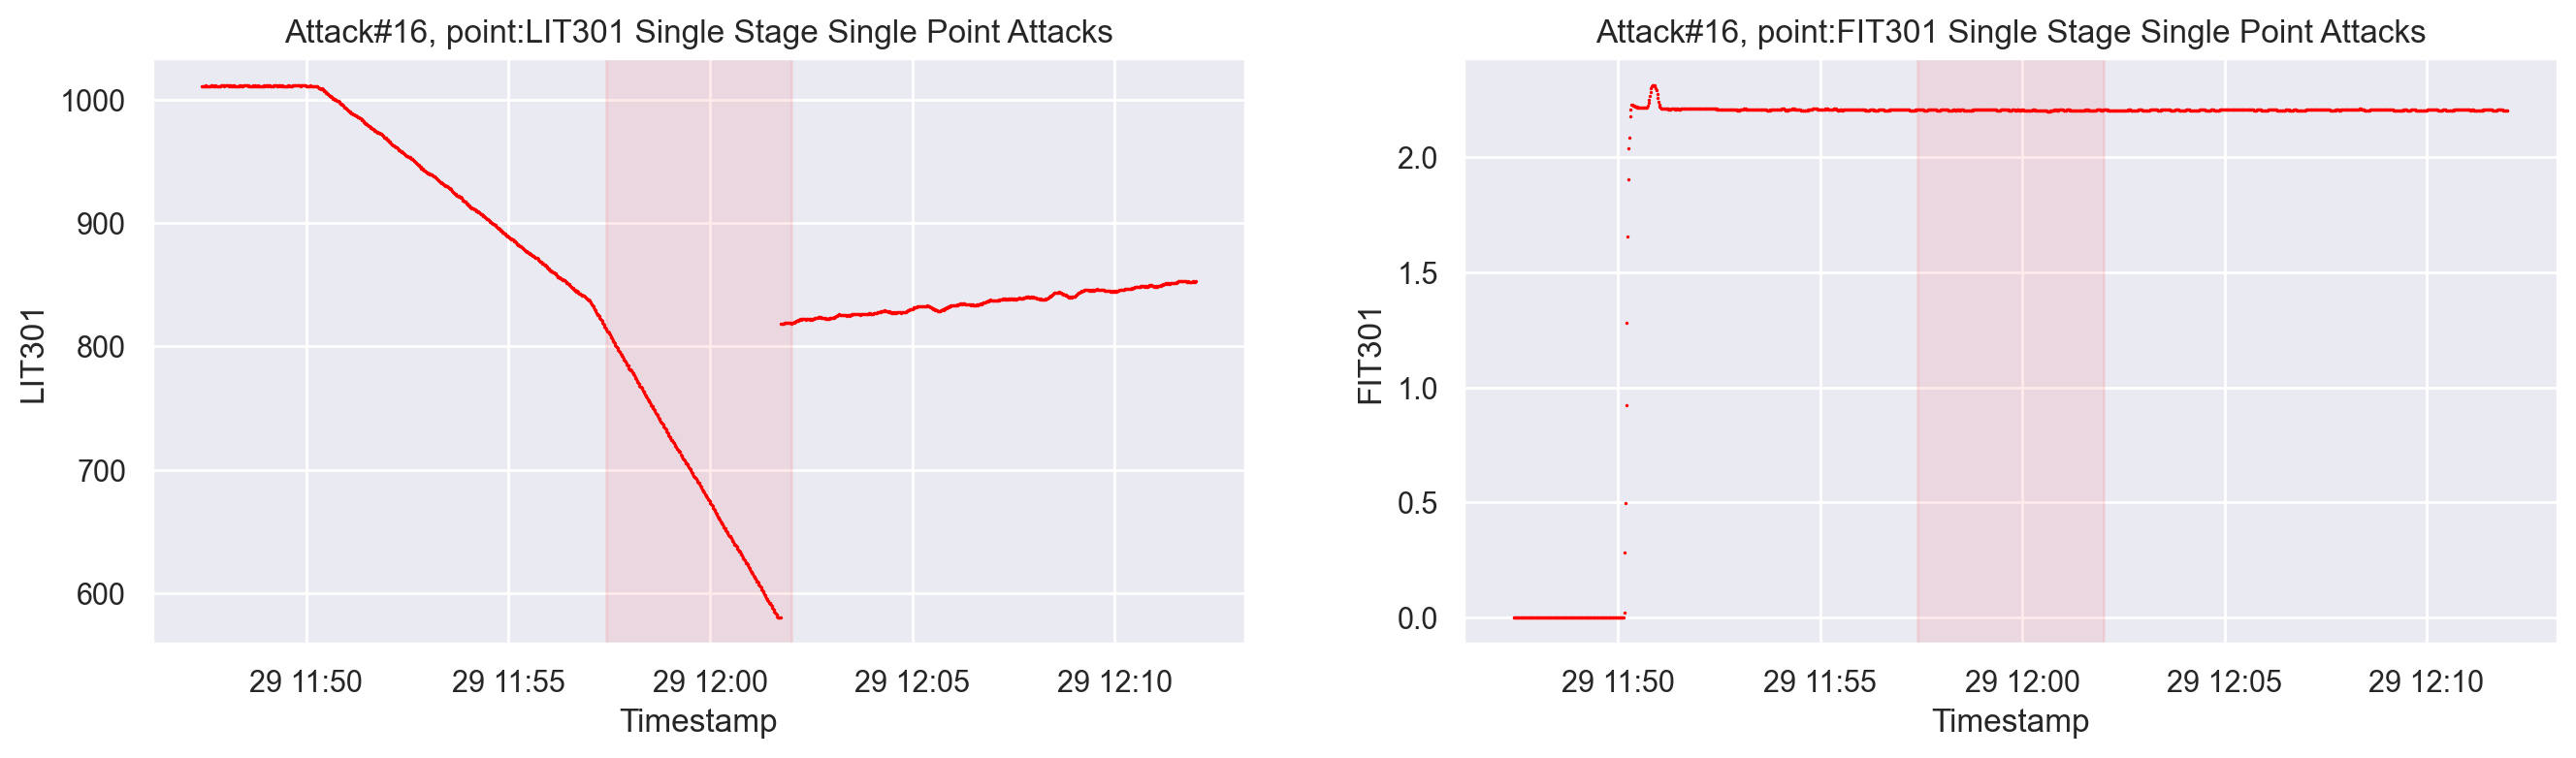

['MV-303', 'LIT-301', 'FIT-301']
2 2
Start State: Closed 
Attack: Do not let MV-303 open 
Expected Impact: Halt of stage 3 because change in the backwash process


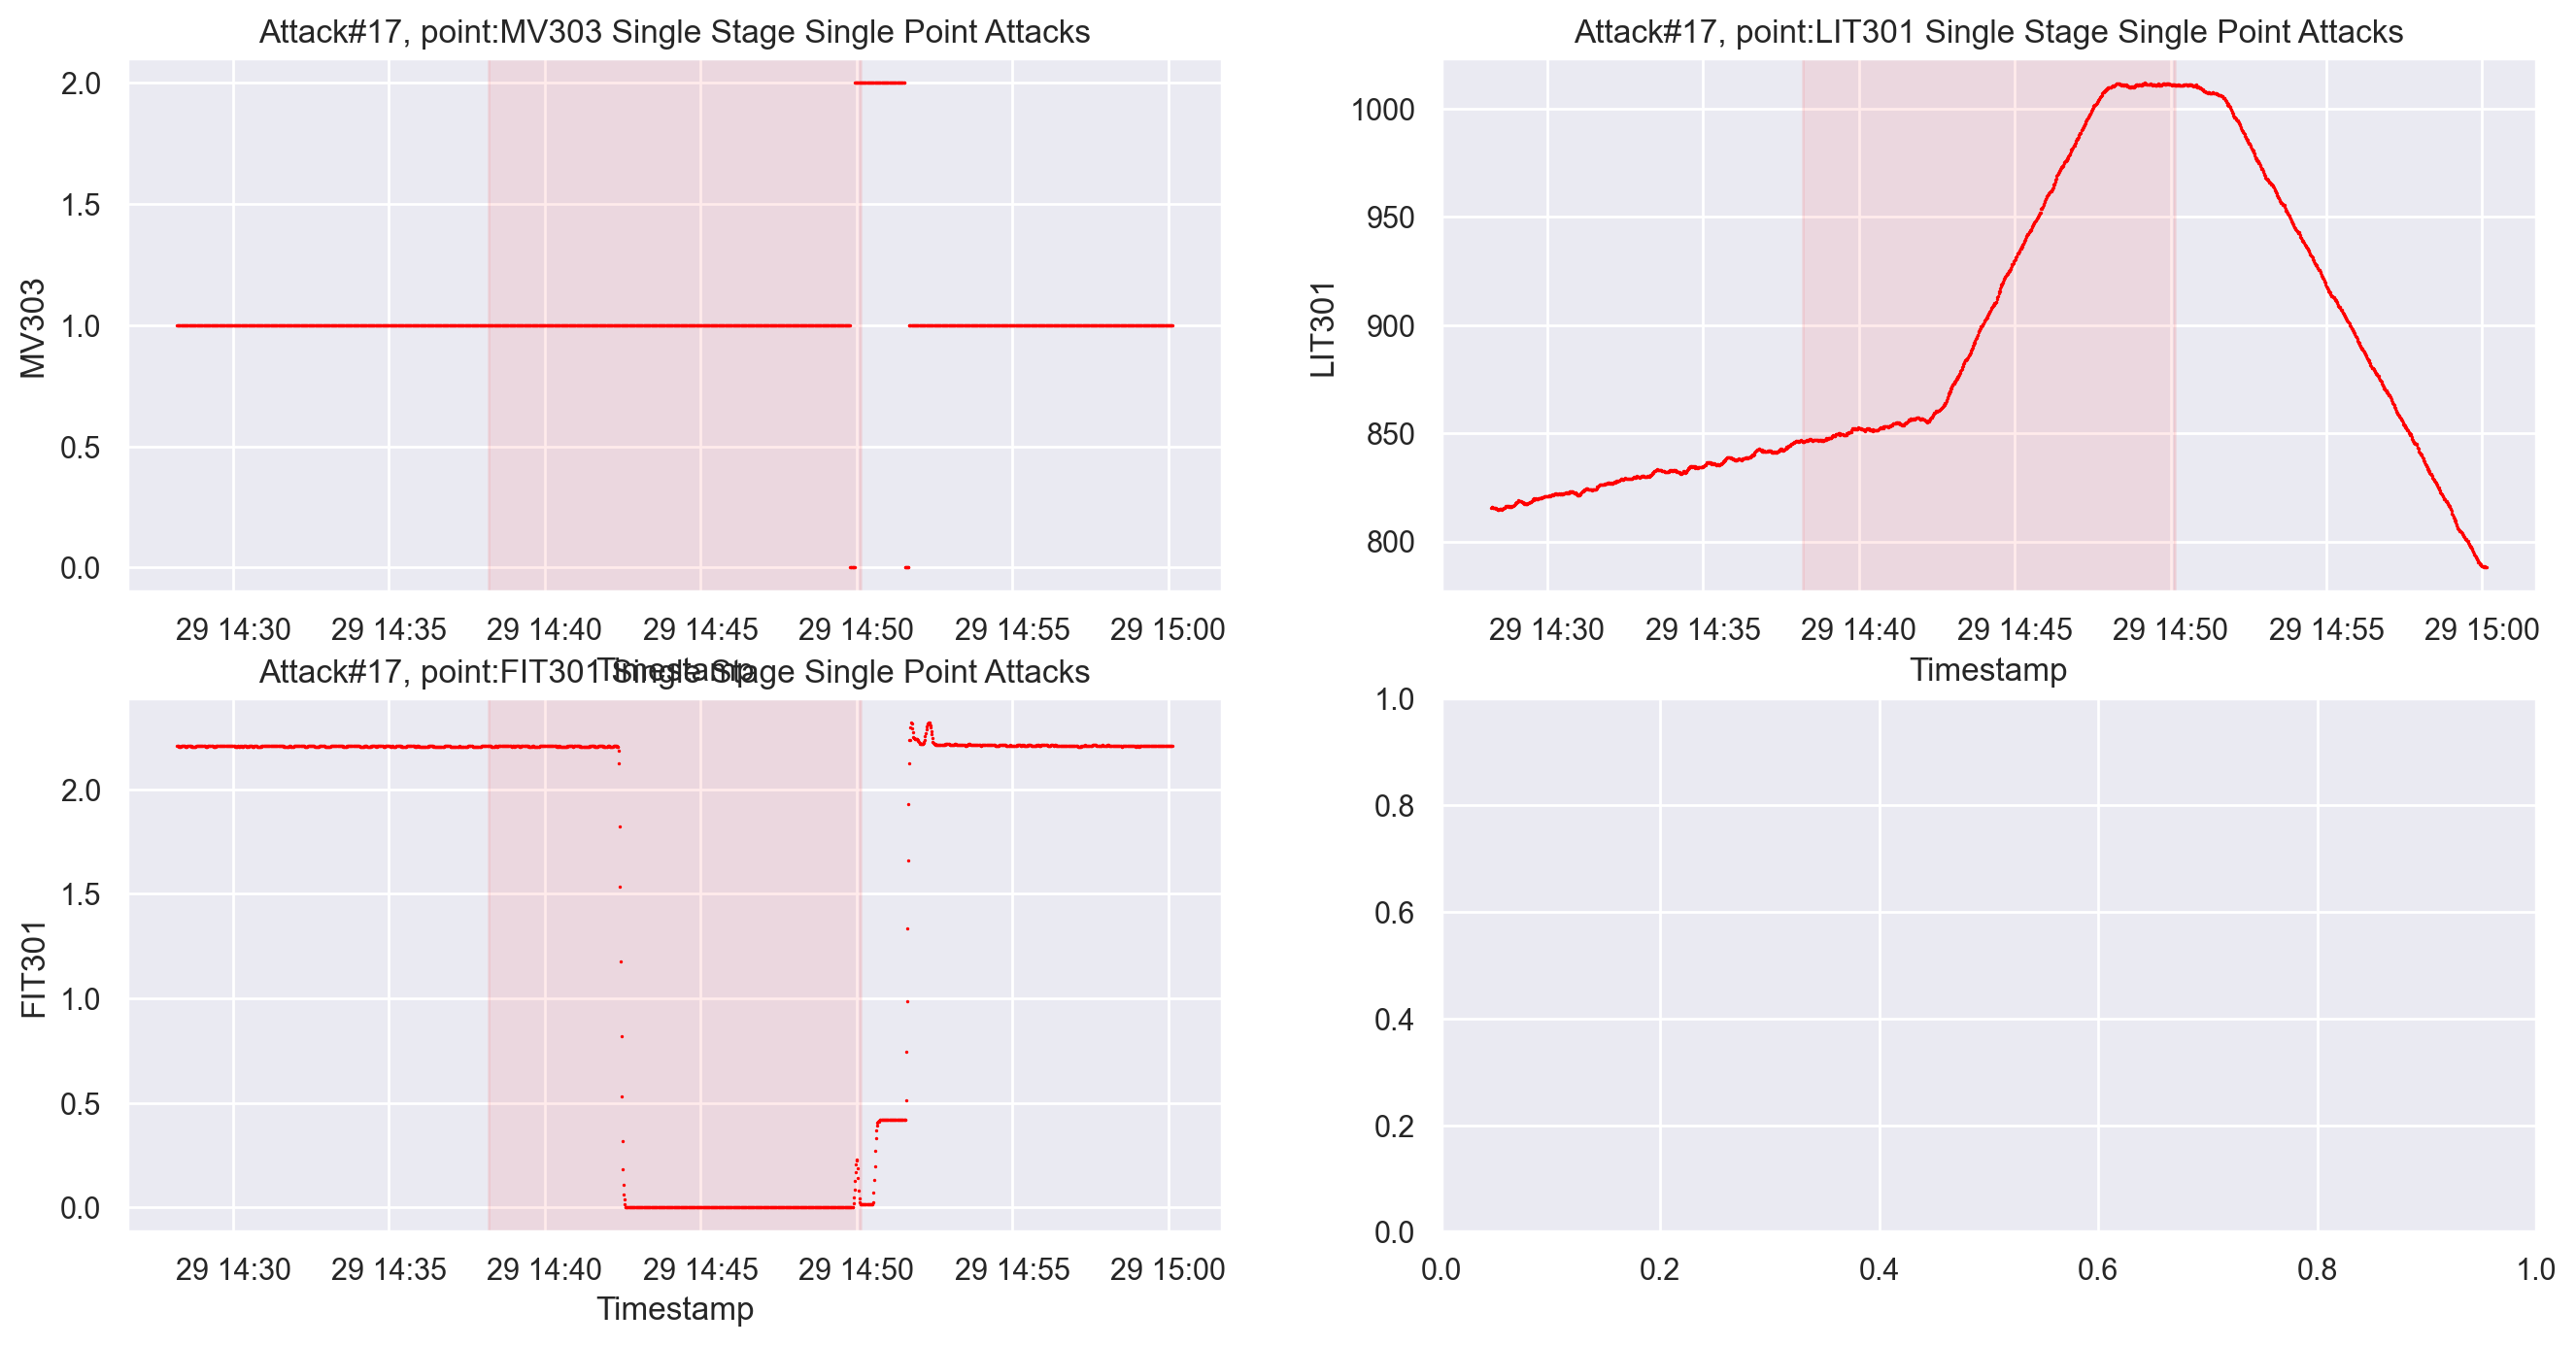

['AIT-504']
1 1
Start State: Value of AIT-504 <15 uS/cm 
Attack: Set value of AIT-504 to 16 uS/cm 
Expected Impact: RO shut down sequence starts after 30 minutes. Water should go to drain.
Unexpected Outcome: RO did not shutdown; Water did not go to drain


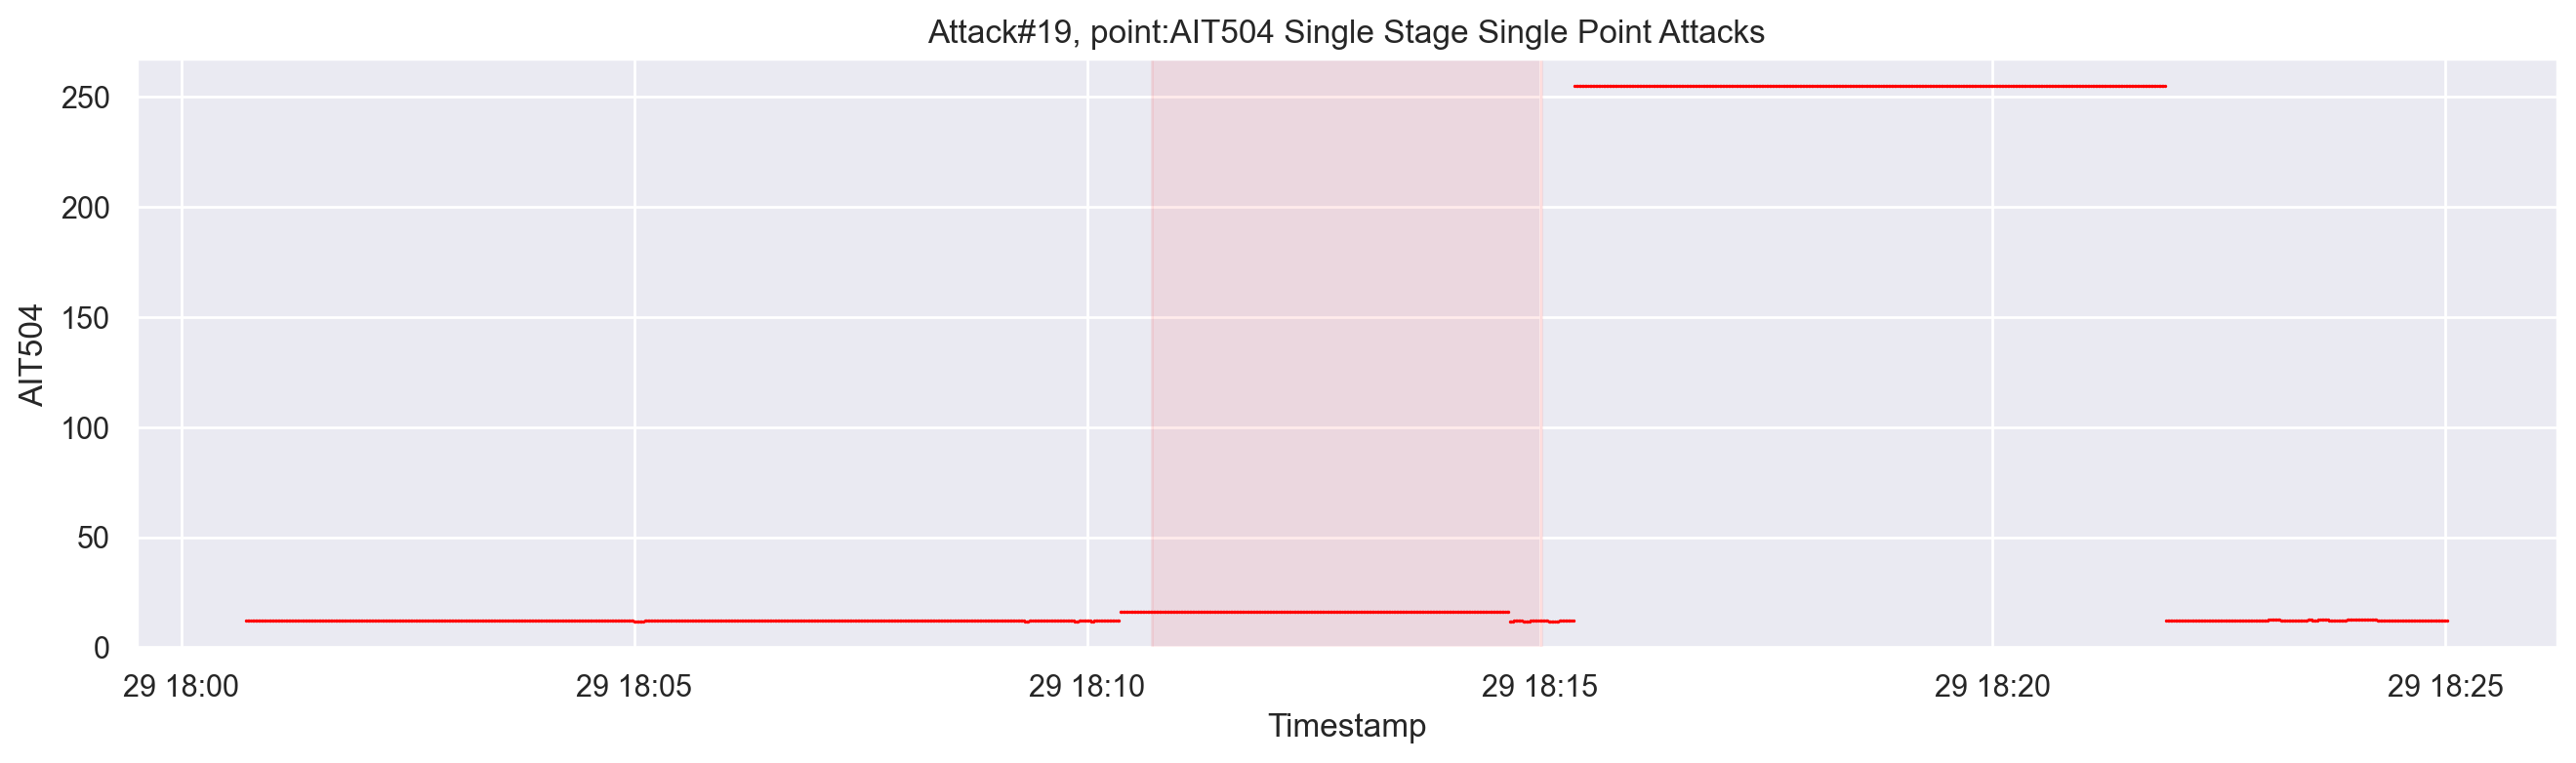

['AIT-504']
1 1
Start State: Value of AIT-504 <15 uS/cm 
Attack: Set value of AIT-504 to 255 uS/cm 
Expected Impact: RO shut down sequence starts after 30 minutes. Water should go to drain.
Unexpected Outcome: RO did not shutdown; Water did not go to drain


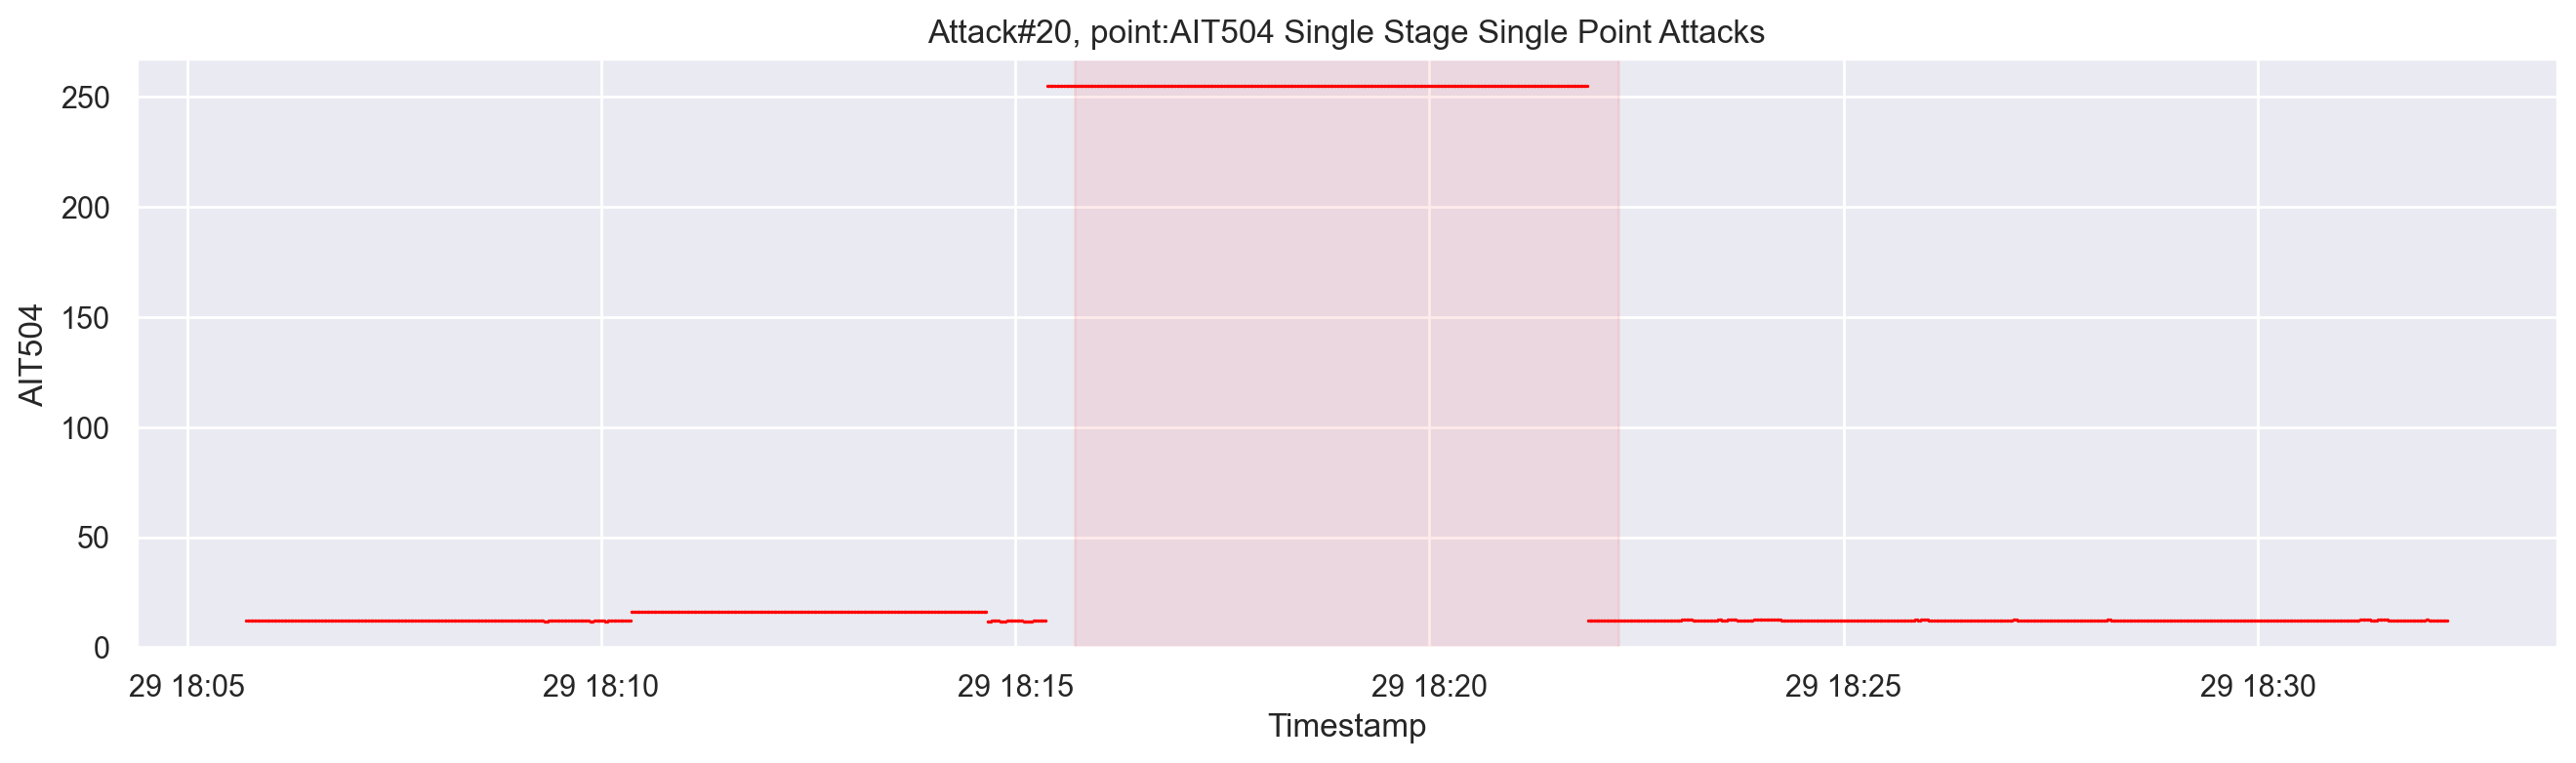

['MV-101', 'LIT-101']
1 2
Start State: MV-101 is open; LIT-101 between L and H 
Attack: Keep MV-101 on countinuosly; Value of LIT-101 set as 700 mm 
Expected Impact: Tank overflow


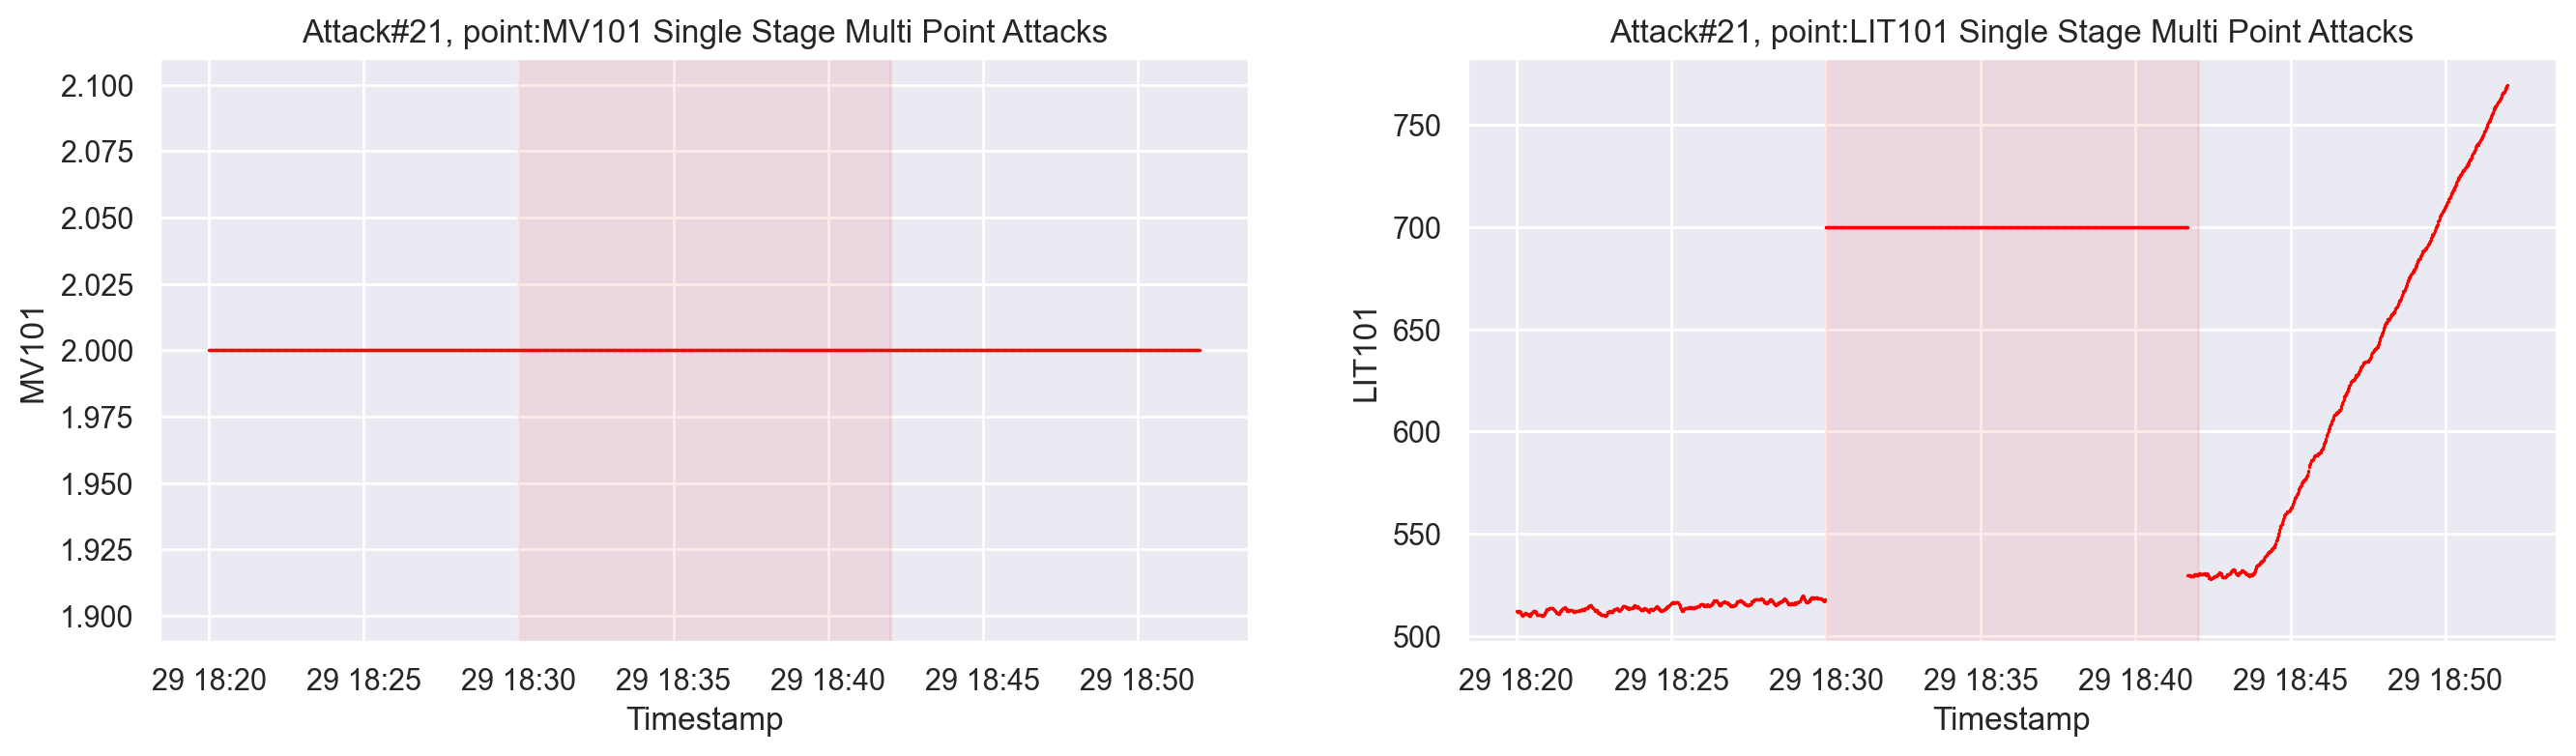

['UV-401', 'AIT-502', 'P-501', 'FIT-502']
2 2
Start State: UV-01 is on; AIT-502 is <150; P-501 is open 
Attack: Stop UV-401; Value of AIT502 set as 150; Force P-501 to remain on 
Expected Impact: Possible damage to RO
Unexpected Outcome: P501 could not be kept on; Reduced output at FIT-502


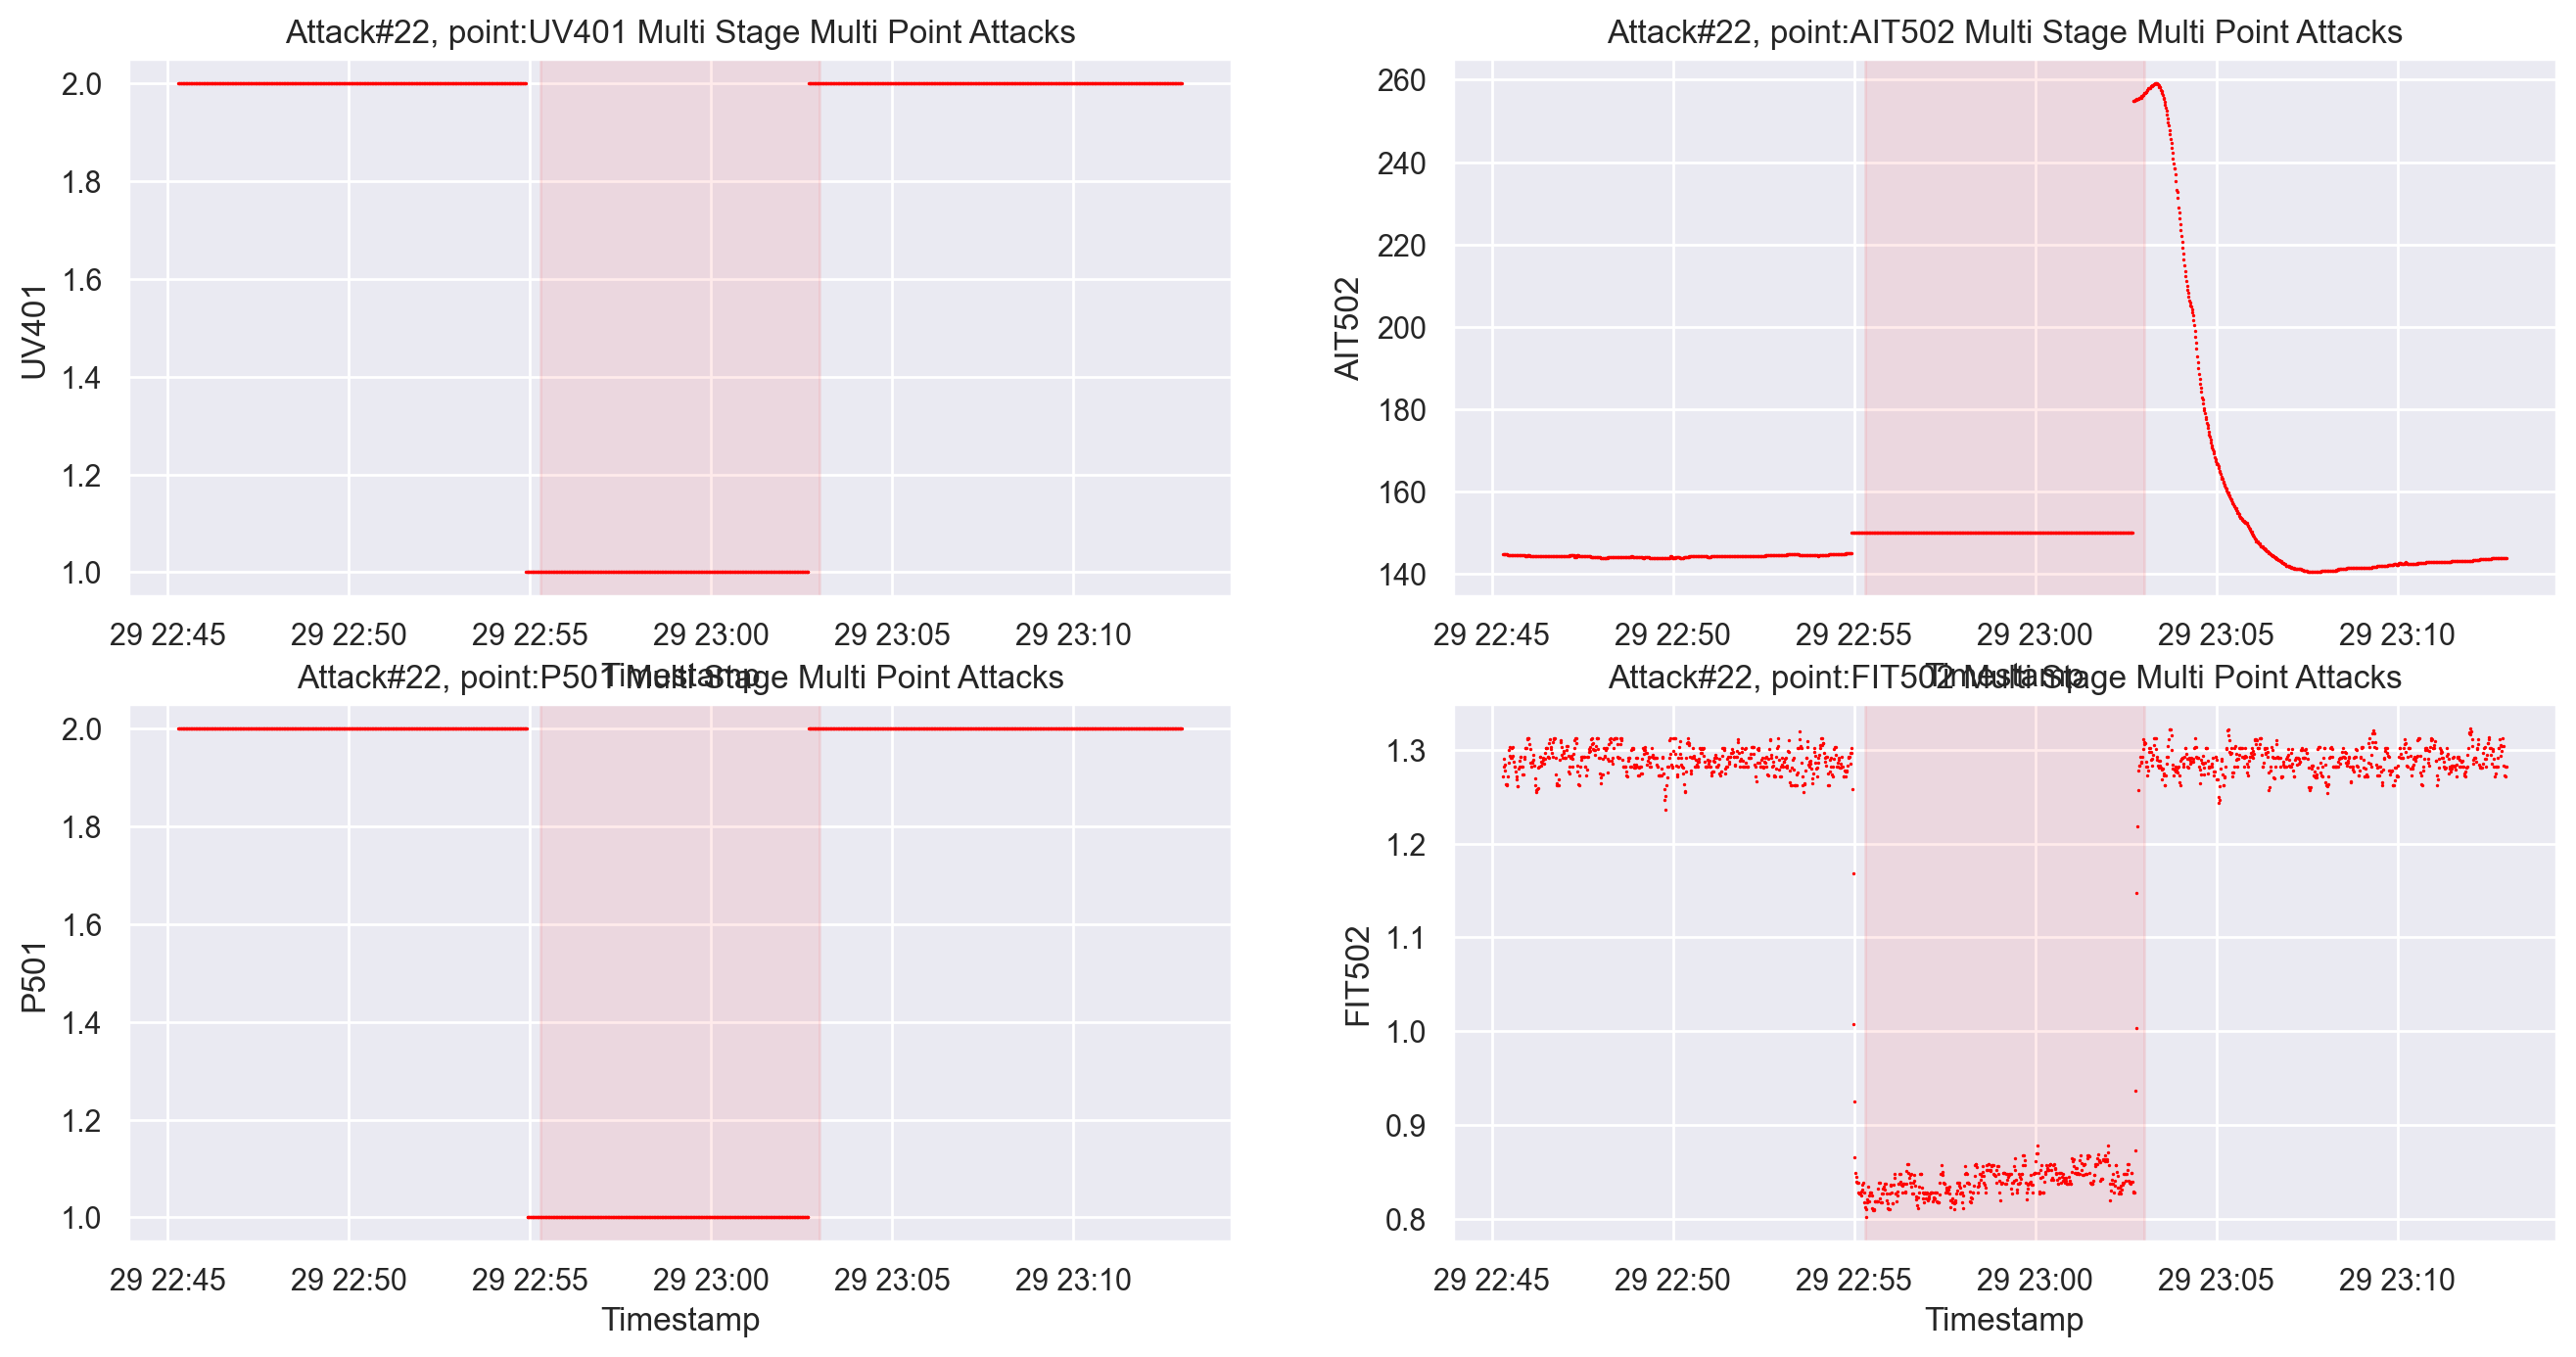

['P-602', 'DPIT-301', 'MV-302']
2 2
Start State: DPIT-301 is <0.4 bar; MV-302 is on; P-602 is closed 
Attack: Value of DPIT-301 set to >0.4 bar; Keep MV-302 open; Keep P-602 closed  
Expected Impact: System freeze


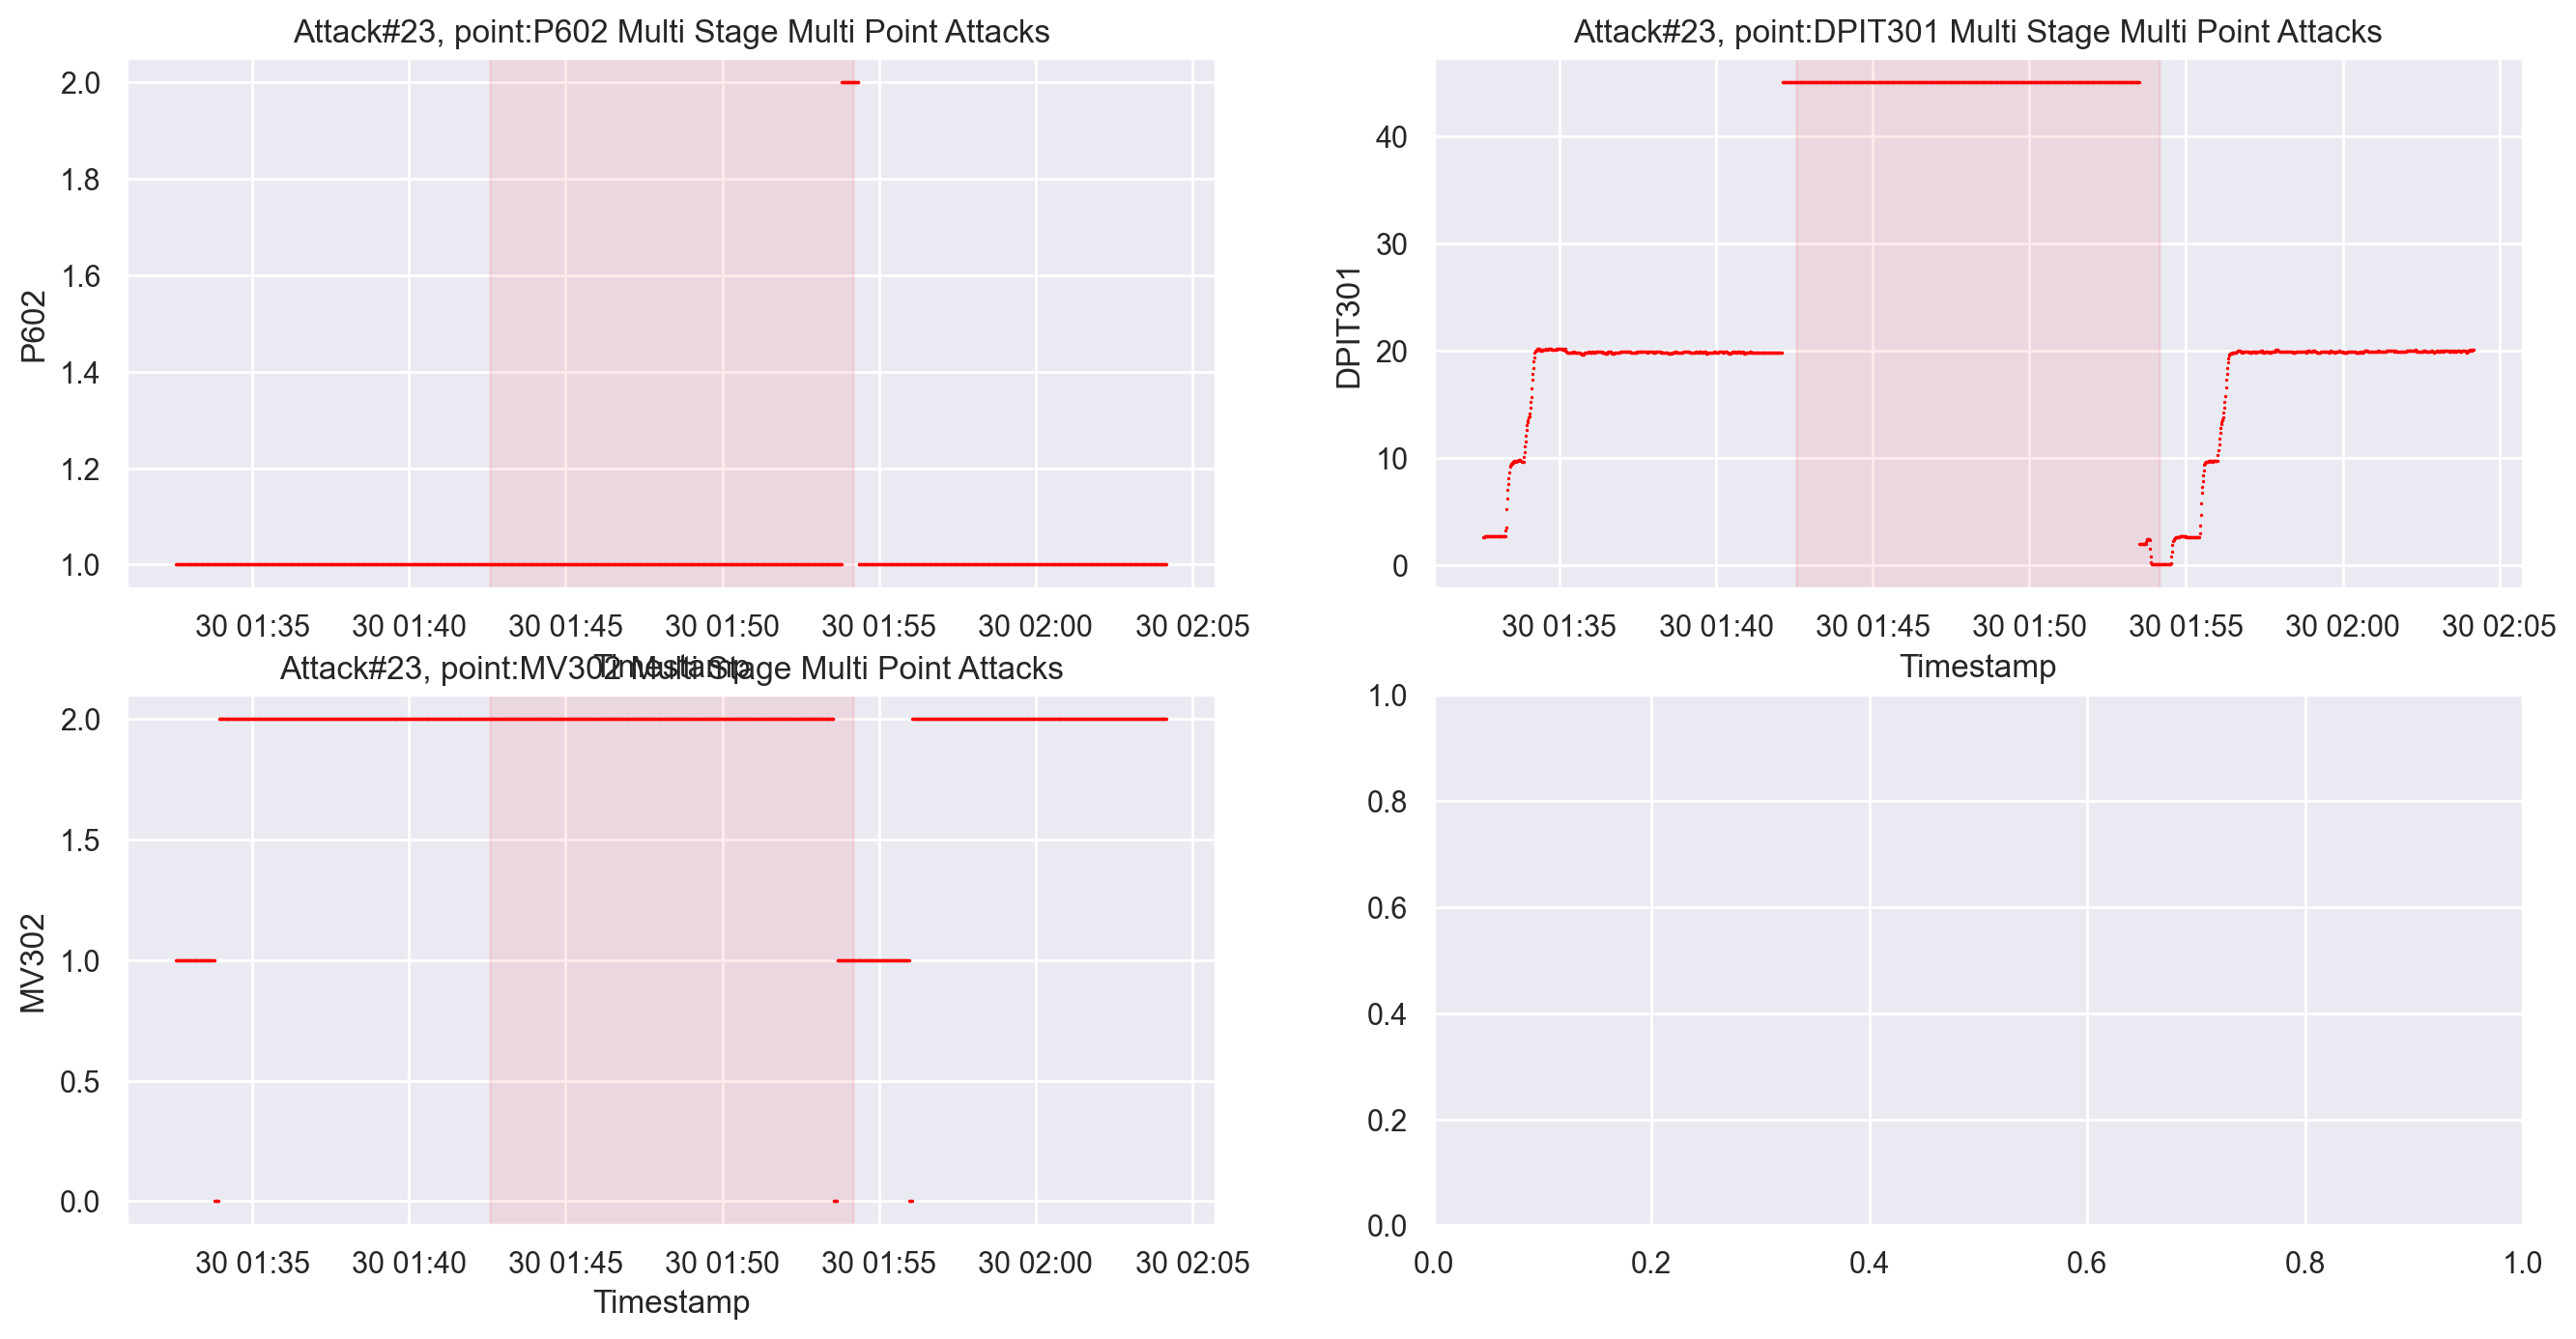

['P-203', 'P-205', 'P-101', 'LIT-101']
2 2
Start State: P-203 is on; P-205 is on 
Attack: Turn of P-203 and P-205 
Expected Impact: Change in water quality
Unexpected Outcome: Not much impact made due to closure of P-101 because tank T-101 became full


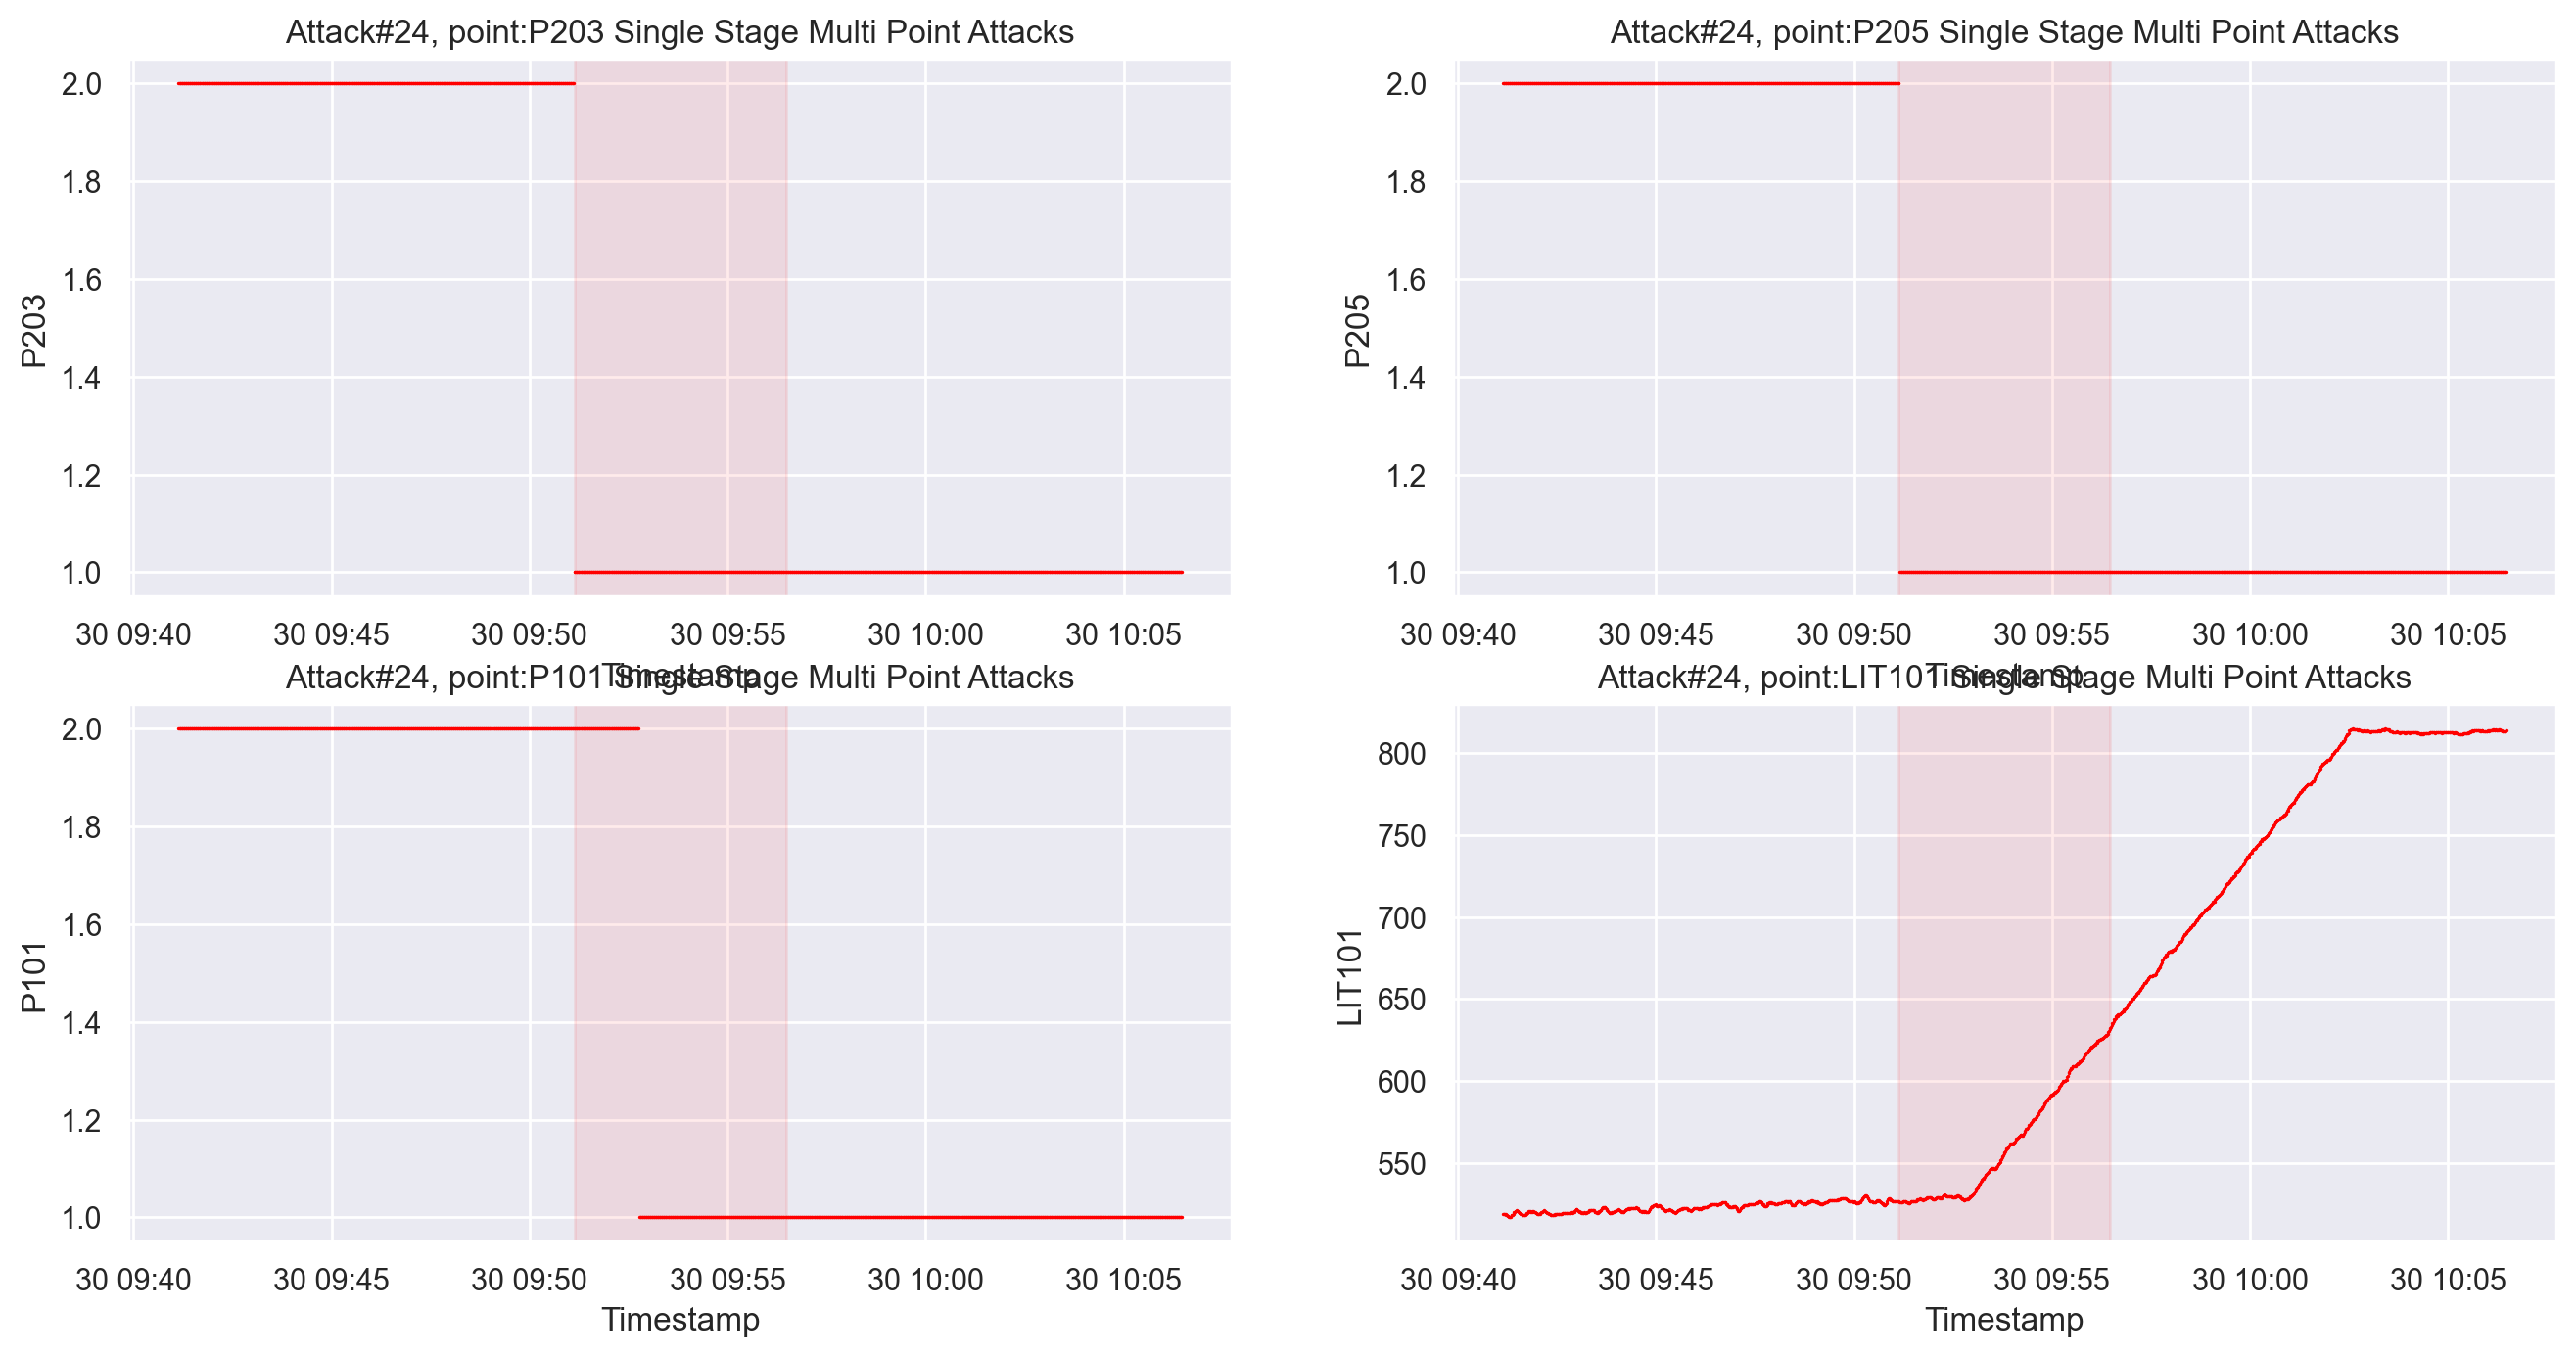

['LIT-401', 'P-402']
1 2
Start State: Value of LIT-401 <1000; P-402 is on 
Attack: Set value of LIT-401 as 1000; P-402 is kept on 
Expected Impact: Tank underflow


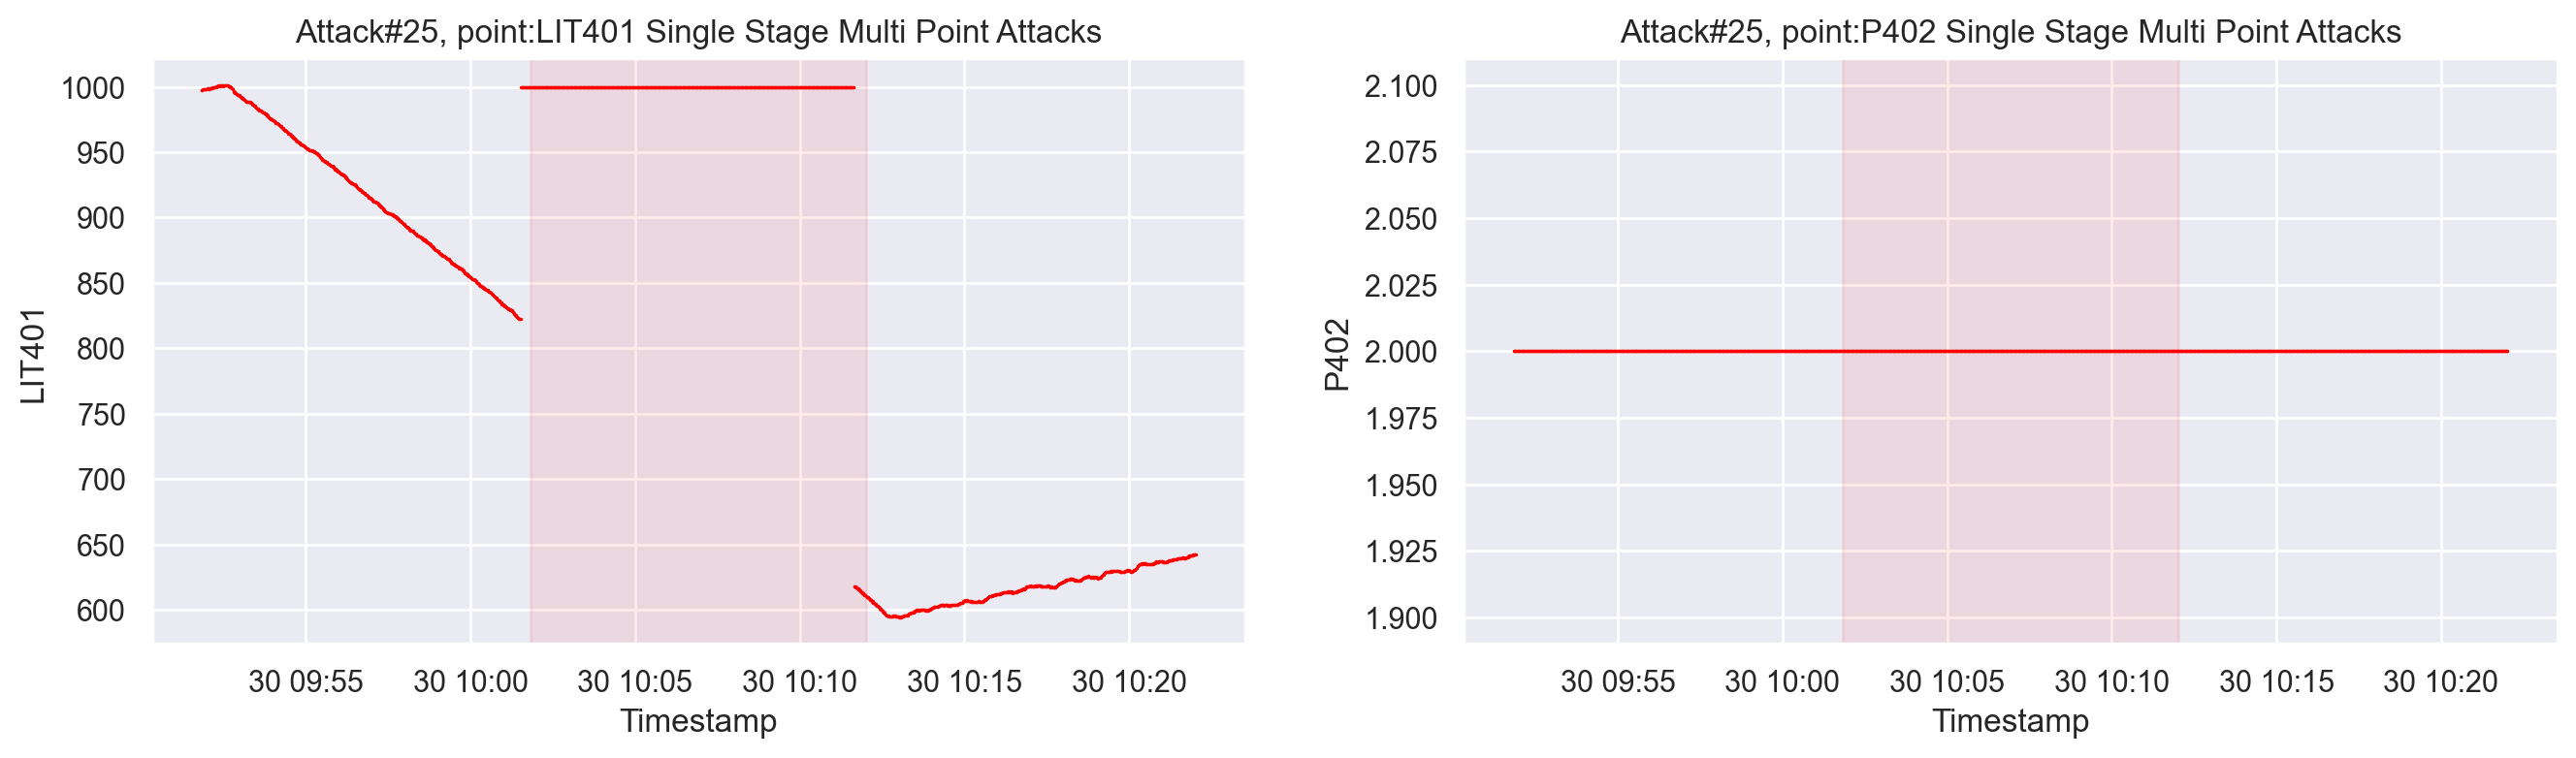

['P-101', 'LIT-101', 'P-102', 'LIT-301']
2 2
Start State: P-101 is off; P-102 is on; LIT-301 is between L and H 
Attack: P-101 is turned on continously; Set value of LIT-301 as 801 mm 
Expected Impact: Tank 101 underflow; Tank 301 overflow


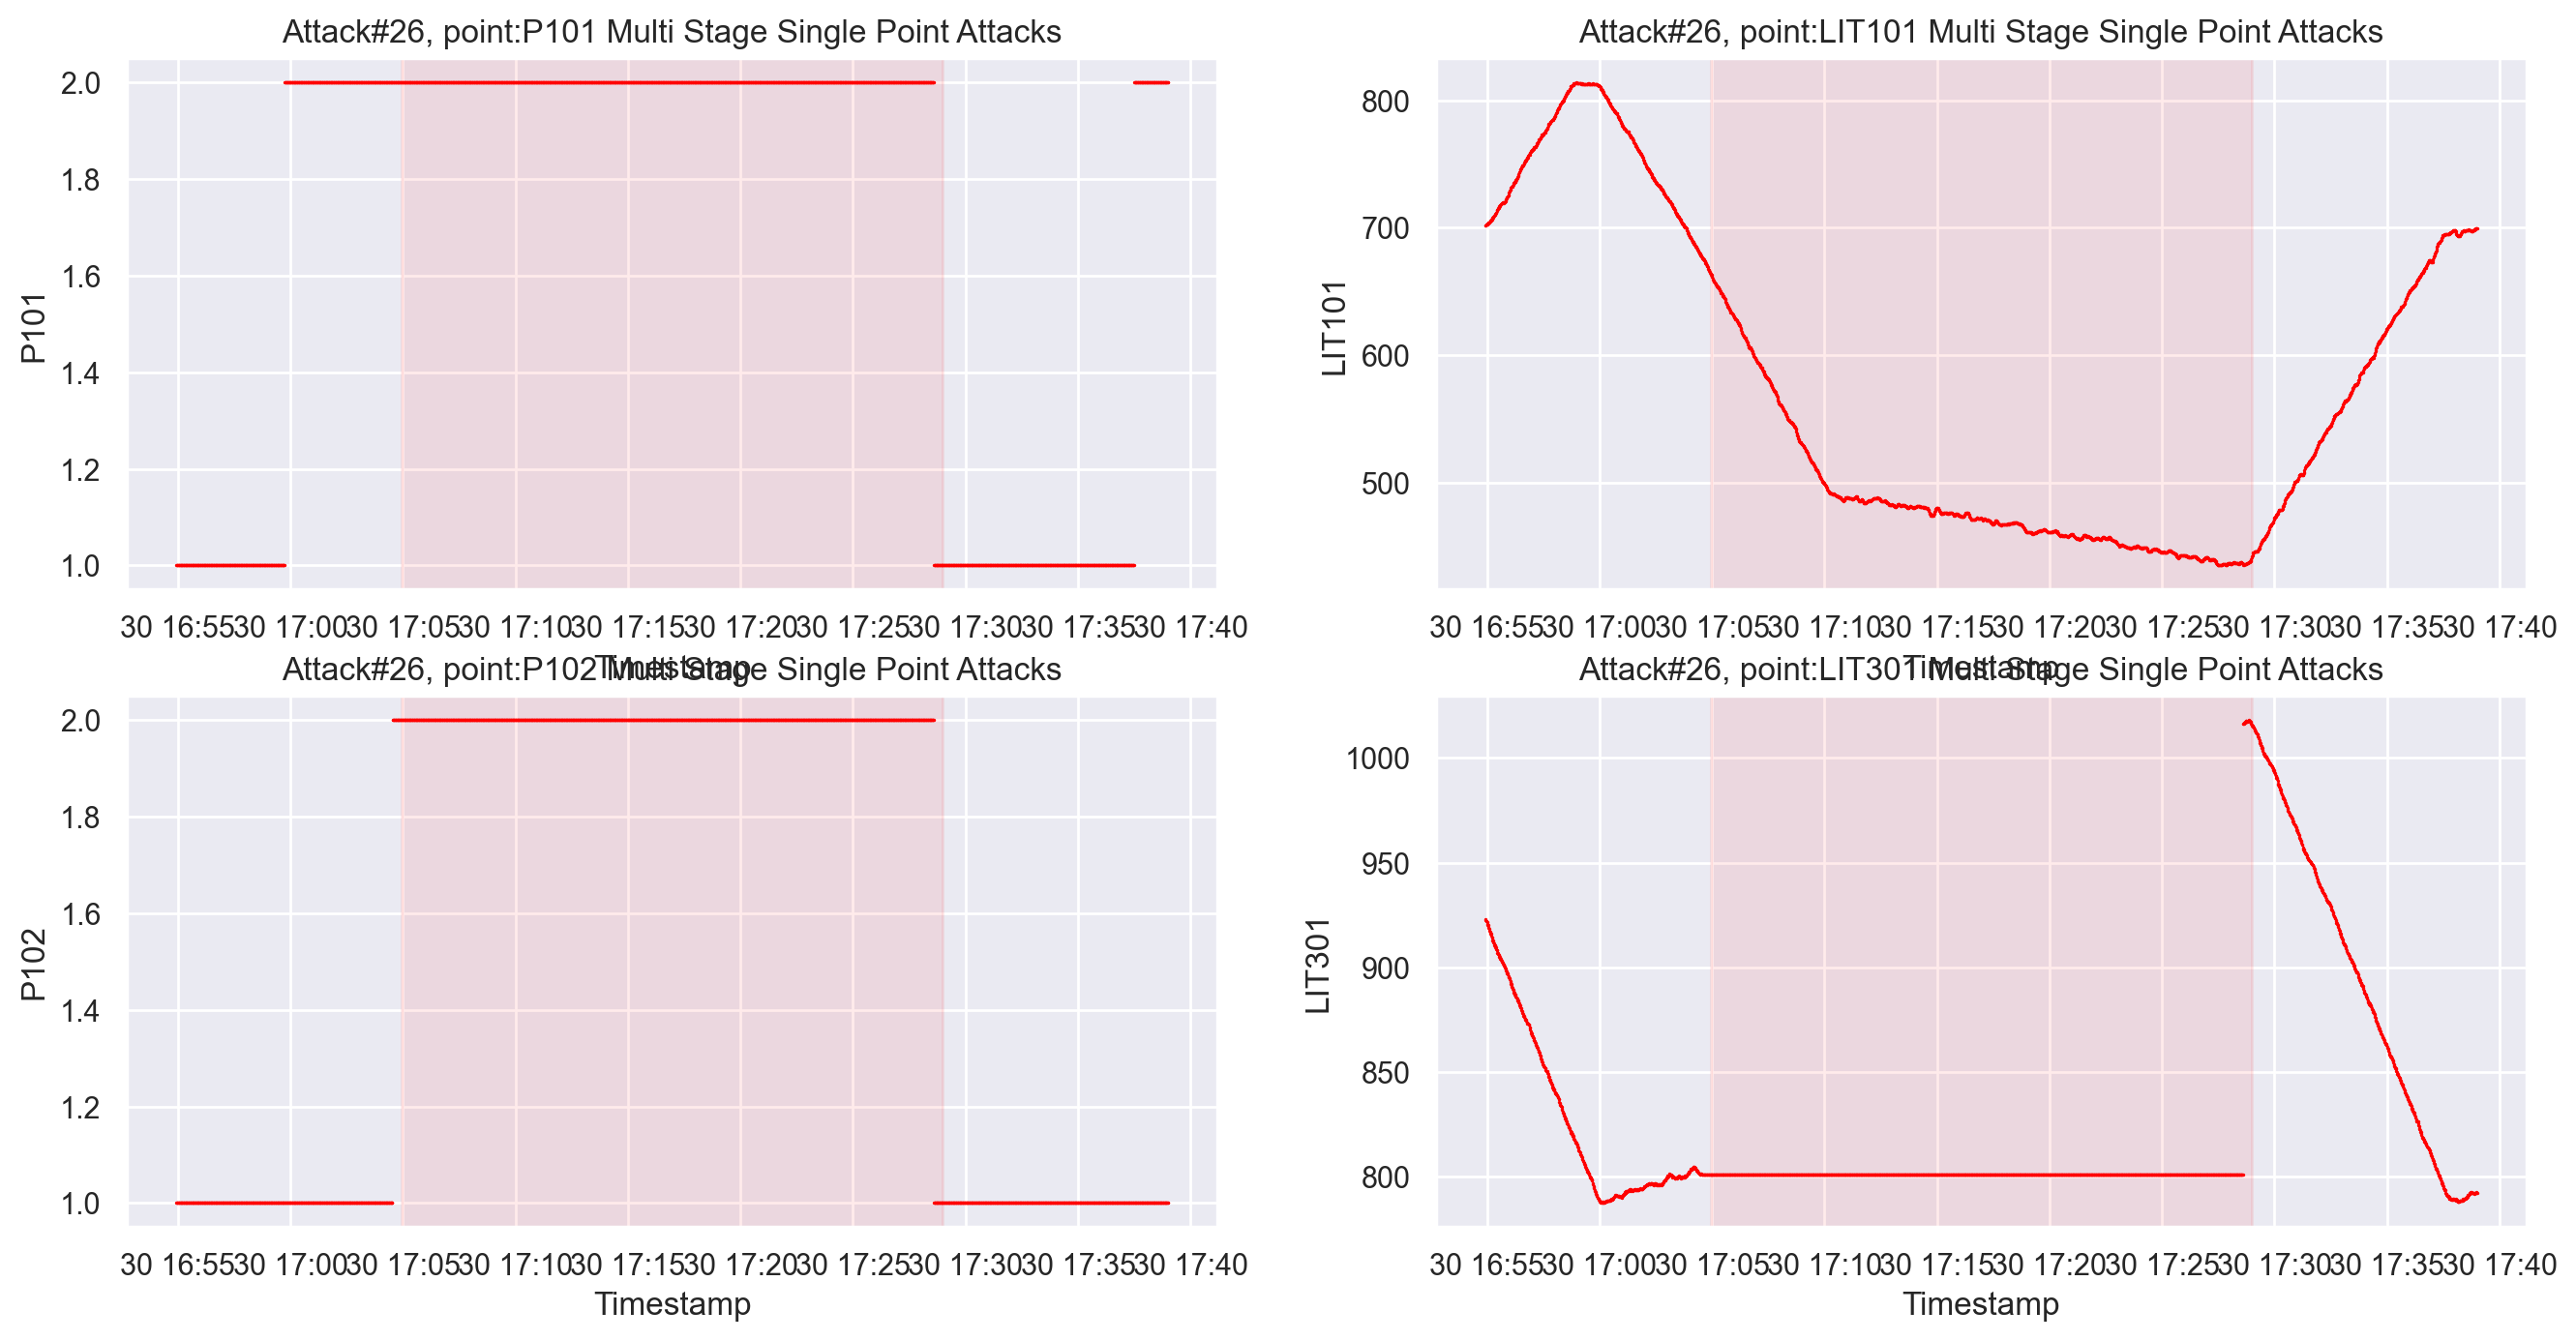

['P-302', 'LIT-401']
1 2
Start State: P302 is on, LIT401 Is  between L and H 
Attack: Keep P-302 on contineoulsy; Value of  LIT401 set as 600 mm till 1:26:01 
Expected Impact: Tank overflow


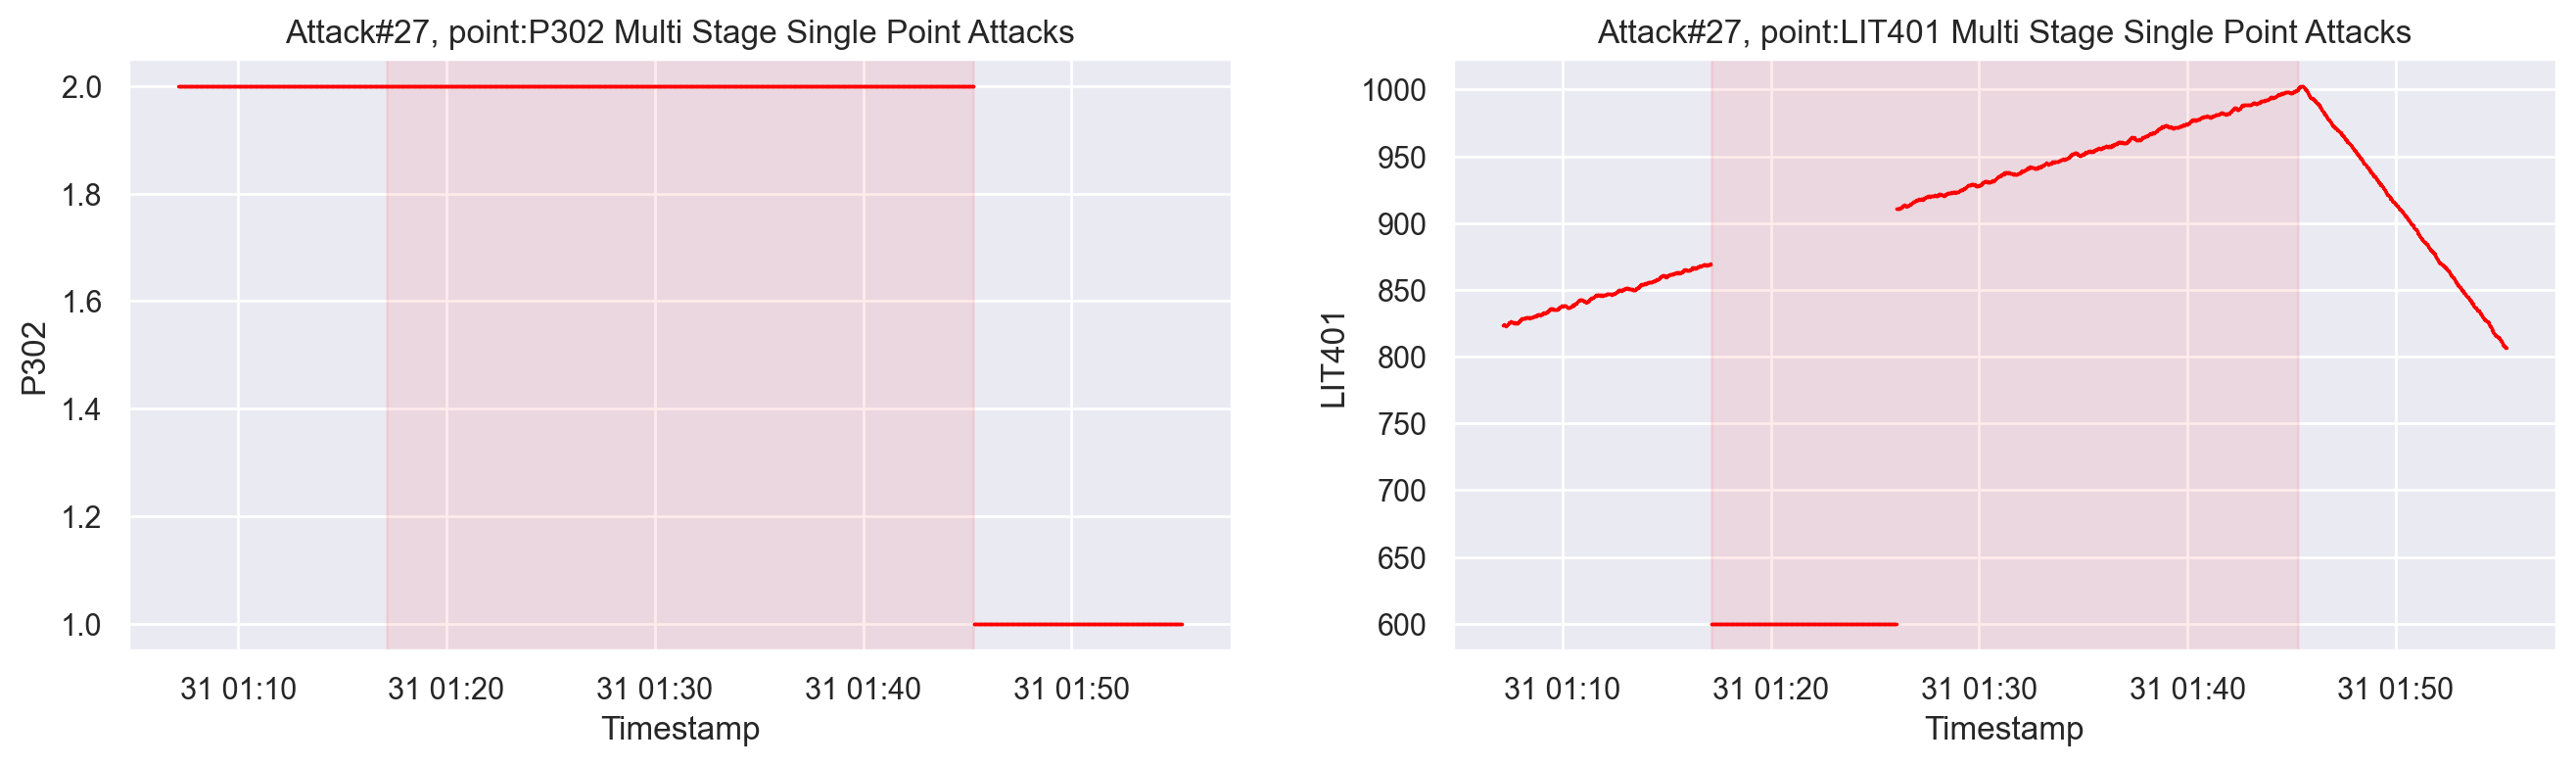

['P-302', 'FIT-401', 'LIT-401']
2 2
Start State: P302 is on 
Attack: Close P-302 
Expected Impact: Stop inflow of tank T-401


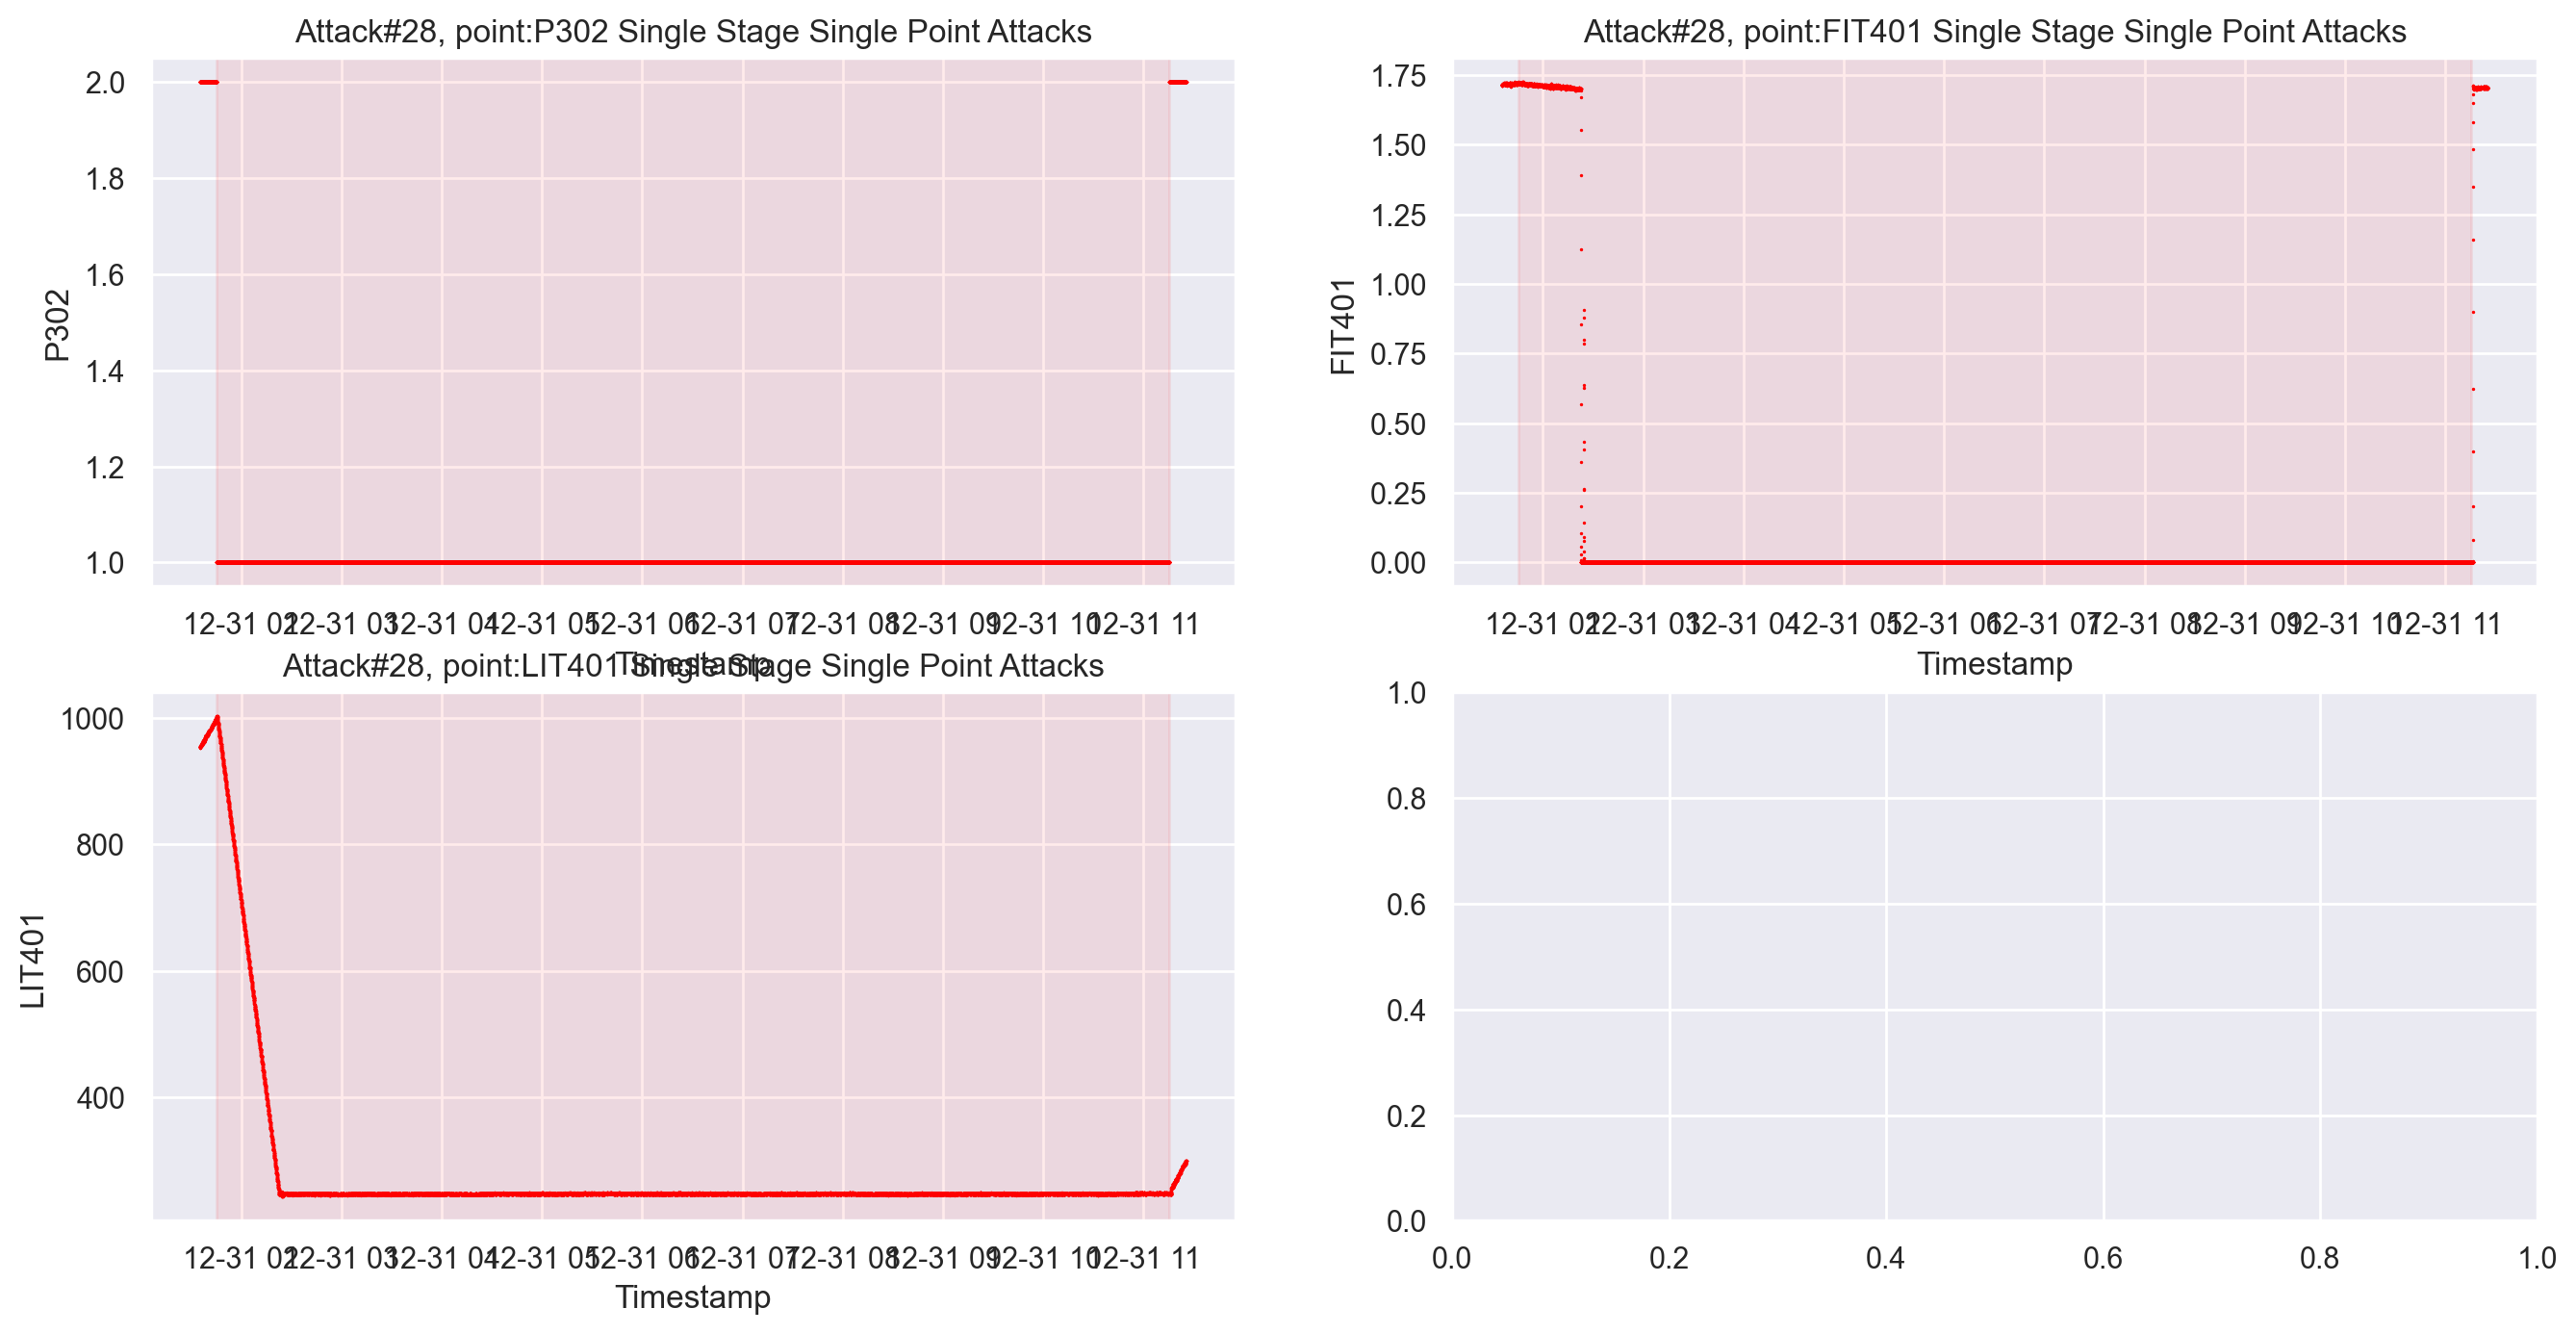

['P-201', 'P-203', 'P-205']
2 2
Start State: P-201 is closed; P-203 is closed; P-205 is closed 
Attack: Turn on P-201; Turn on P-203; Turn on P-205 
Expected Impact: Wastage of chemicals
Unexpected Outcome: The three dosing pump did not start because of some mechanical interlock


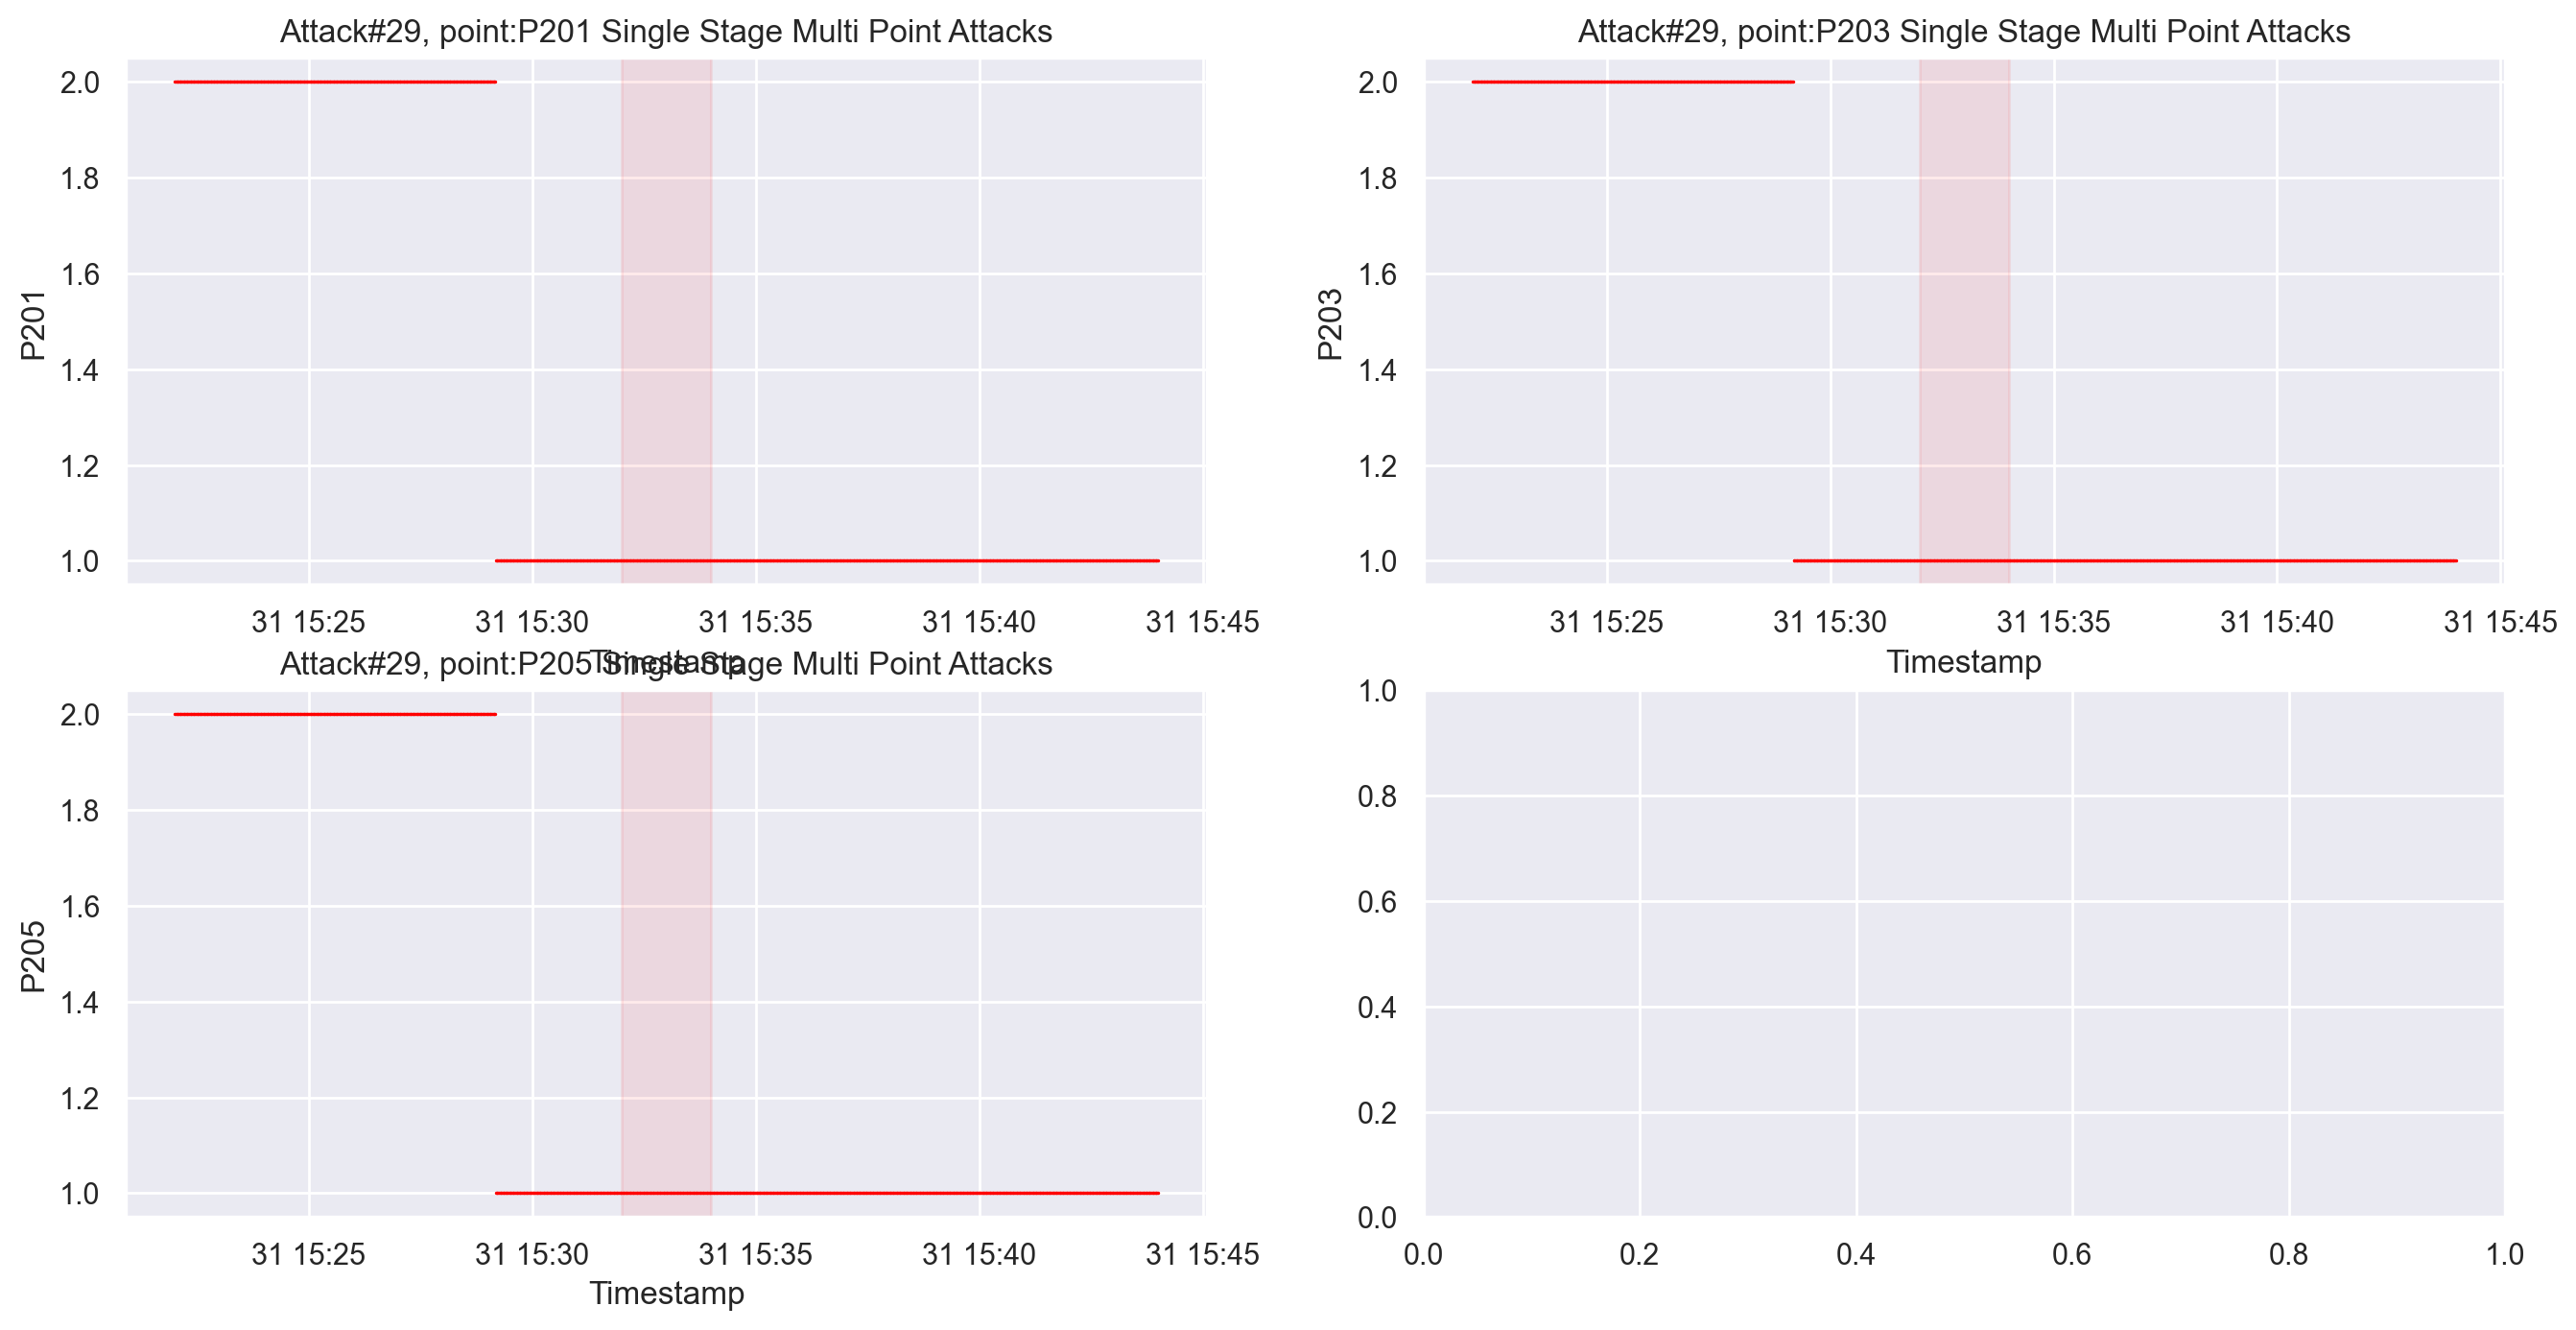

['LIT-101', 'P-101', 'MV-201', 'P-102', 'LIT-301']
2 3
Start State: P-101 is off; MV-101 is off; MV-201 is off; LIT-101 is between L and H;  LIT-301 is between L and H 
Attack: Turn P-101 on continuously; Turn MV-101 on continuously; Set value of LIT-101 as 700 mm; P-102 started itself because LIT301 level became low 
Expected Impact: Tank 101 underflow; Tank 301 overflow


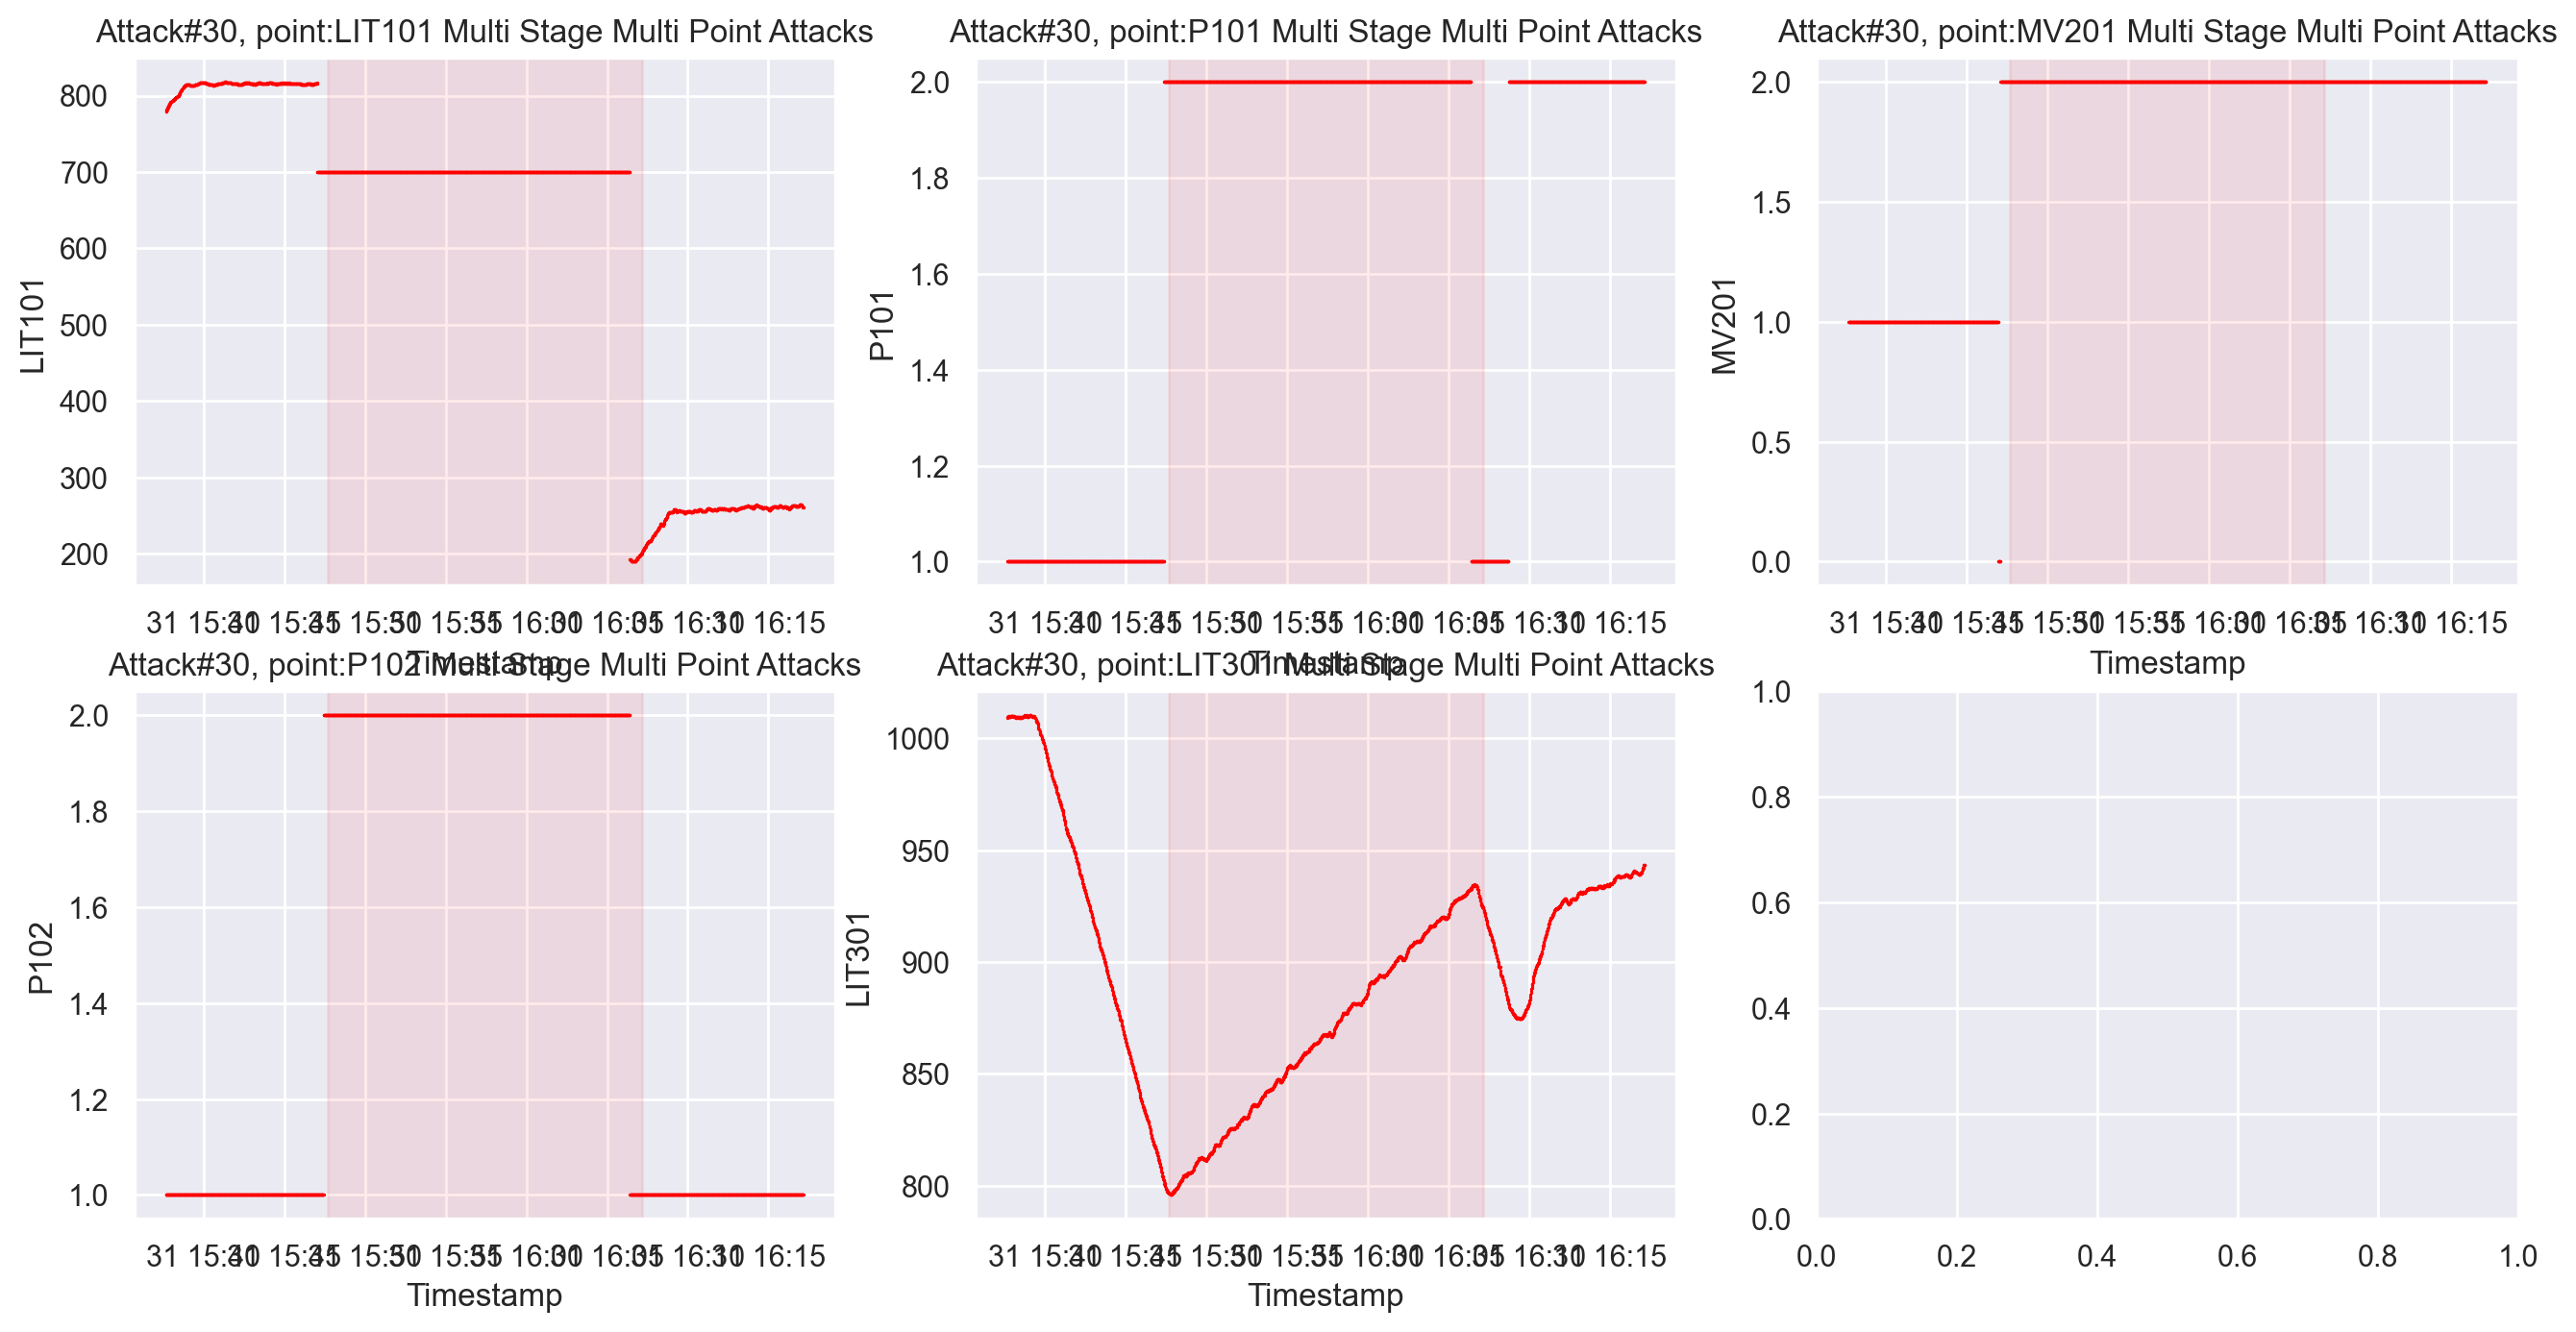

['LIT-401']
1 1
Start State: Water level between L and H 
Attack: Set LIT-401 to less than L 
Expected Impact: Tank overflow


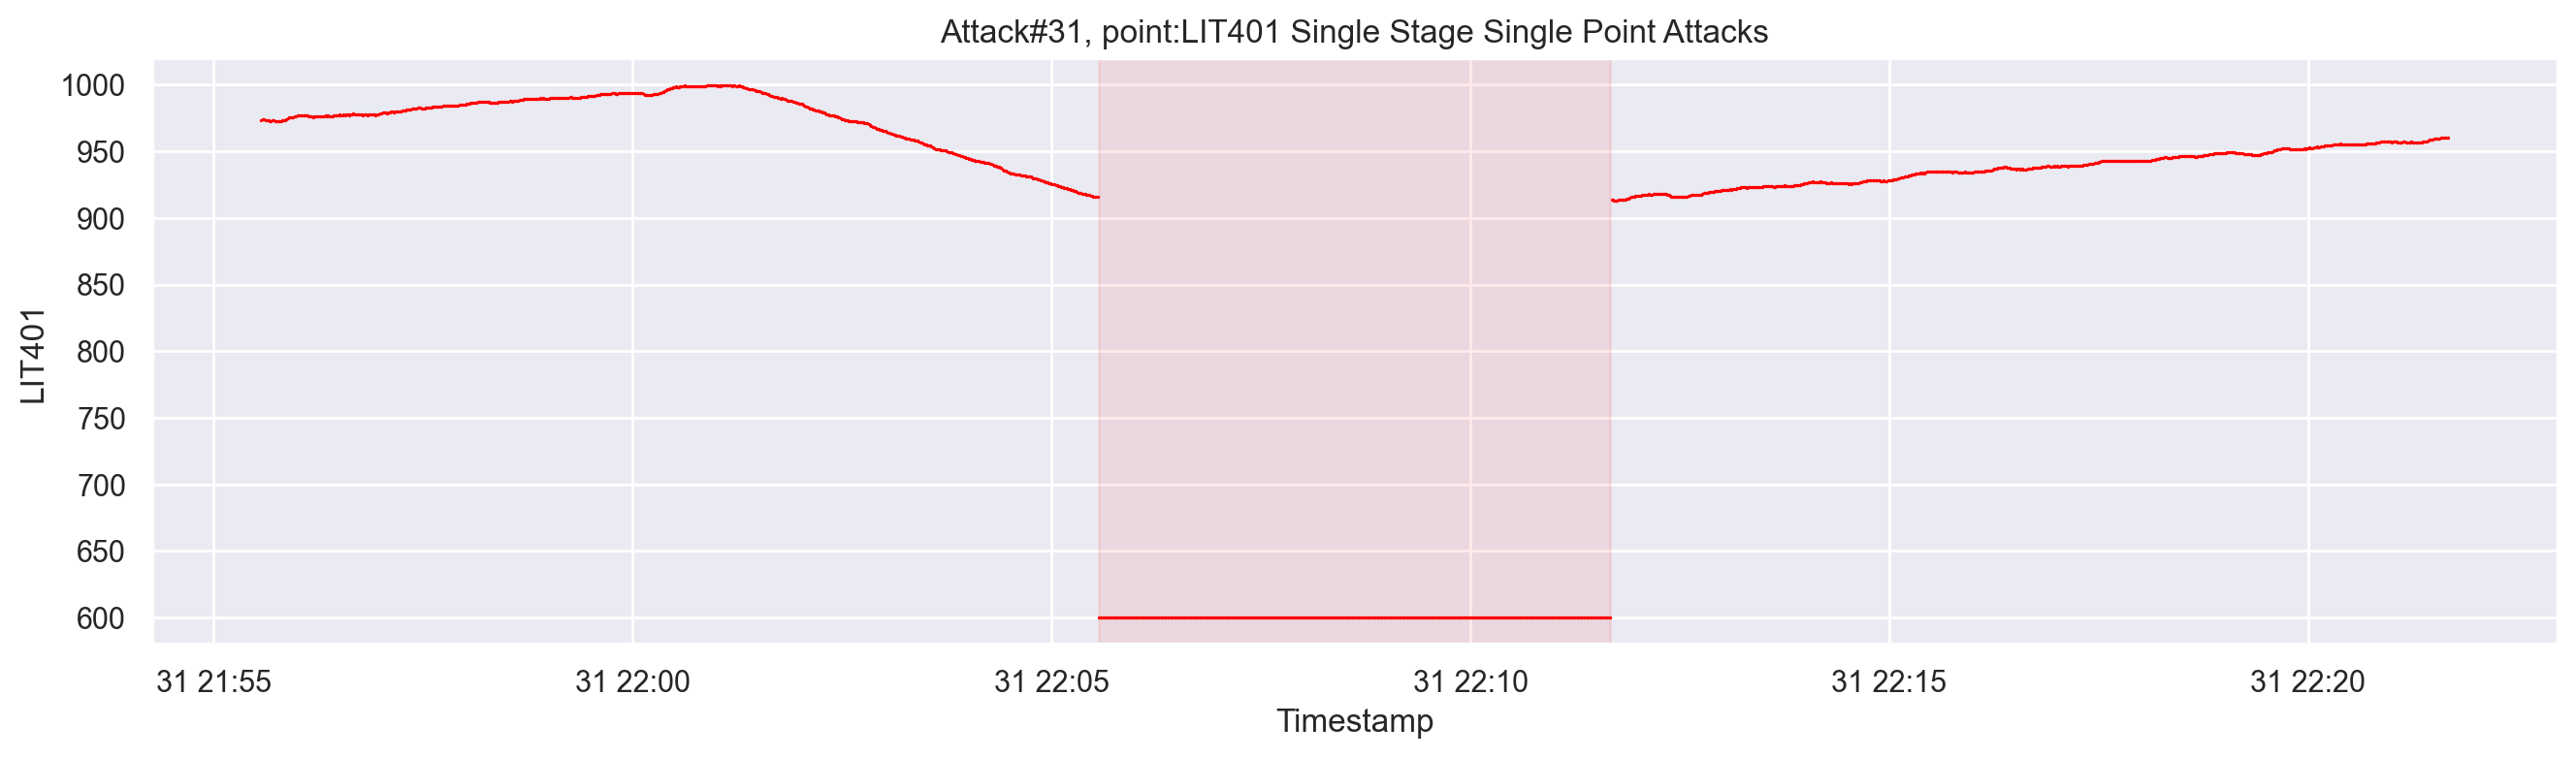

['LIT-301', 'P-302']
1 2
Start State: Water level between L and H 
Attack: Set LIT-301 to above HH 
Expected Impact: Tank underflow; Damage P-302


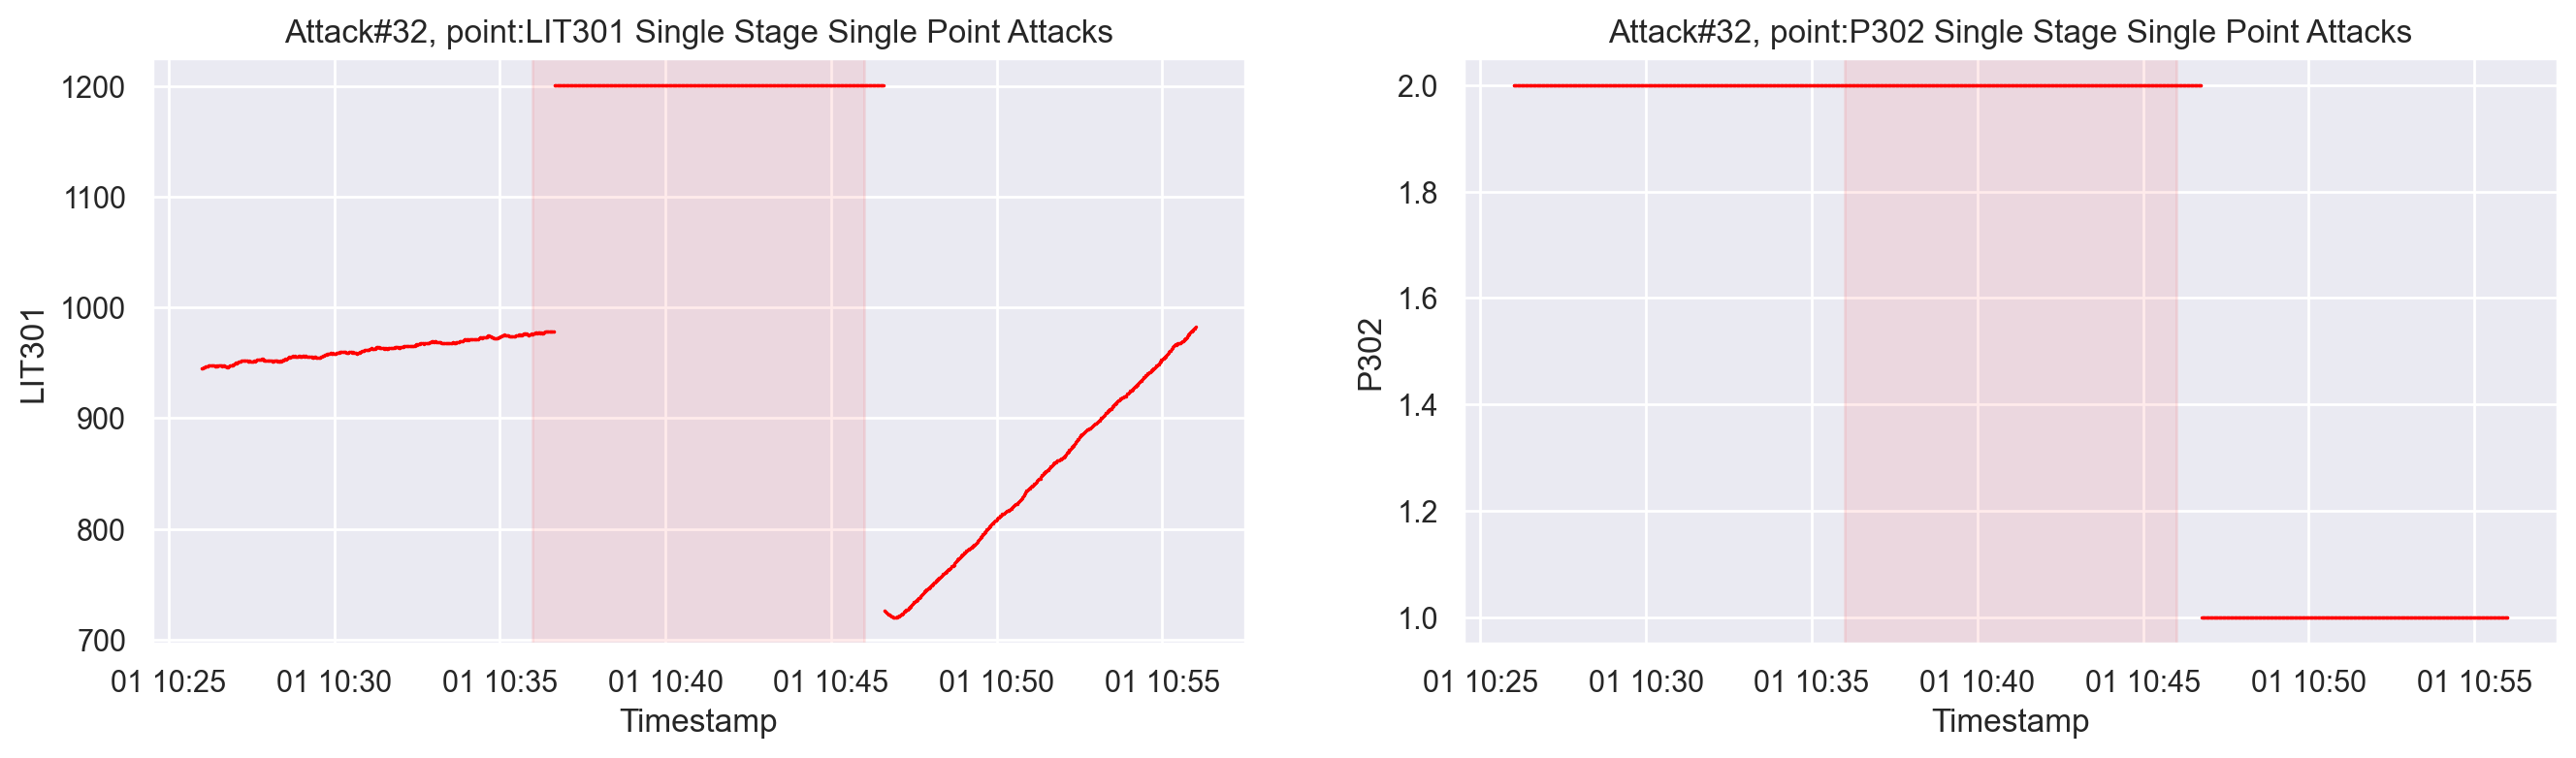

['LIT-101', 'P-101']
1 2
Start State: Water level between L and H 
Attack: Set LIT-101 to above H 
Expected Impact: Tank underflow; Damage P-101


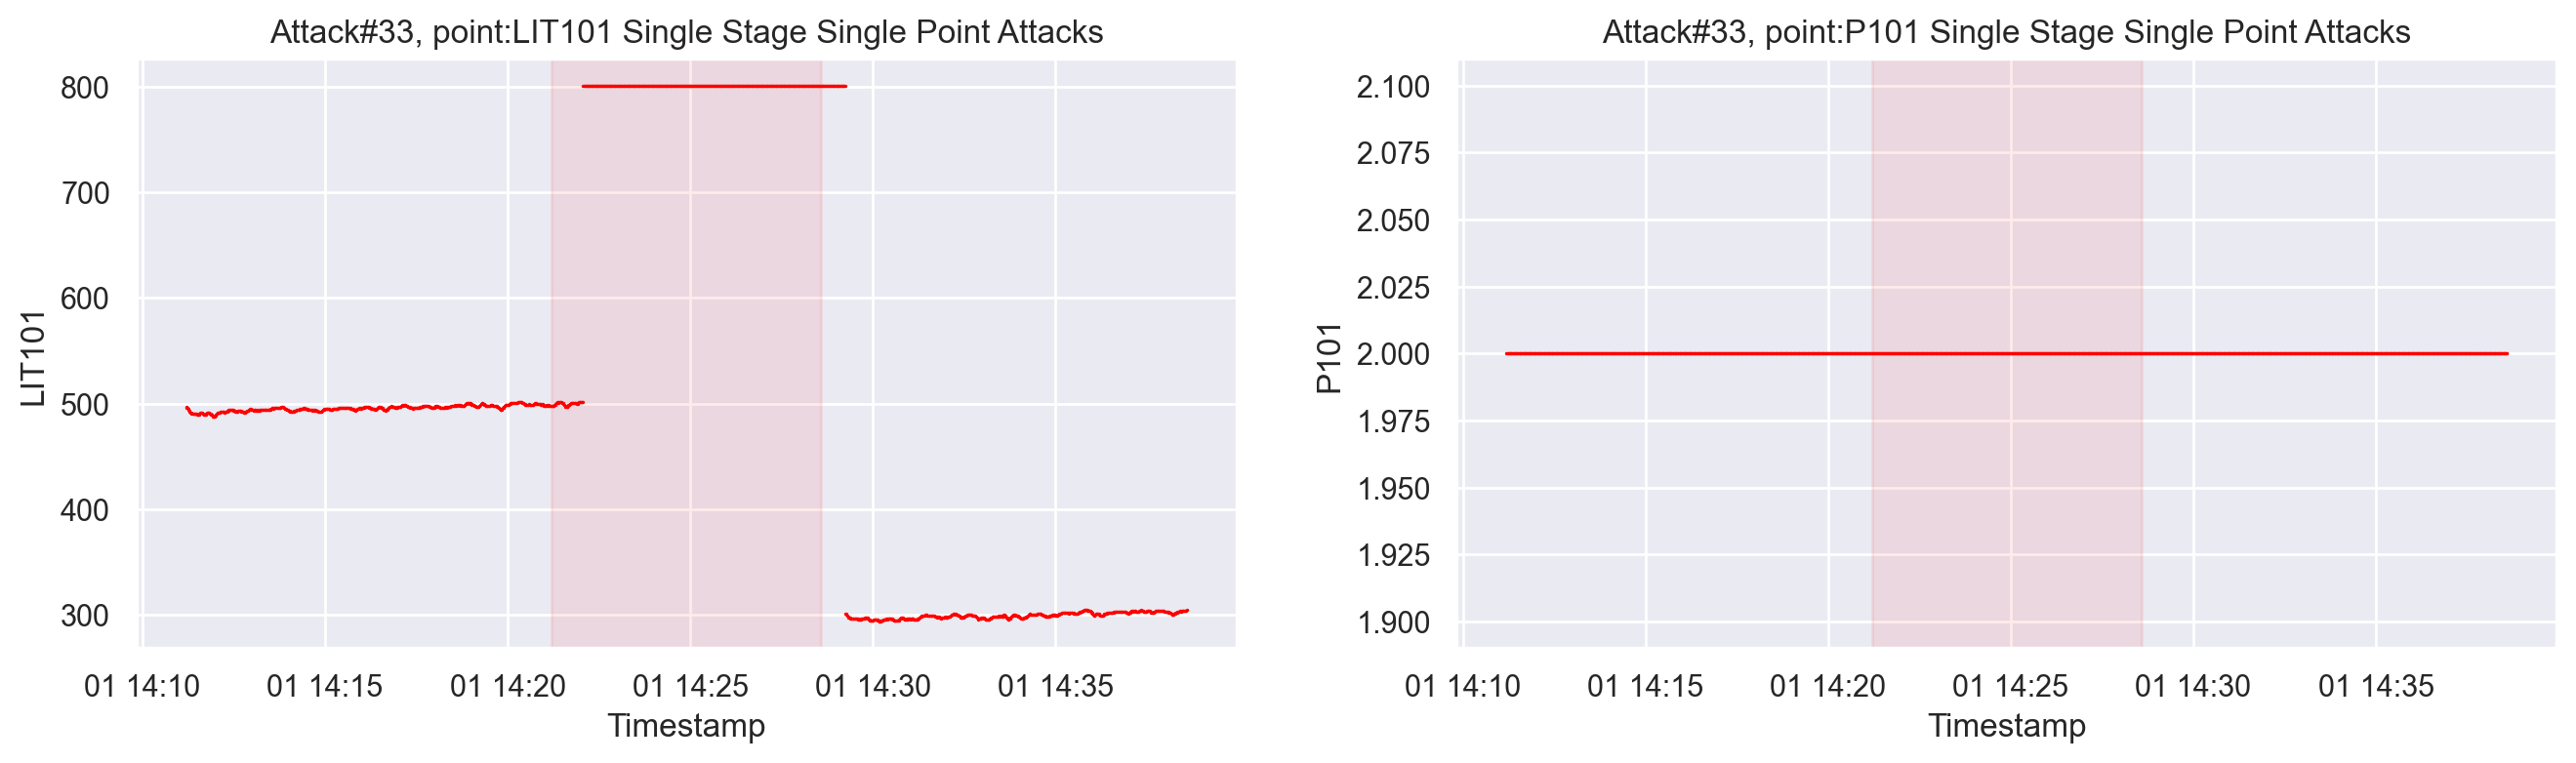

['P-101', 'P-102', 'FIT-101']
2 2
Start State: P-101 is on 
Attack: Turn P-101 off 
Expected Impact: Stops outflow
Unexpected Outcome: Outflow did not stop because the system turned on P-102


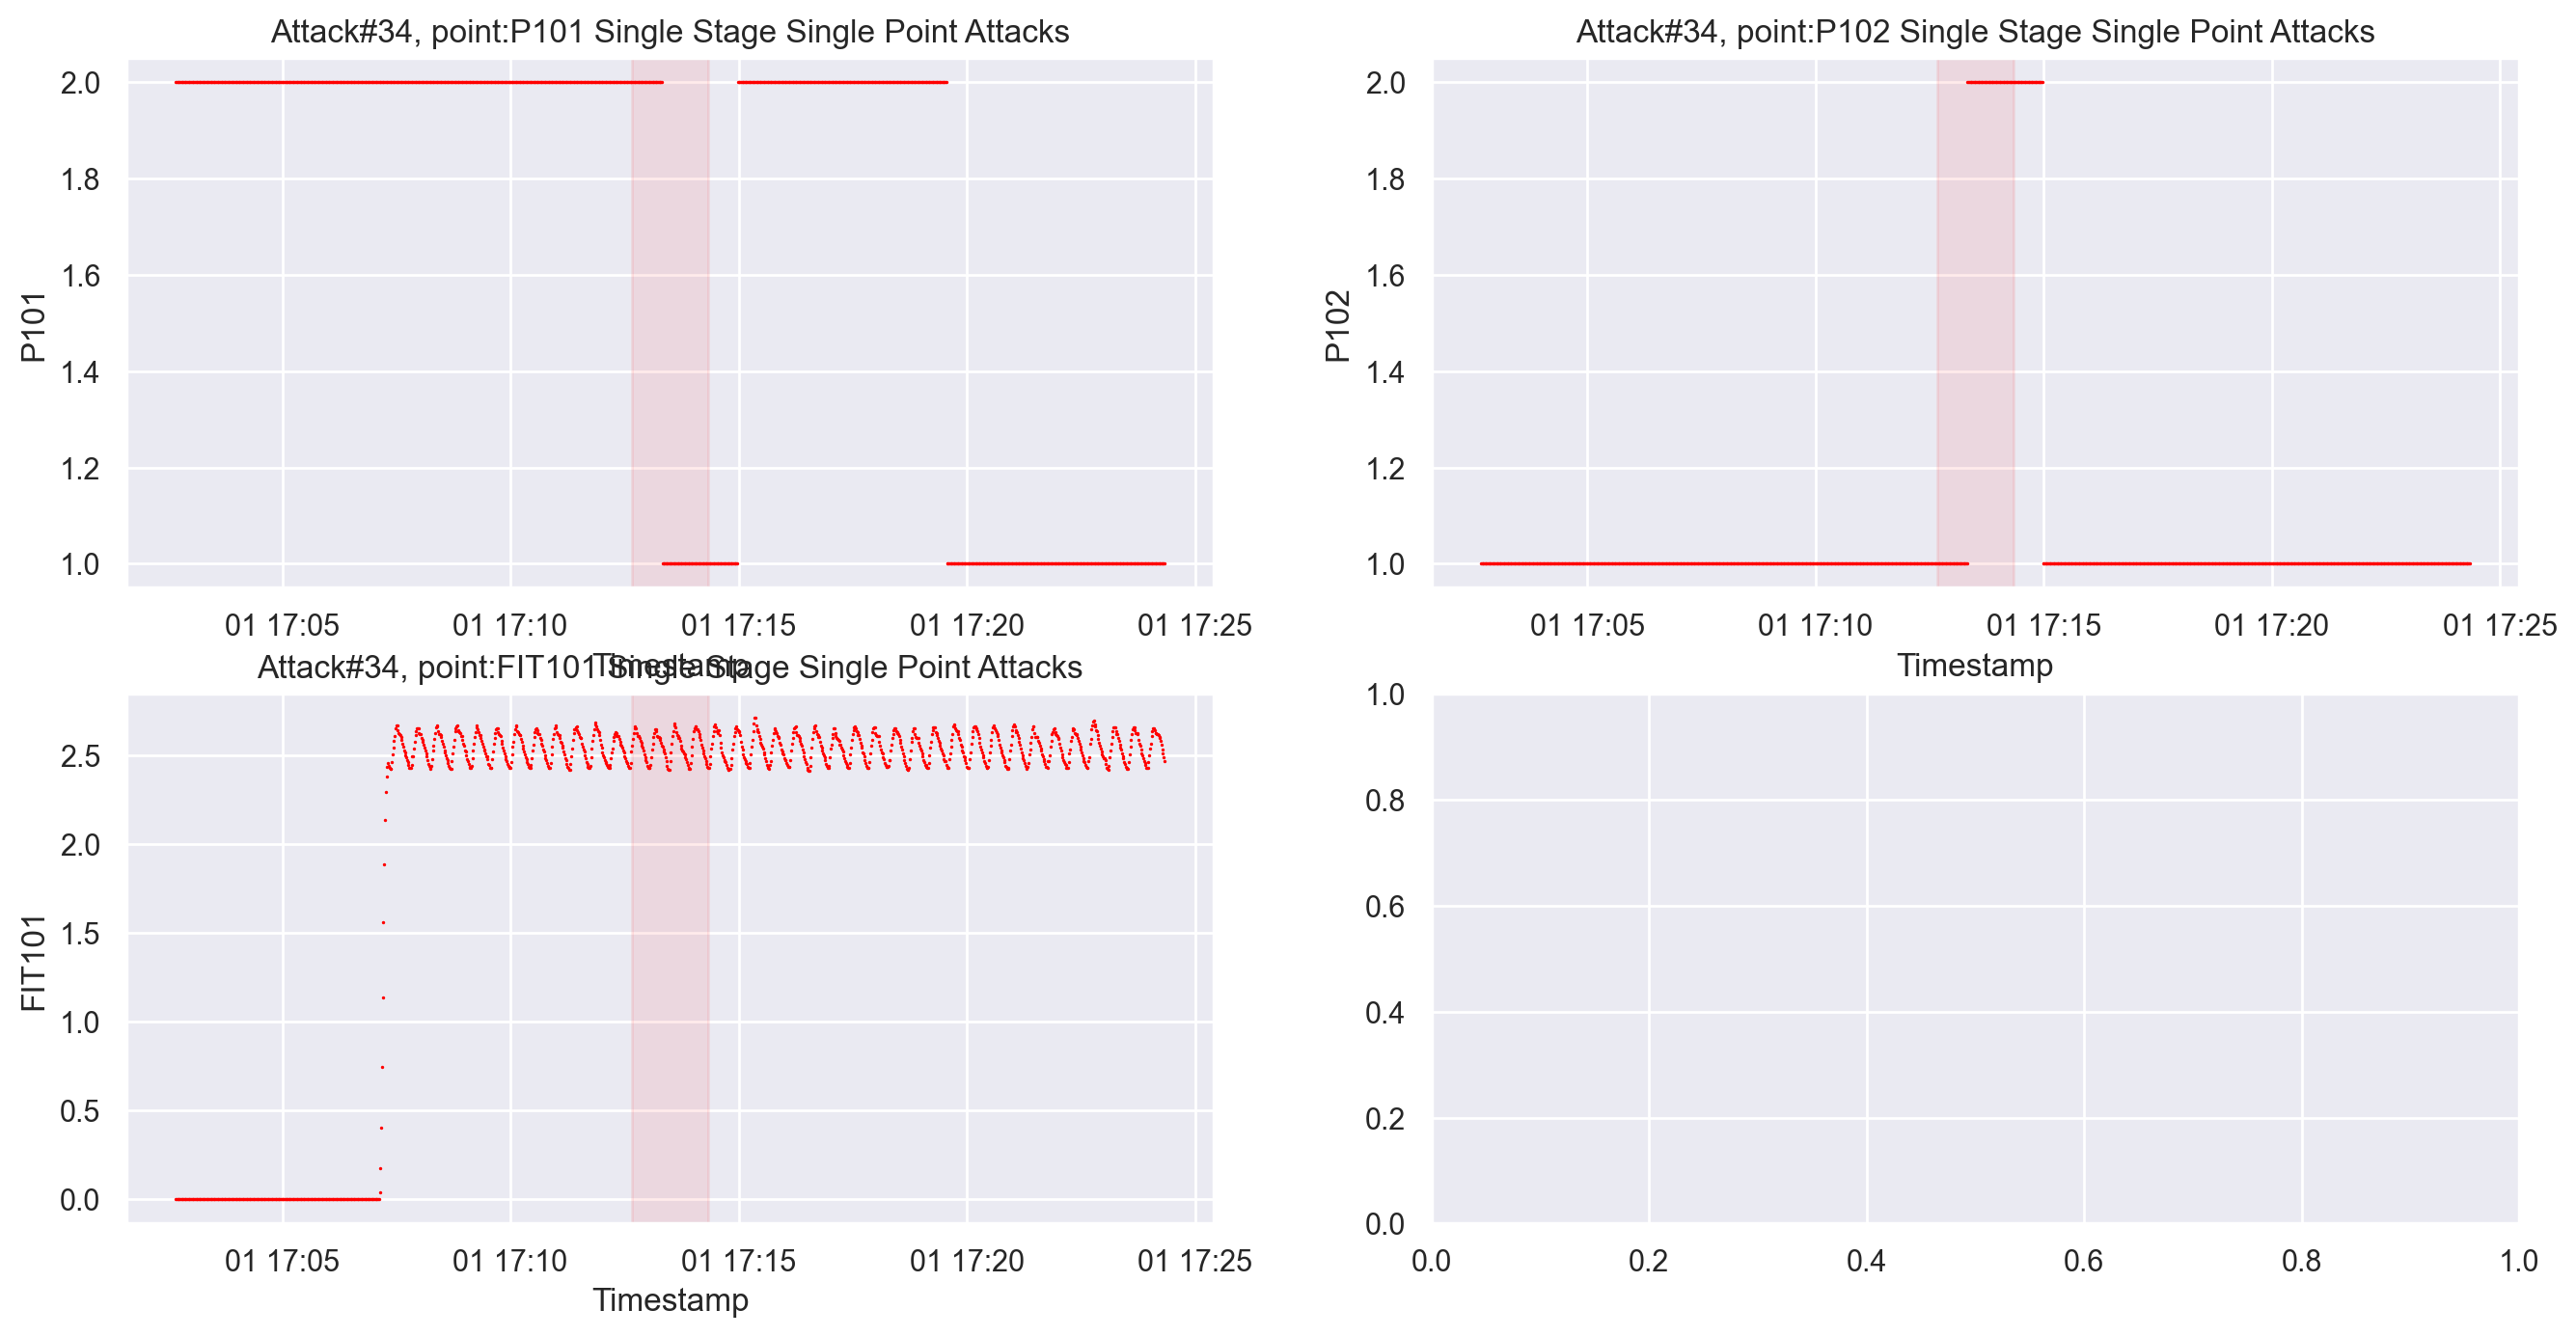

['P-101', 'P-102', 'FIT-101']
2 2
Start State: P-101 is on; P-102 is off 
Attack: Turn P-101 off; Keep P-102 off 
Expected Impact: Stops outflow


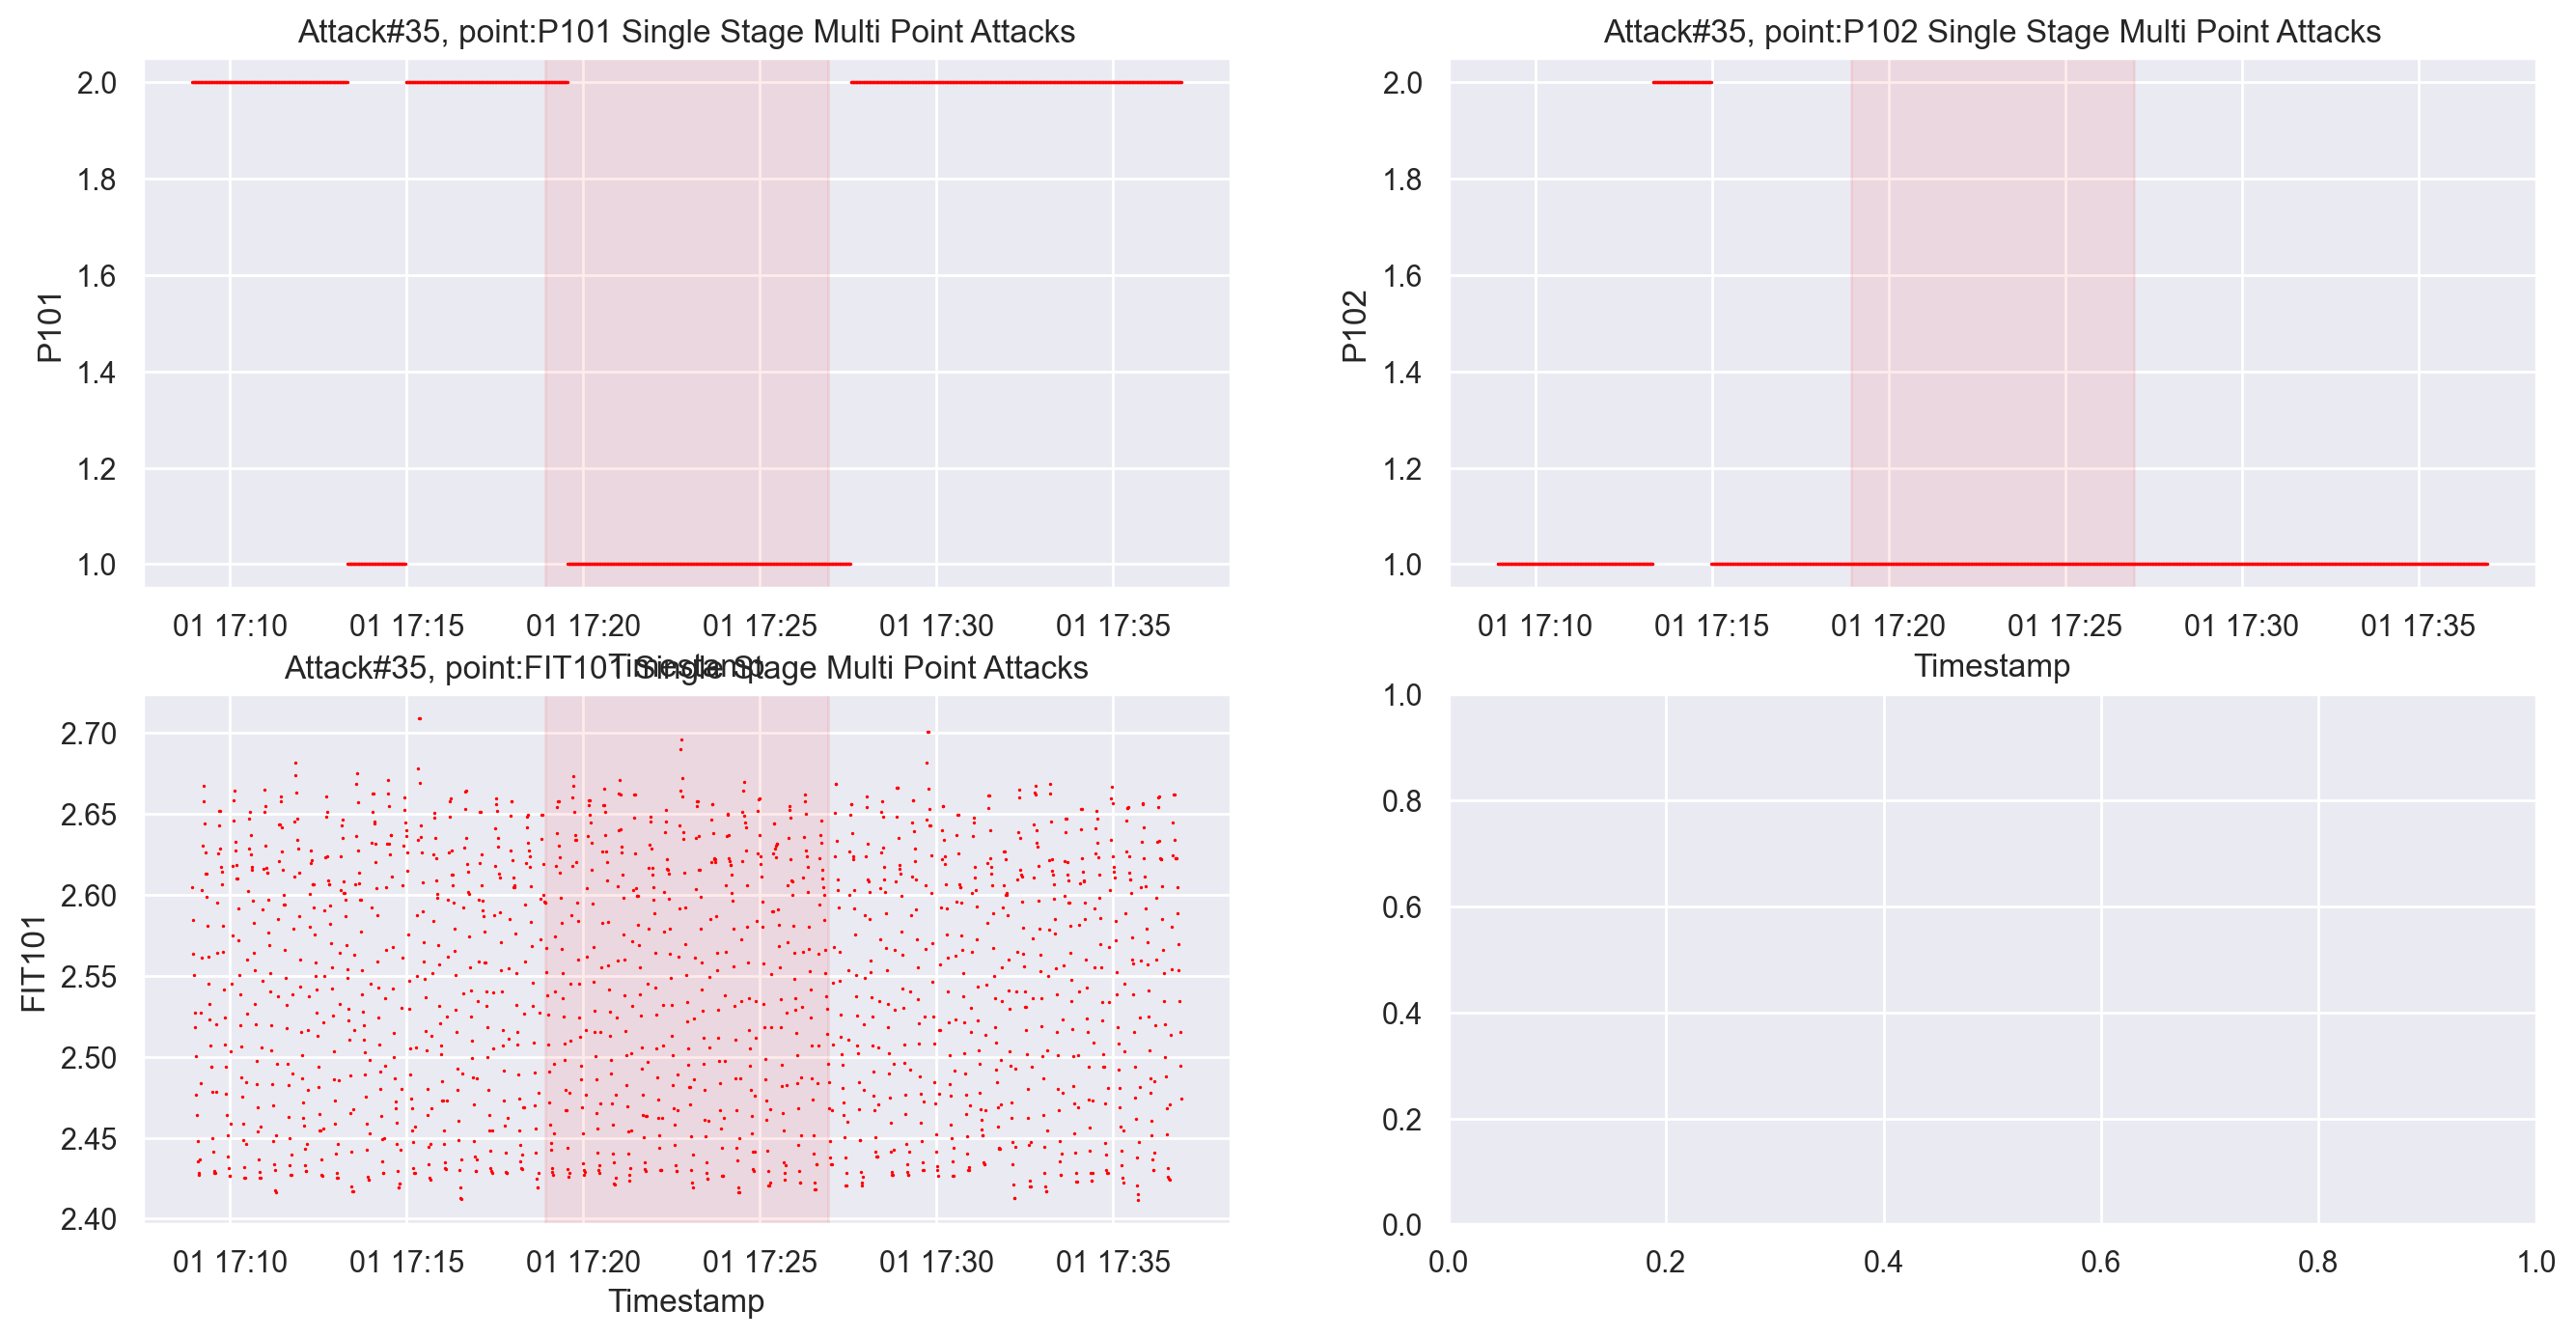

['LIT-101', 'FIT-101', 'P-101']
2 2
Start State: Water level between L and H 
Attack: Set LIT-101 to less than L 
Expected Impact: Tank overflow


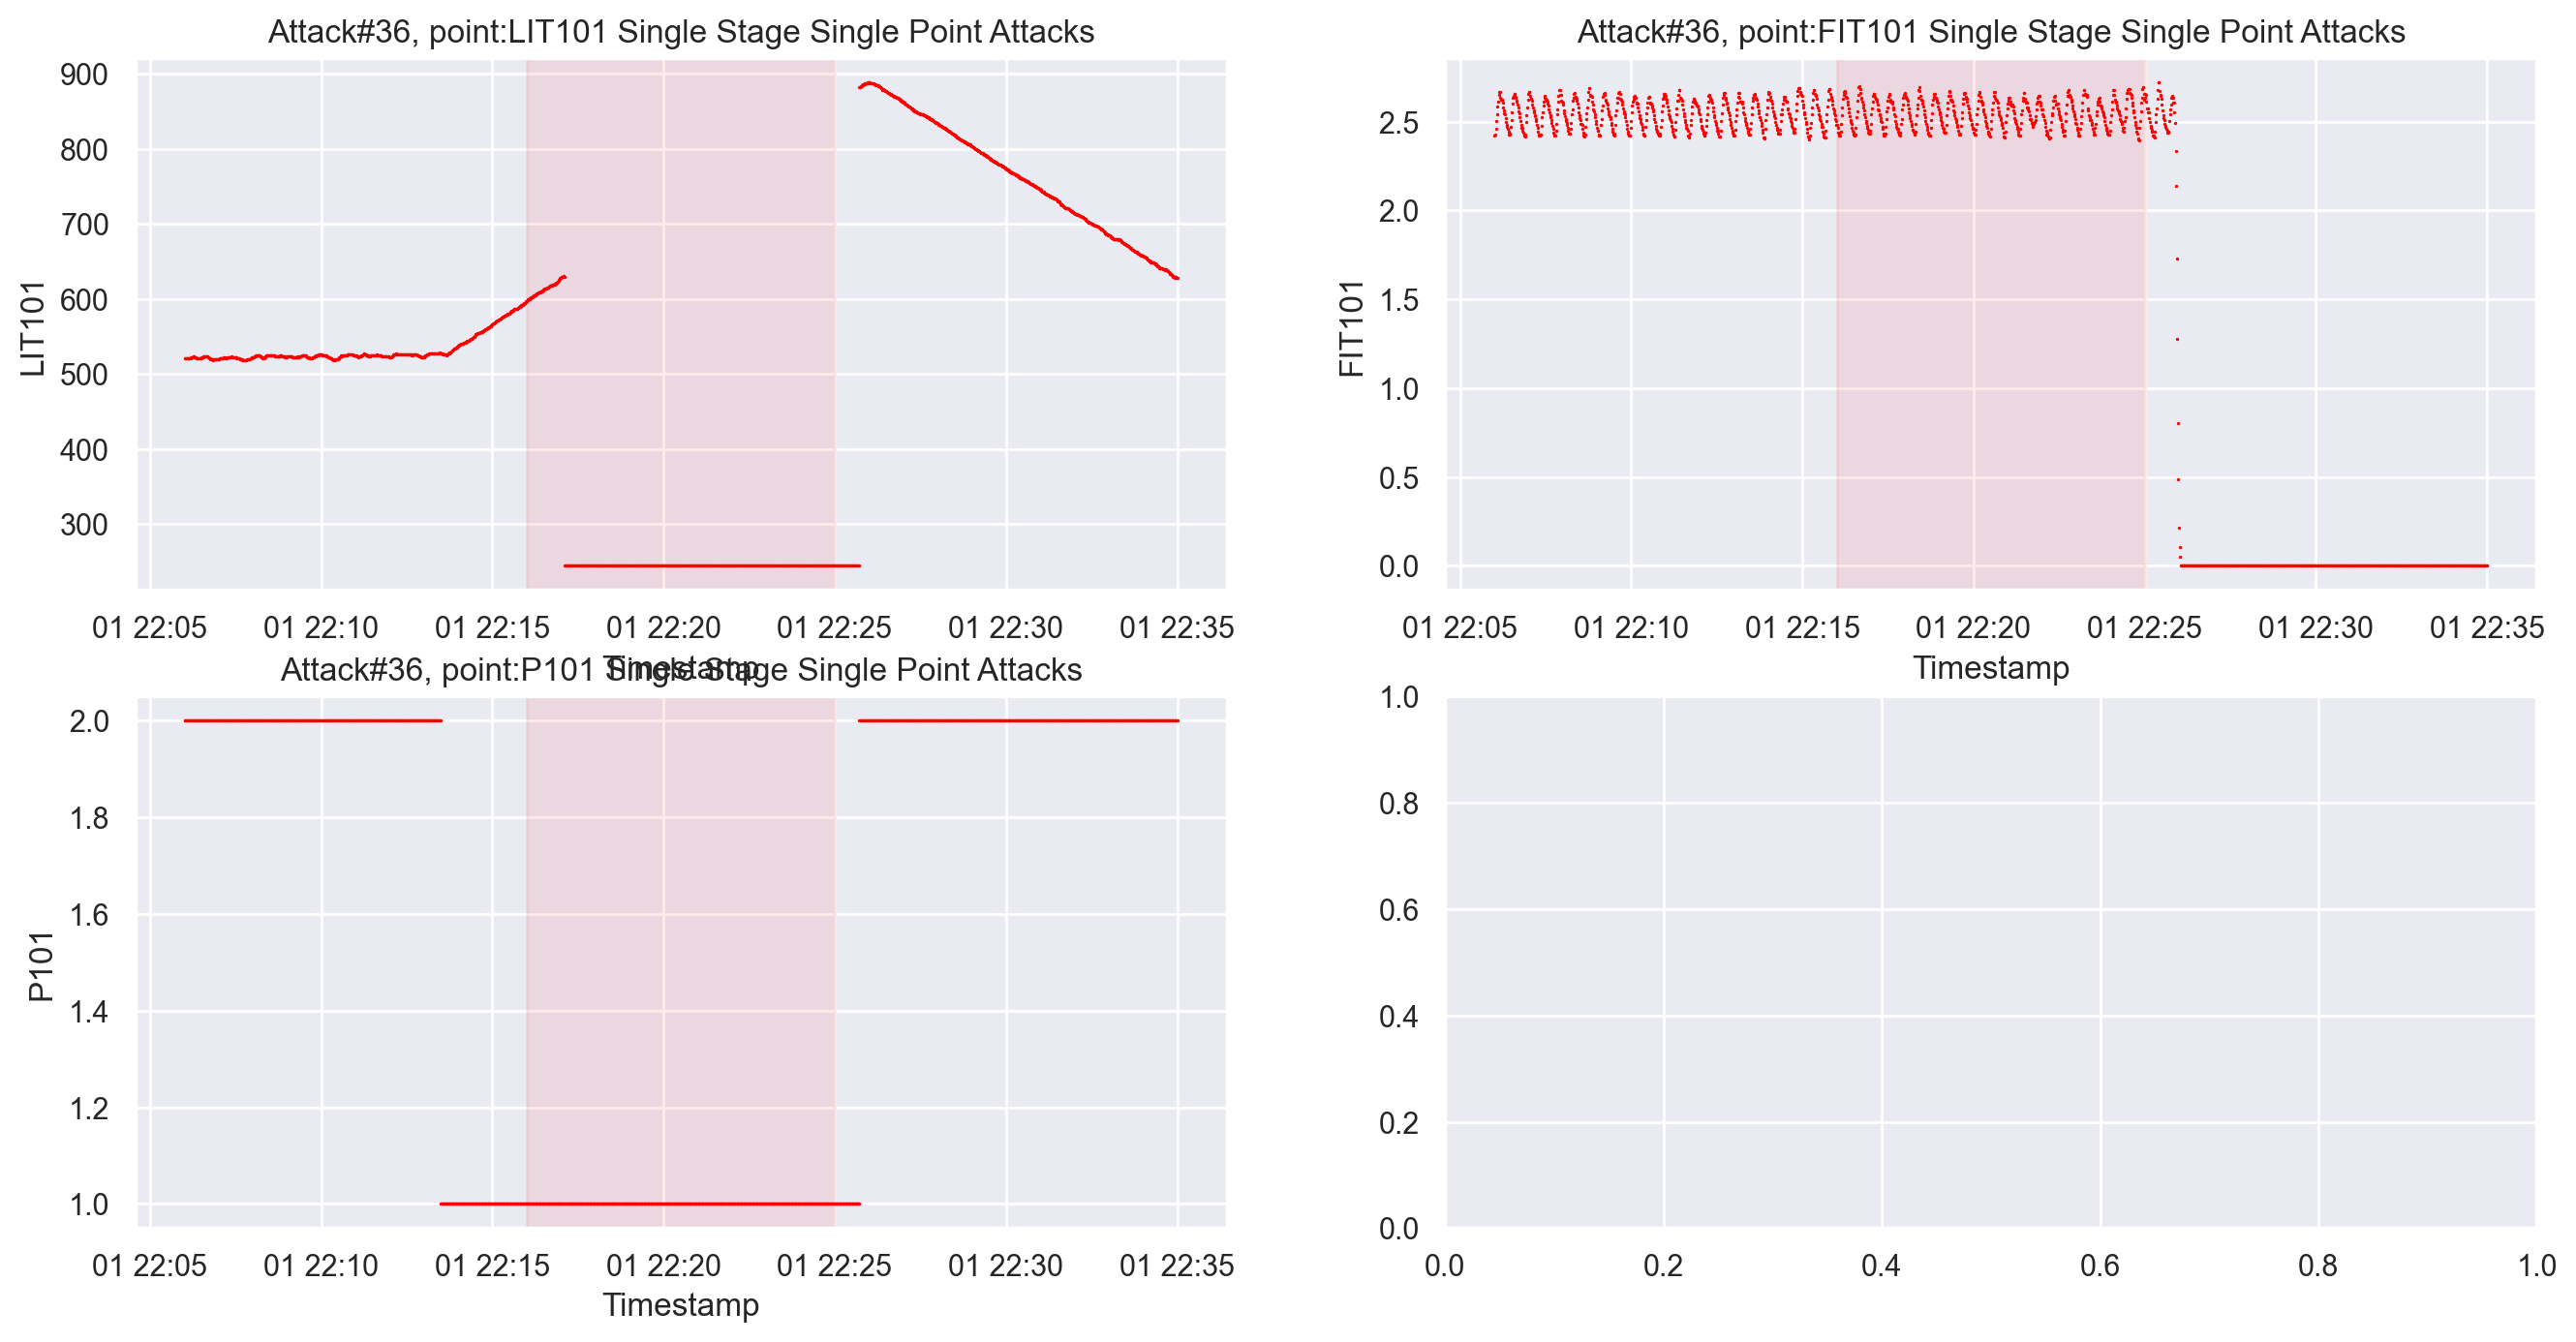

['P-501', 'FIT-502']
1 2
Start State: P-501 is on; FIT-502 in normal range 
Attack: Close P-501; Set value of FIT-502 to 1.29  at 11:18:36 
Expected Impact: Reduced output
Unexpected Outcome: P-501 did not turn off; FIT-502 decreased to 0.8; Speed of P-501 increased to 28.50 Hz from 10 Hz during attack.


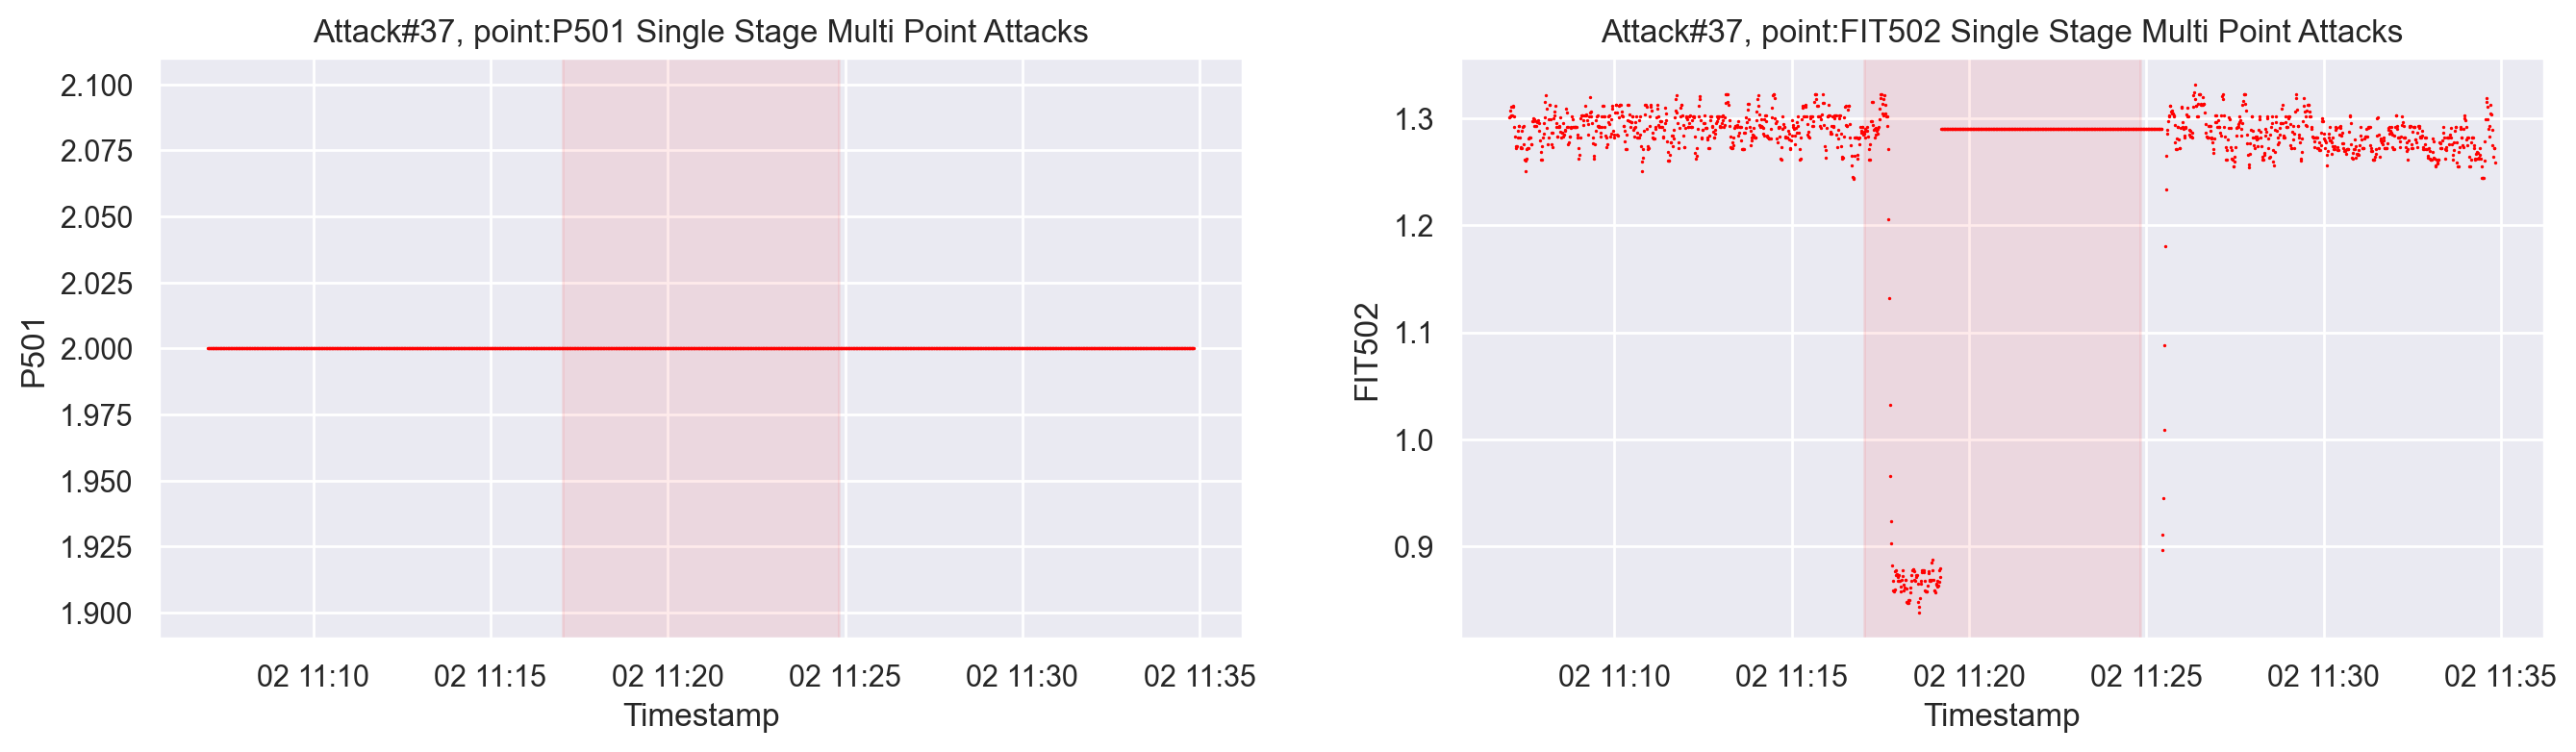

['AIT-402', 'AIT-502']
1 2
Start State: In Normal Range 
Attack: Set value of AIT402 as 260; Set value of AIT502 to 260 
Expected Impact: Water goes to drain because of overdosing
Unexpected Outcome: Water did not go to the drain


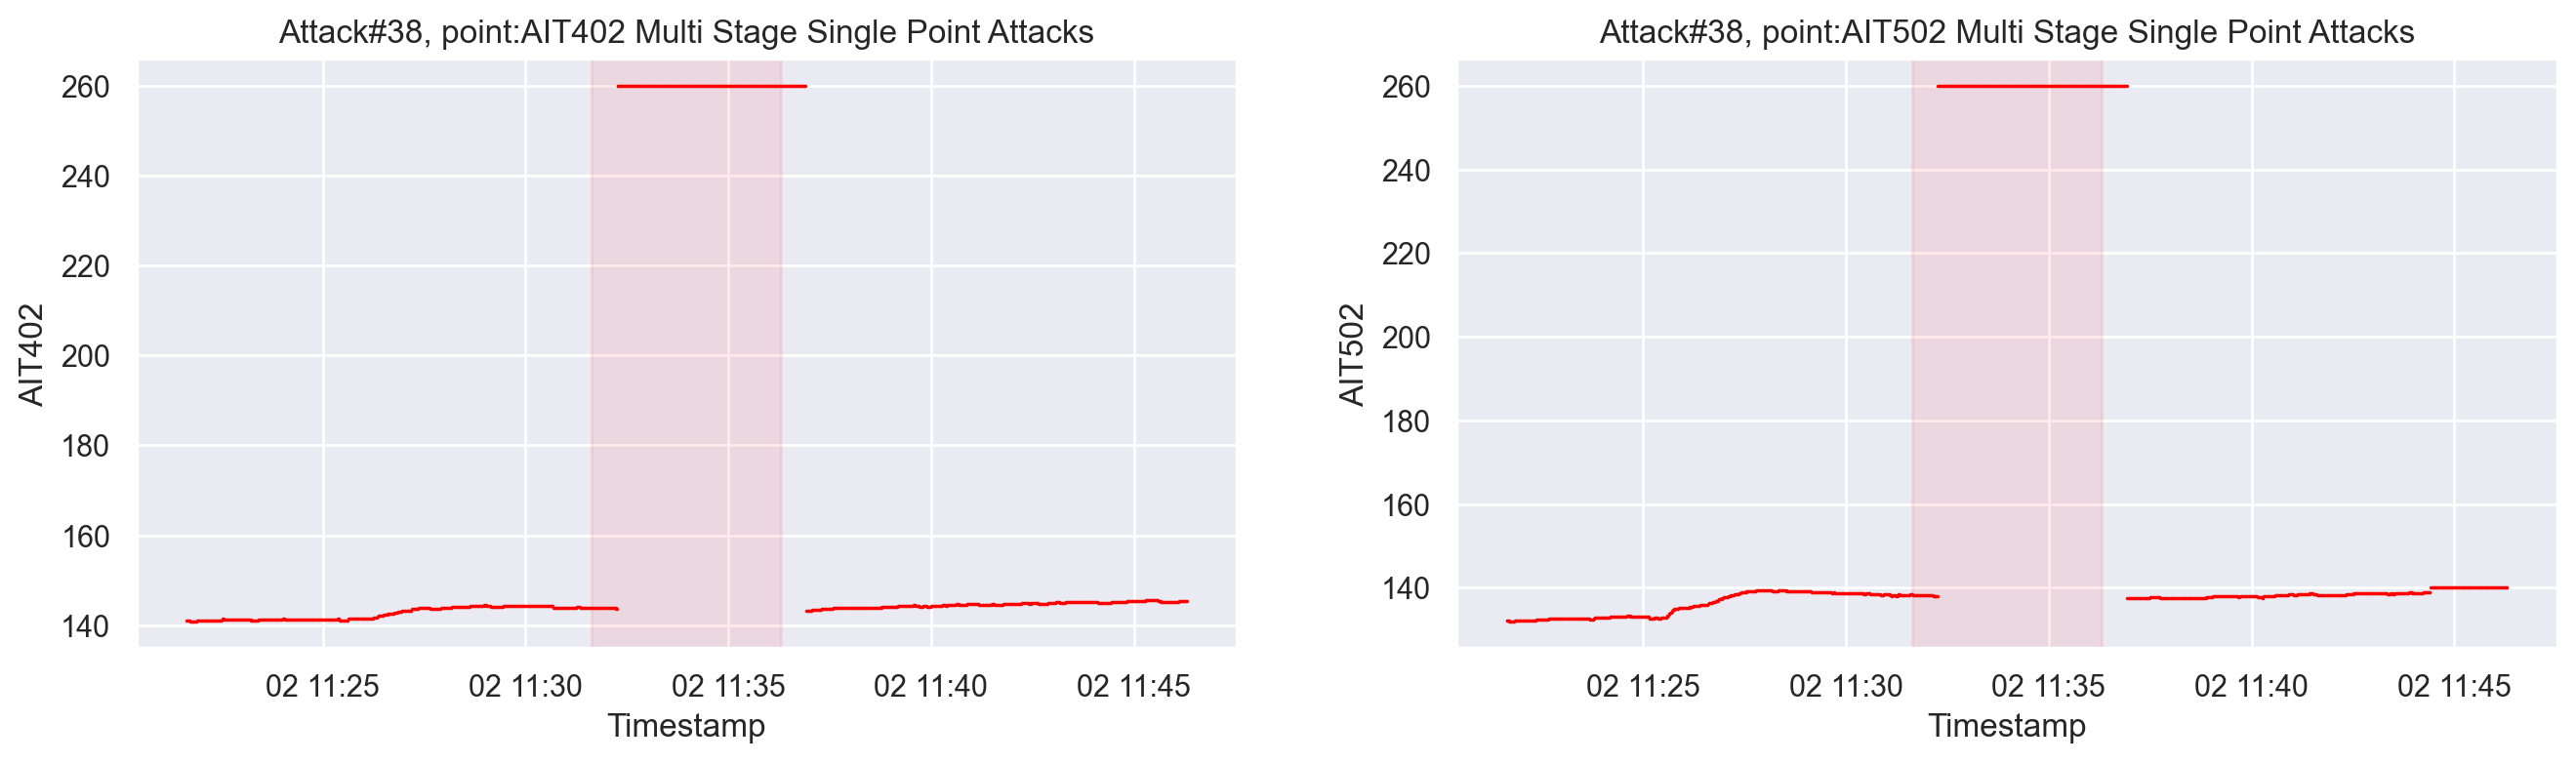

['FIT-401', 'AIT-502']
1 2
Start State: In Normal Range 
Attack: Set value of FIT-401 as 0.5; Set value of AIT-502 as 140 mV 
Expected Impact: UV will shut down and water will go to RO
Unexpected Outcome: UV did not shutdown


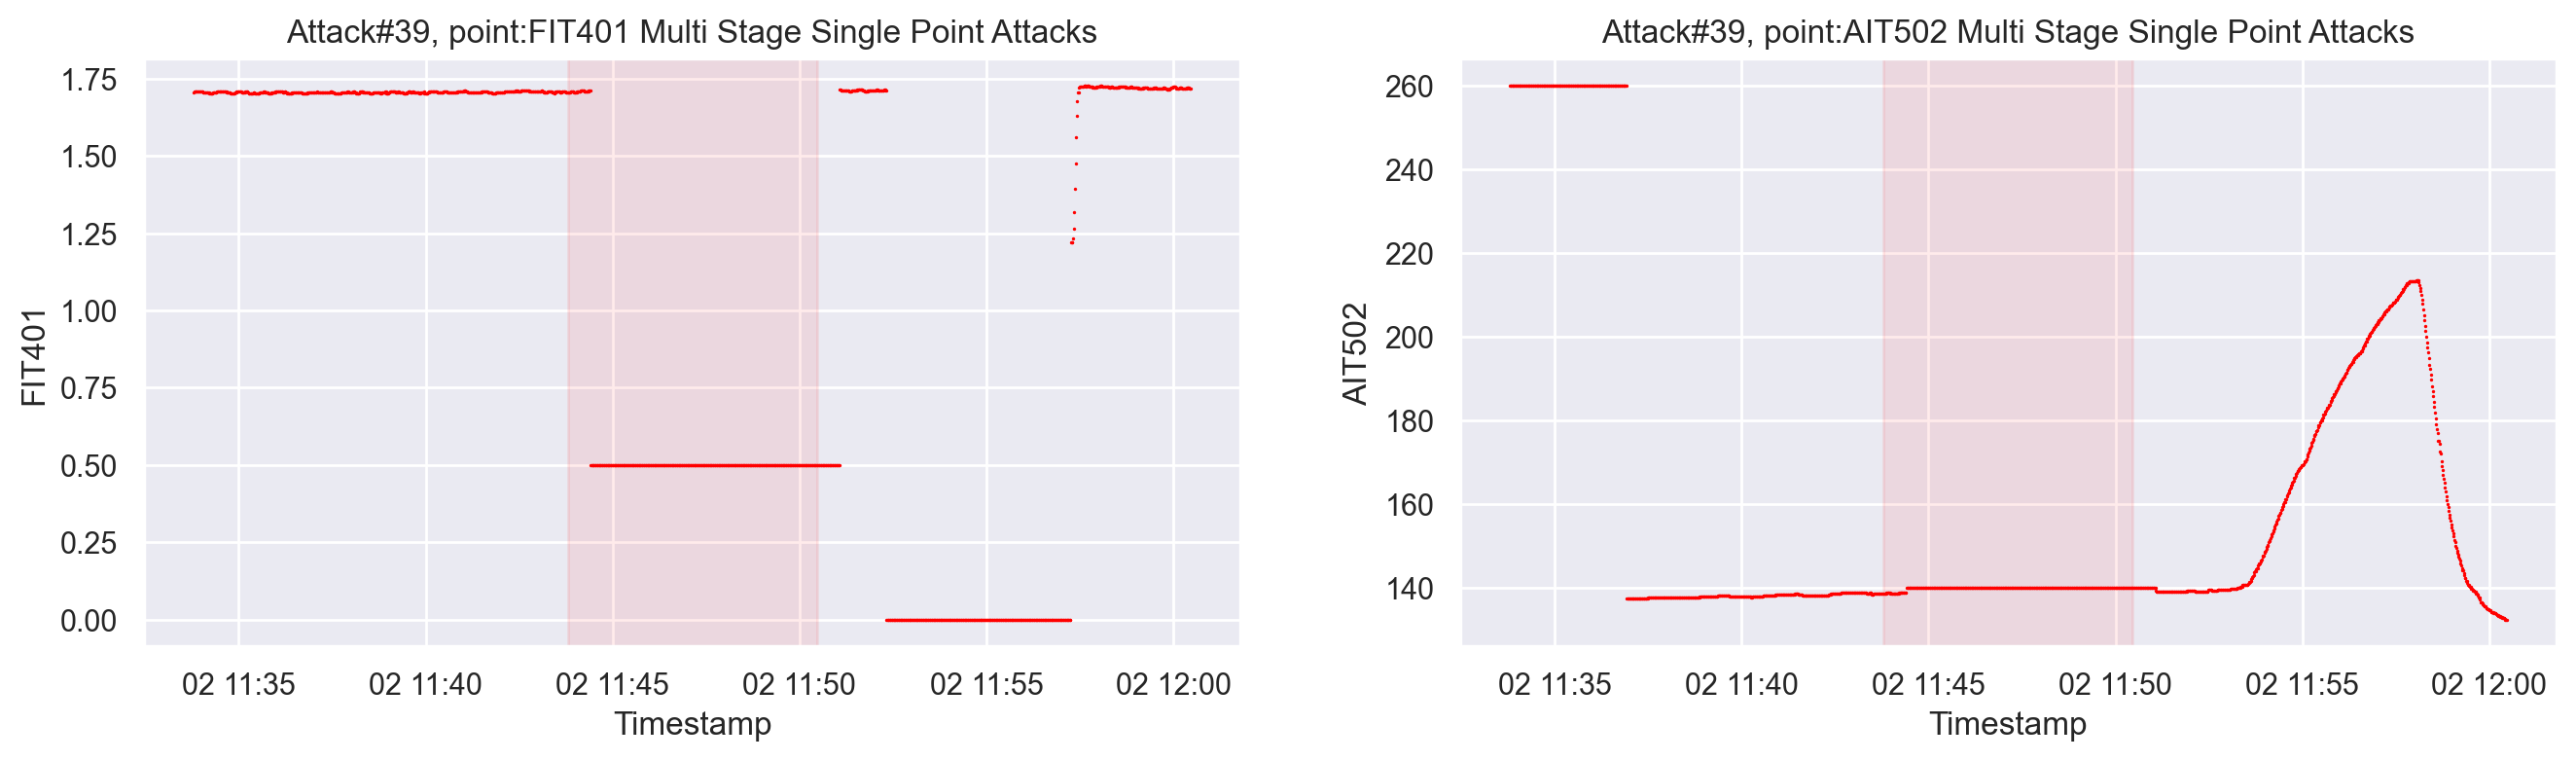

['FIT-401', 'UV-401']
1 2
Start State: In Normal Range 
Attack: Set value of FIT-401 as 0 
Expected Impact: UV will shut down and water will go to RO
Unexpected Outcome: P-402 did not close, both should be interlinked


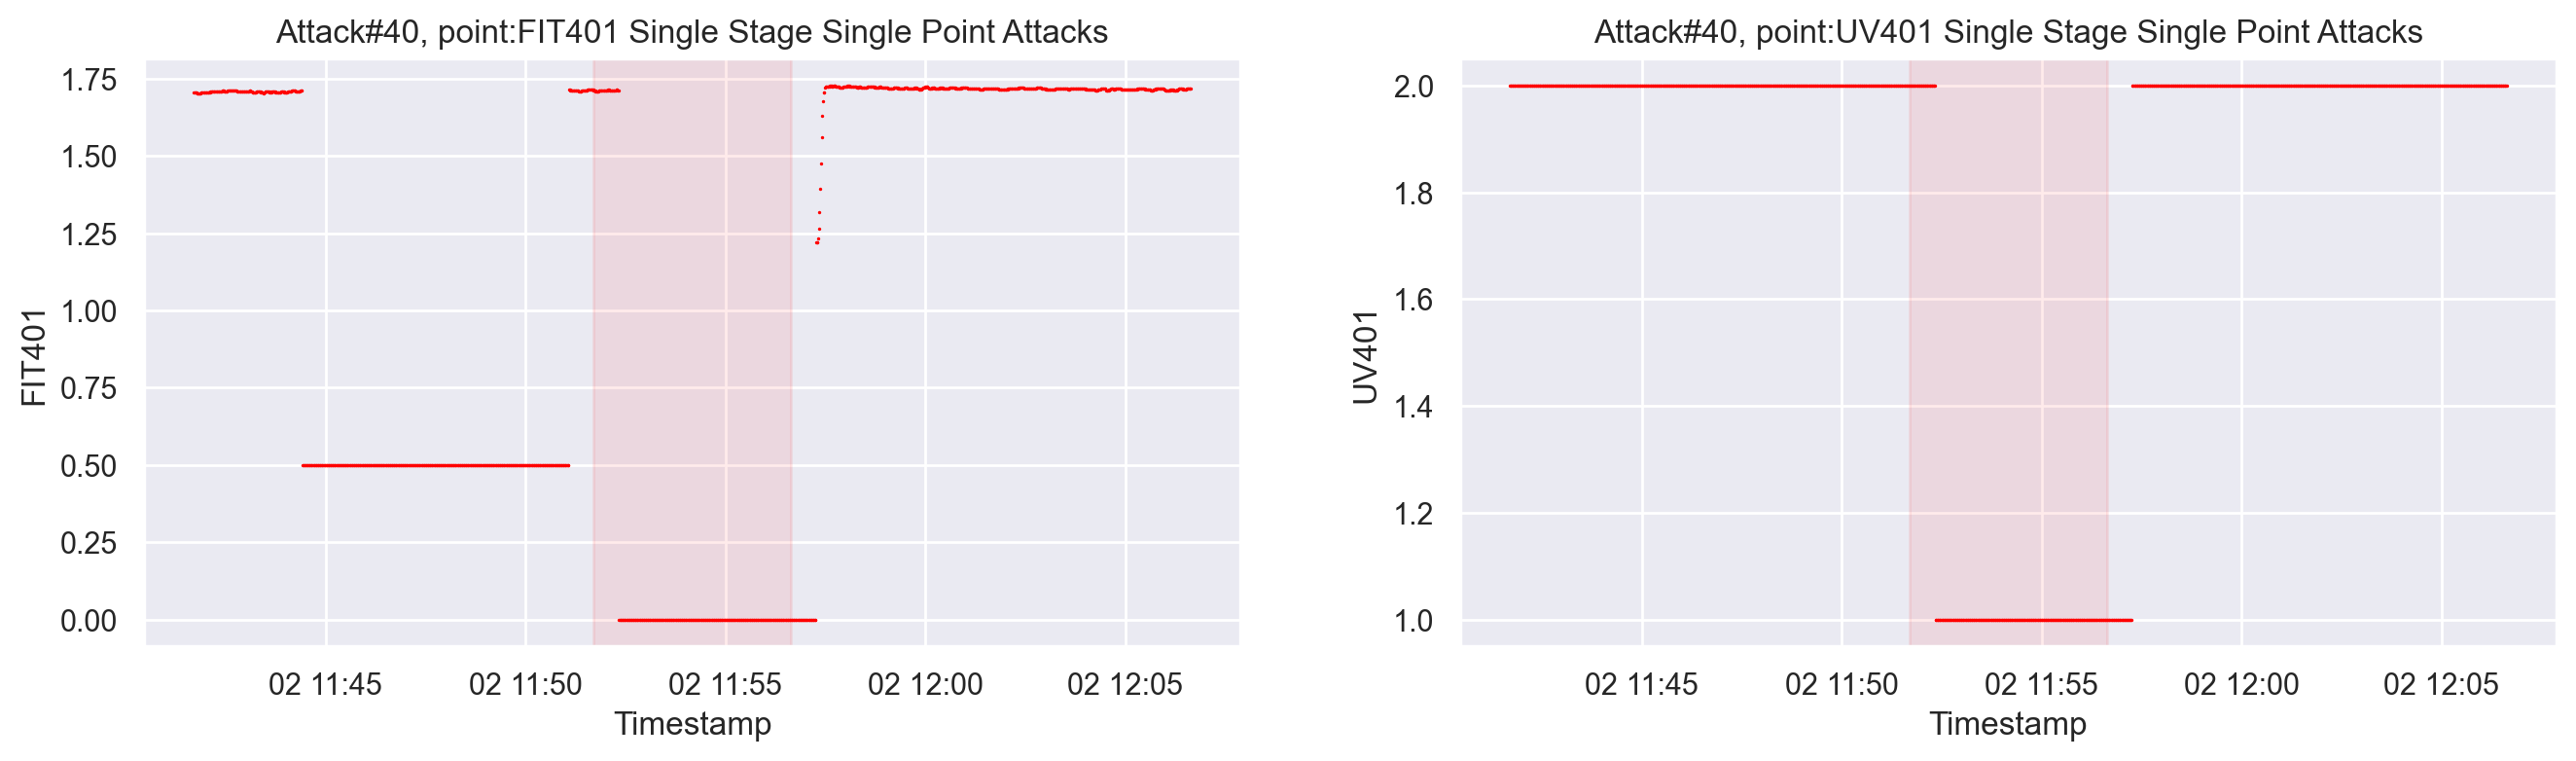

['LIT-301', 'FIT-301']
1 2
Start State: Water level between L and H 
Attack: decrease value by 0.5 mm per second 
Expected Impact: Tank overflow
Unexpected Outcome: Rate of decrease in water level reduced after 1:33:25 PM


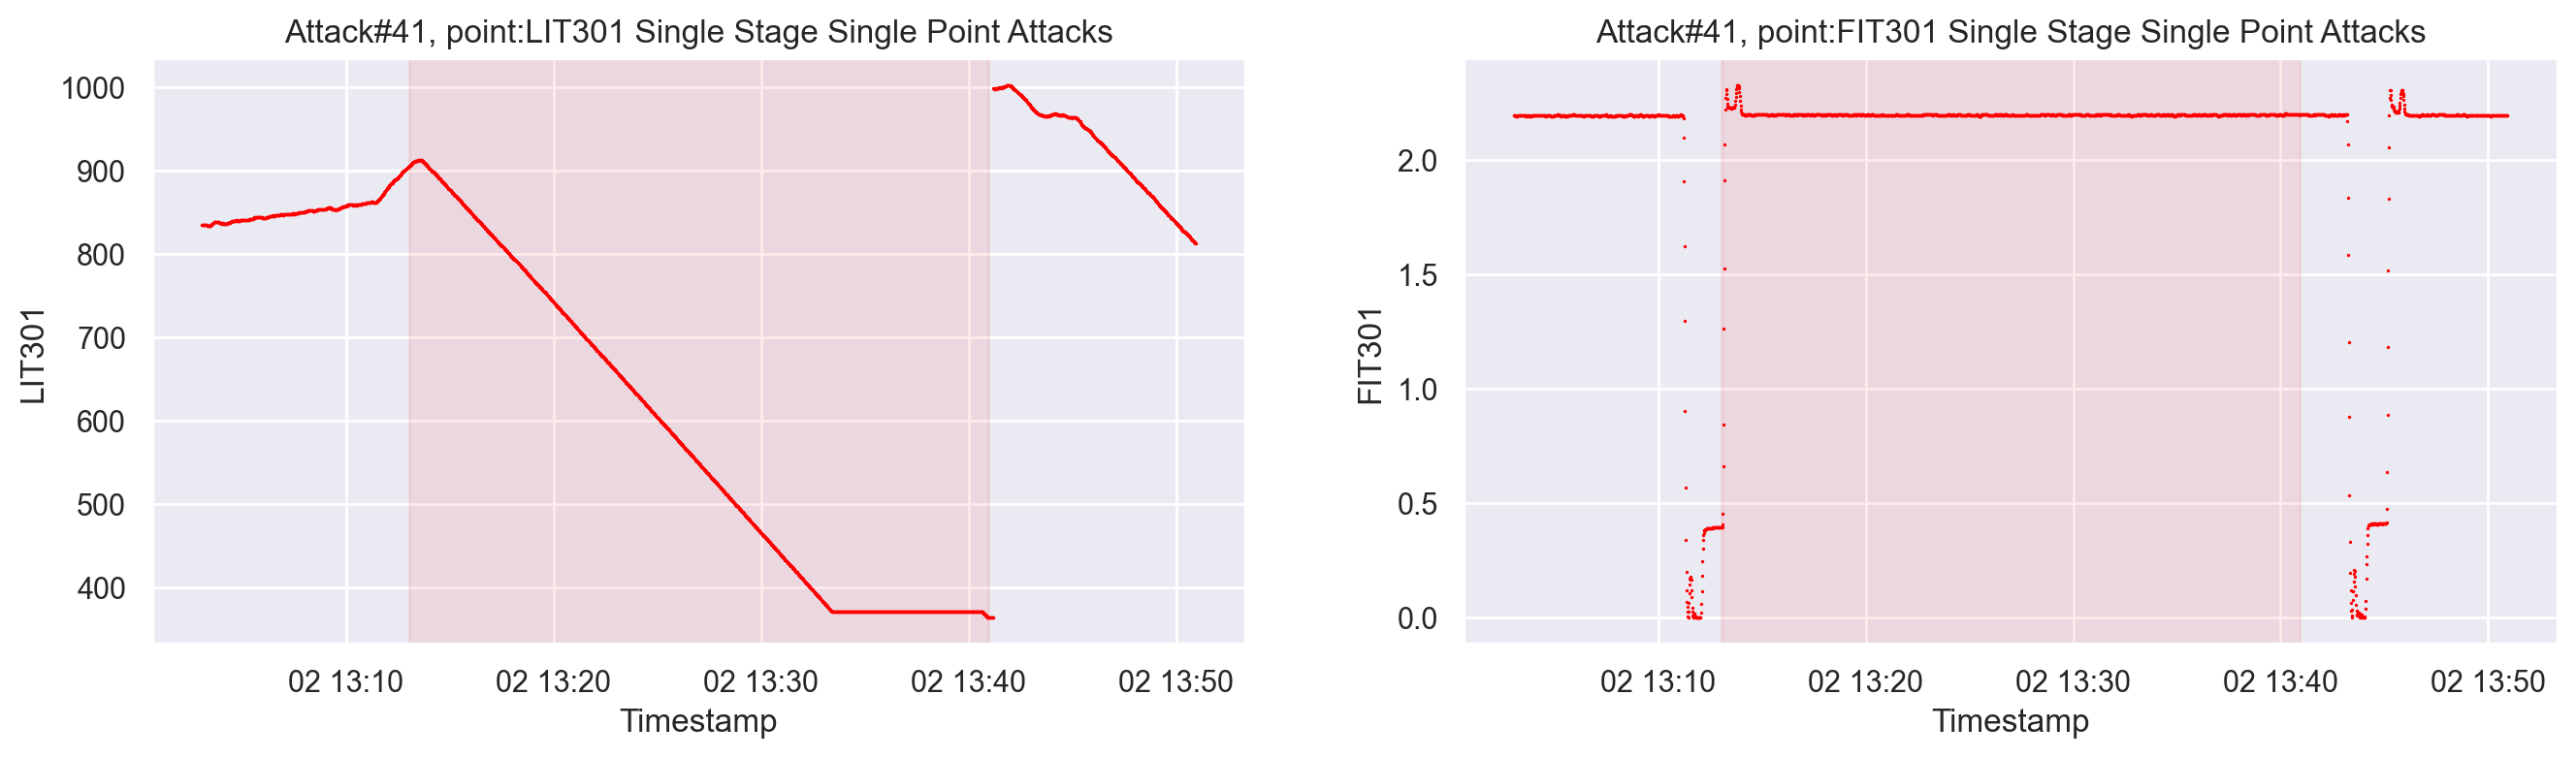

In [15]:

for i in range(len(attacks_list_df)):
    attack_n = attacks_list_df['num_attack'][i]
    start_state = attacks_list_df['start_state'][i]
    attack = attacks_list_df['attack'][i]
    expected_impact = attacks_list_df['expected_impact_or_attacker_intent'][i]
    unexpected_outcome = attacks_list_df['unexpected_outcome'][i]

    attack_points = attacks_list_df['attack_point'][i].split(', ')
    print(attack_points)
    attack_type = attacks_list_df['attack_type'][i]

    start = pd.to_datetime(attacks_list_df['start_time'][i])
    end = pd.to_datetime(attacks_list_df['end_time'][i])
    start_time = start - pd.Timedelta(minutes=10)
    end_time = end + pd.Timedelta(minutes=10)
    s = df['Timestamp'].between(start_time, end_time)

    n_rows = 1 if int(len(attack_points)) <= 2 else 2
    n_cols = int((len(attack_points)+1) / 3)+1
    print(n_rows, n_cols)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,4*n_rows), dpi=200)

    print("Start State:", start_state, "\nAttack:", attack, "\nExpected Impact:", expected_impact)
    if str(unexpected_outcome) != "nan":
        print("Unexpected Outcome:", unexpected_outcome)

    for i, attack_point in enumerate(attack_points):
        attack_point = attack_point.replace('-', '')
        if attack_point in df.columns:
            plt.subplot(n_rows, n_cols, i+1)
            g = sns.scatterplot(data=df.loc[s], x='Timestamp', y=attack_point, color='red', edgecolor=None, linewidth=.5, s=.5)
            g.set_title(f"Attack#{attack_n}, point:{attack_point} {attack_type}")
            
            plt.axvspan(start, end,  color='red',   alpha=0.08)
        else:
            print(attack_point, "not found in dataset")
    plt.show()


## Plot time for all attacks

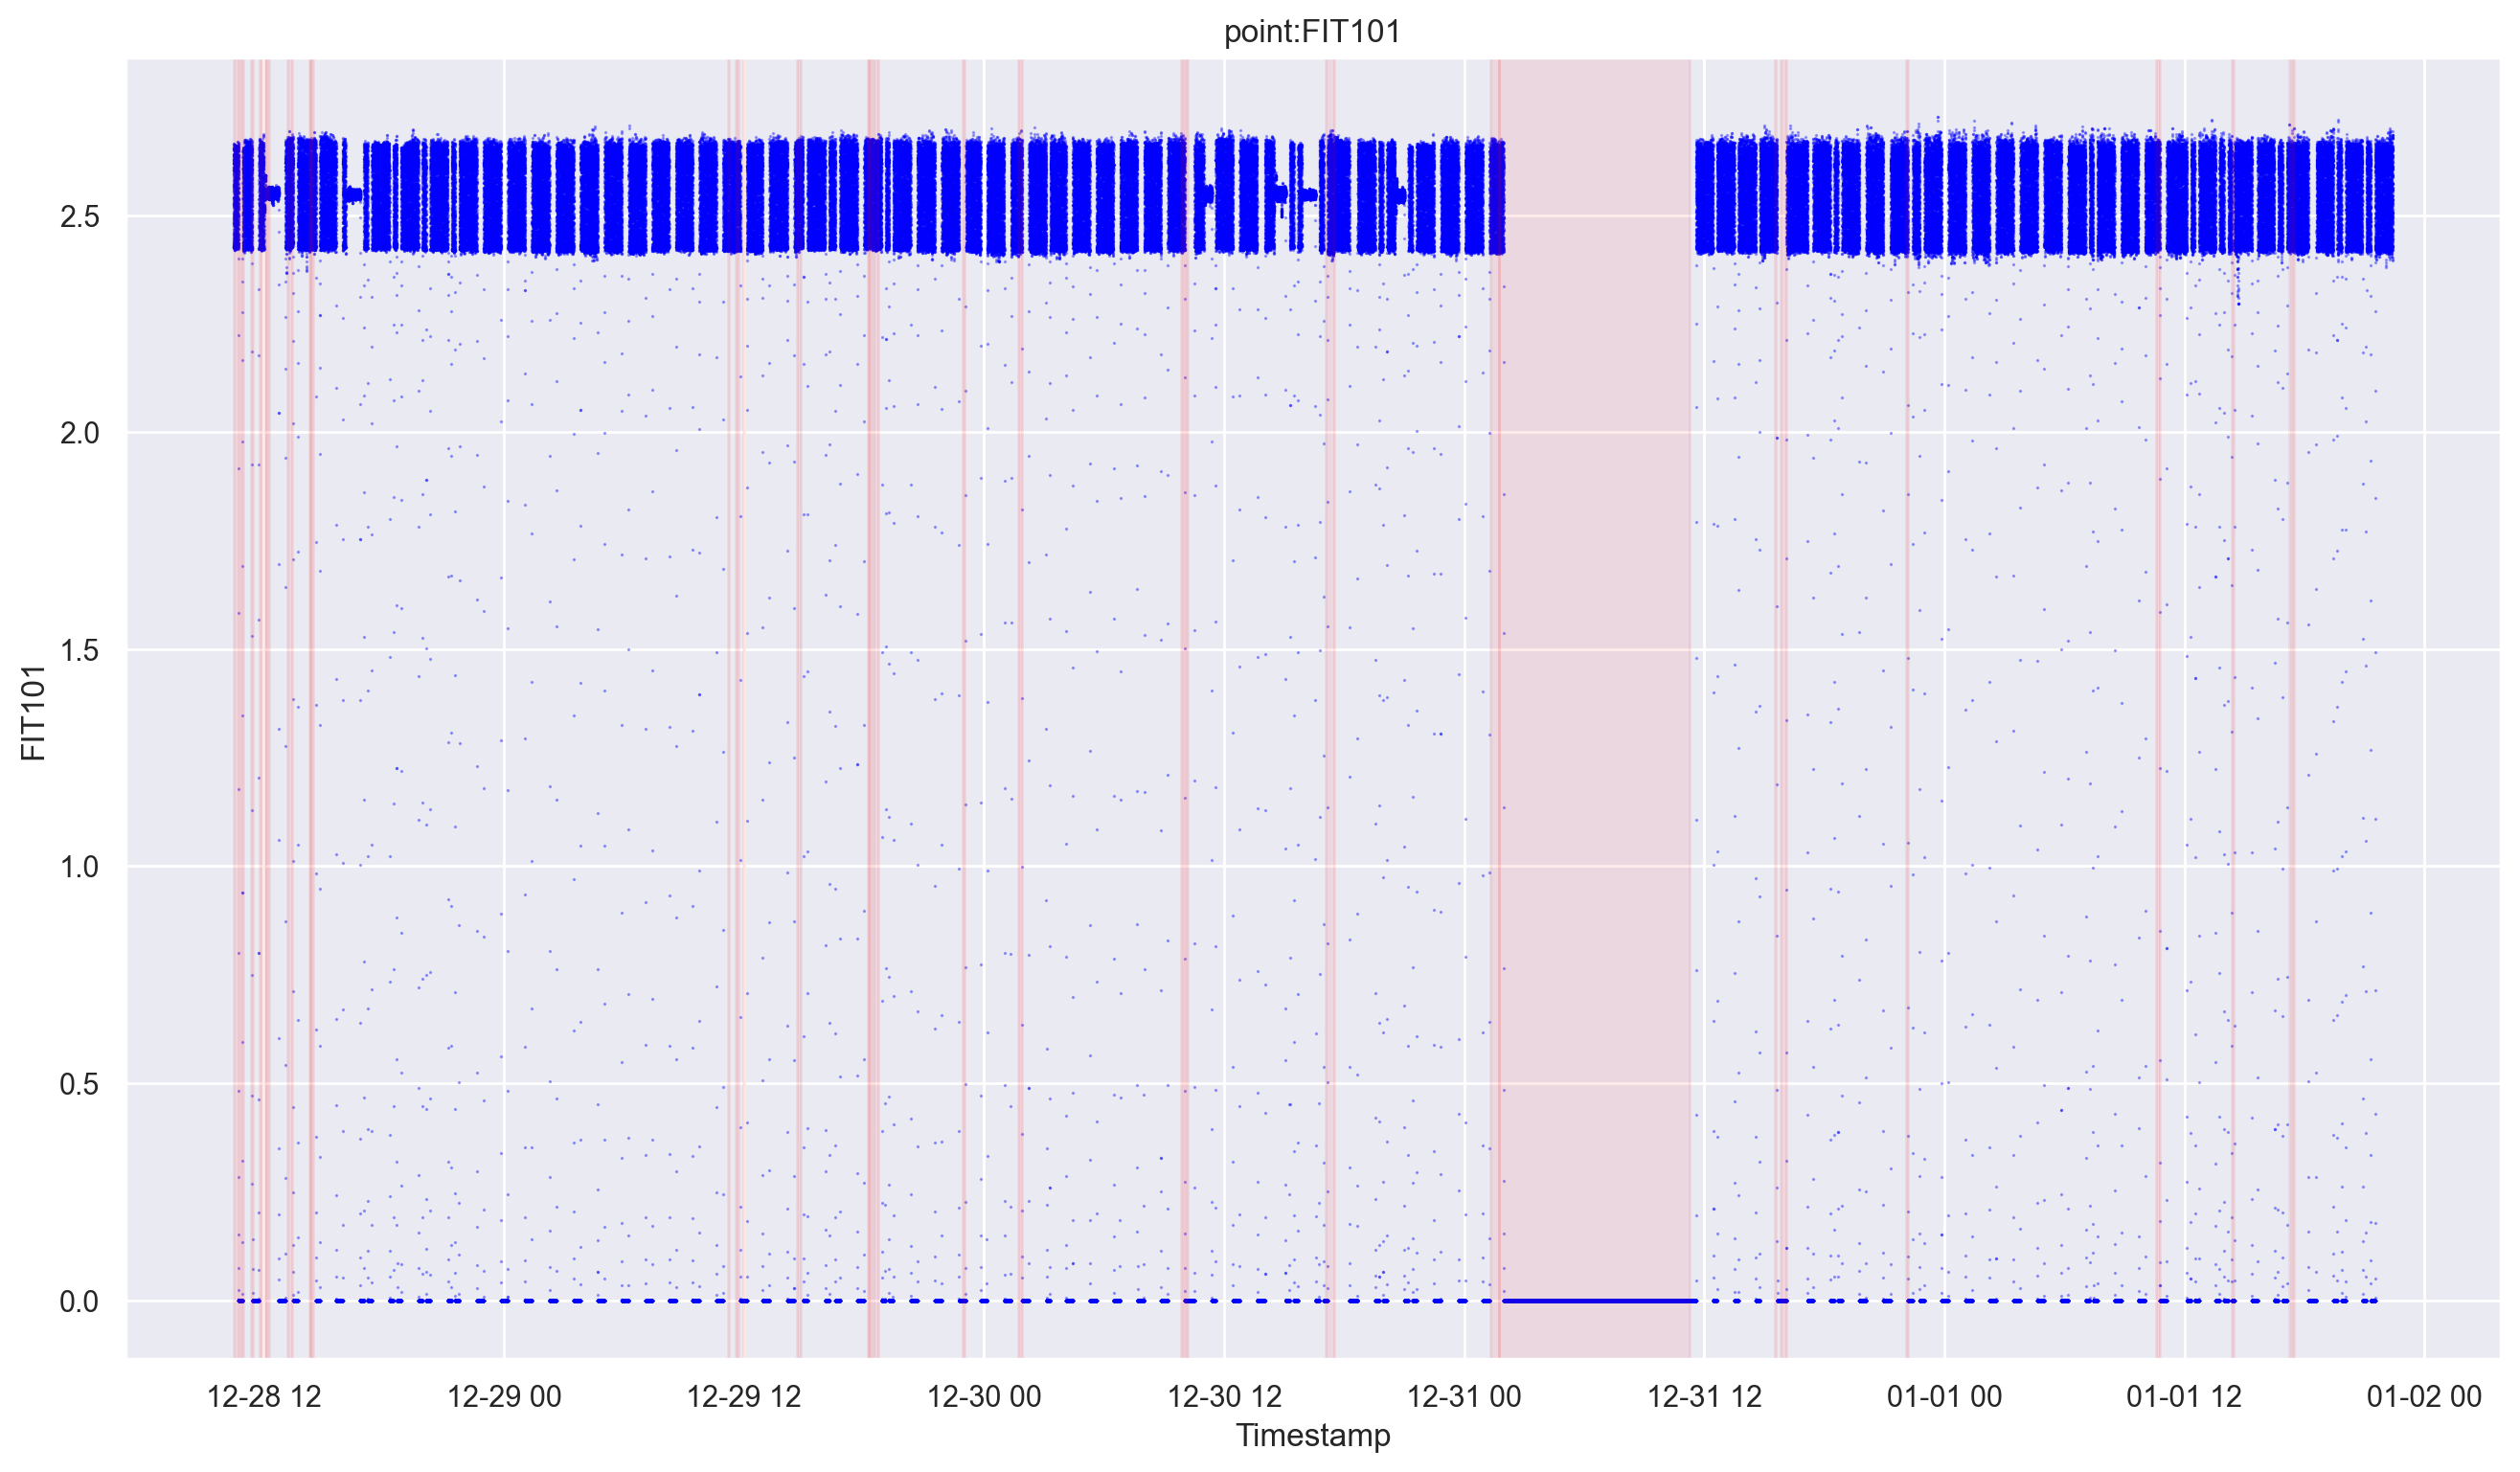

In [16]:

start_time = pd.to_datetime(attacks_list_df.iloc[0]['start_time'])
end_time = pd.to_datetime(attacks_list_df.iloc[len(attacks_list_df) - 6]['end_time'])

attack_point = 'FIT101'
fig, axes = plt.subplots(figsize=(16,9), dpi=200)

s = df['Timestamp'].between(start_time, end_time)
g = sns.scatterplot(data=df.loc[s], x='Timestamp', y=attack_point, color='blue', edgecolor=None, linewidth=.5, s=.5, alpha=.3)
g.set_title(f"point:{attack_point}")

for i in range(len(attacks_list_df) - 6):
   
    start = pd.to_datetime(attacks_list_df['start_time'][i])
    end = pd.to_datetime(attacks_list_df['end_time'][i])
    
    plt.axvspan(start, end, color='red', alpha=0.08)


plt.show()

## Boxplot analysis on normalized data

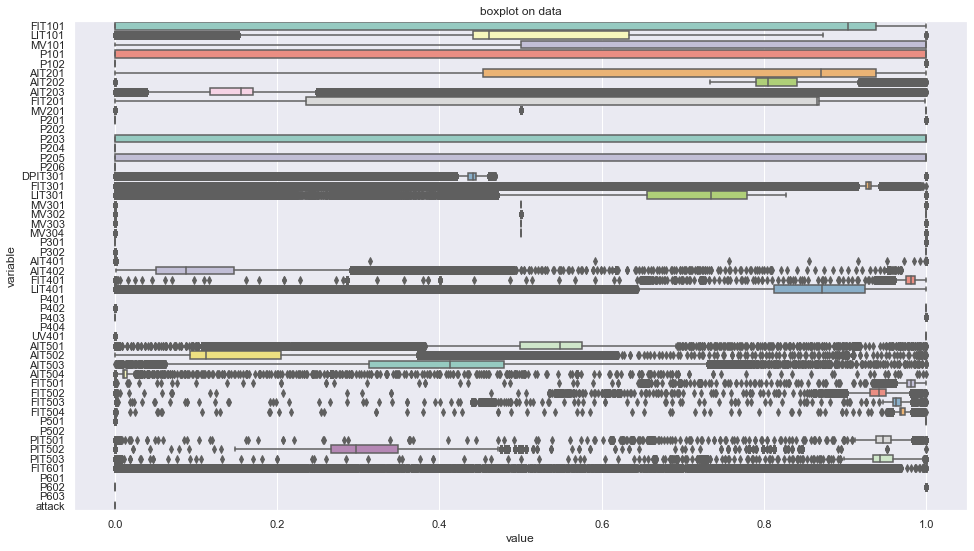

0.0    892834
Name: attack, dtype: int64

In [17]:
data = min_max_normalized_df[cols_numeric]
data_sns = data[data['attack'] == 0]
f, ax = plt.subplots(figsize = (16,9))
ax = sns.boxplot(x="value", y="variable", data=pd.melt(data_sns), palette="Set3")
ax.set_title(f'boxplot on data')
plt.show()
data_sns['attack'].value_counts()